In [3]:
source("Main.R")
source("Conf.R")
source("Utilities.R")
library("stringr")

corrplot 0.92 loaded


Attaching package: ‘pls’


The following object is masked from ‘package:corrplot’:

    corrplot


The following object is masked from ‘package:stats’:

    loadings



Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt




In [4]:

models=c(
         #"model_0", 
         #"model_000001", "model_00001", "model_0001", "model_001", "model_01", "model_1", 
         # "model_00_multilab", "model_000_multilab","model_0000_multilab", "model_00000_multilab", "model_000000_multilab", "model_0000000_multilab",
         #"model2_0", "model2_000001", "model2_00001", "model2_0001", "model2_001", "model2_01", "model2_1",
         # "model_alpha_0_6", "model_alpha_0_8", "model_alpha_0_85", "model_alpha_0_9", "model_alpha_0_95", "model_alpha_1",
         # "model_alpha_1_001", "model_alpha_1_005", "model_alpha_1_05", "model_alpha_1_1", "model_alpha_1_3", "model_alpha_1_5",
         # "model_alpha_1_7", "model_alpha_2", 
         # "model_alpha_0_6_32", "model_alpha_0_8_32", "model_alpha_0_85_32", "model_alpha_0_9_32", "model_alpha_0_95_32", "model_alpha_1_32",
         # "model_alpha_1_001_32", "model_alpha_1_005_32", "model_alpha_1_05_32", "model_alpha_1_1_32", "model_alpha_1_3_32", "model_alpha_1_5_32",
         # "model_alpha_1_7_32", "model_alpha_2_32",
         # "model_alpha_1_6_n_cond32", "model_alpha_1_65_cond32", "model_alpha_1_7_cond32", "model_alpha_1_75_cond32", "model_alpha_1_8_cond32", "model_alpha_1_85_cond32", "model_alpha_1_9_cond32",
         # "model_alpha_1_6_n_cond16", "model_alpha_1_65_cond16", "model_alpha_1_7_cond16", "model_alpha_1_75_cond16", "model_alpha_1_8_cond16", "model_alpha_1_85_cond16", "model_alpha_1_9_cond16",
         # "model_alpha_1_8_cond32_mlabTheta_05", "model_alpha_1_8_cond32_mlabTheta_1", "model_alpha_1_8_cond32_mlabTheta_2",
         # "model_alpha_1_8_cond32_mlabTheta_3","model_alpha_1_8_cond32_mlabTheta_4","model_alpha_1_8_cond32_mlabTheta_5",
         # "model_alpha_1_8_cond32_mlabTheta_6","model_alpha_1_8_cond32_mlabTheta_7","model_alpha_1_8_cond32_mlabTheta_8",
         #  "model_alpha_1_8_cond32_mlabTheta_9","model_alpha_1_8_cond32_mlabTheta_10","model_alpha_1_8_cond32_mlabTheta_11",
         #  "model_alpha_1_8_cond32_mlabTheta_12","model_alpha_1_8_cond32_mlabTheta_13","model_alpha_1_8_cond32_mlabTheta_14",
         #  "model_alpha_1_8_cond32_mlabTheta_15","model_alpha_1_8_cond32_mlabTheta_16",
         # "model_alpha_1_8_cond32_mlabTheta_05_2",  "model_alpha_1_8_cond32_mlabTheta_1_2", "model_alpha_1_8_cond32_mlabTheta_2_2",
         # "model_alpha_1_8_cond32_mlabTheta_3_2","model_alpha_1_8_cond32_mlabTheta_4_2","model_alpha_1_8_cond32_mlabTheta_5_2",
         # "model_alpha_1_8_cond32_mlabTheta_6_2","model_alpha_1_8_cond32_mlabTheta_7_2","model_alpha_1_8_cond32_mlabTheta_8_2",
         #  "model_alpha_1_8_cond32_mlabTheta_9_2","model_alpha_1_8_cond32_mlabTheta_10_2","model_alpha_1_8_cond32_mlabTheta_11_2",
         #  "model_alpha_1_8_cond32_mlabTheta_12_2","model_alpha_1_8_cond32_mlabTheta_13_2","model_alpha_1_8_cond32_mlabTheta_14_2",
         #  "model_alpha_1_8_cond32_mlabTheta_15_2","model_alpha_1_8_cond32_mlabTheta_16_2", "model_DenoisingAE_multiLab_cond32"
         "model_alpha_0_second", "model_alpha_0_1_second","model_alpha_0_2_second","model_alpha_0_3_second","model_alpha_0_4_second",
         "model_alpha_0_5_second","model_alpha_0_6_second","model_alpha_0_7_second", "model_alpha_0_8_second", 
         "model_alpha_0_9_second","model_alpha_1_second", "model_alpha_1_1_second", "model_alpha_1_2_second", "model_alpha_1_3_second",
         "model_alpha_1_4_second", "model_alpha_1_5_second", "model_alpha_1_6_second", "model_alpha_1_7_second",
         "model_alpha_1_8_second", "model_alpha_1_85_second", "model_alpha_1_9_second", "model_alpha_2_0_second",
         "model_alpha_2_1_second", "model_alpha_2_2_second", "model_alpha_2_3_second", "model_alpha_2_4_second",
         "model_alpha_2_5_second",  "model_alpha_2_6_second", "model_alpha_2_7_second", "model_alpha_2_8_second", 
         "model_alpha_2_9_second", "model_alpha_3_0_second", "model_alpha_3_1_second", "model_alpha_3_2_second",
         "model_alpha_3_3_second", "model_alpha_3_4_second", "model_alpha_3_5_second", "model_alpha_3_6_second",
         "model_alpha_3_7_second", "model_alpha_3_8_second", "model_alpha_3_9_second", "model_alpha_4_0_second",
         "model_alpha_4_1_second", "model_alpha_4_2_second", "model_alpha_4_3_second", "model_alpha_4_4_second",
         "model_alpha_4_5_second", "model_alpha_4_6_second", "model_alpha_4_7_second", "model_alpha_4_8_second", "model_alpha_4_9_second",
         "model_alpha_5_0_second", "model_alpha_5_1_second", "model_alpha_5_2_second", "model_alpha_5_3_second", "model_alpha_5_4_second",
         "model_alpha_5_5_second", "model_alpha_5_6_second", "model_alpha_5_7_second", "model_alpha_5_8_second", "model_alpha_5_9_second",
         "model_alpha_6_0_second","model_alpha_0_2_K2K3","model_alpha_0_5_K2K3","model_alpha_0_7_K2K3",
         "model_alpha_1_0_K2K3", "model_alpha_2_5_K2K3", "model_alpha_3_0_K2K3", "model_alpha_3_5_K2K3",
         "model_alpha_4_0_K2K3", "model_alpha_4_5_K2K3", "model_alpha_5_0_K2K3","model_alpha_5_5_K2K3",
         "model_alpha_6_0_K2K3"
        )


In [5]:
effectsSingles <- readRDS(paste0(projectDir, "/RDSFiles/ComboEffects_lm_residuals.rds"))
effectsSingles <- effectsSingles[effectsSingles$term %ni% c("(Intercept)", "n_genes", "mt_frac", paste0("leiden", 1:9)),]
effectsSingles[,c("std.error", "statistic", "p.value")] = NULL
colnames(effectsSingles) = c("Group","ObservedEstimate","respGene")


Using X as id variables

Using X as id variables

Using X as id variables



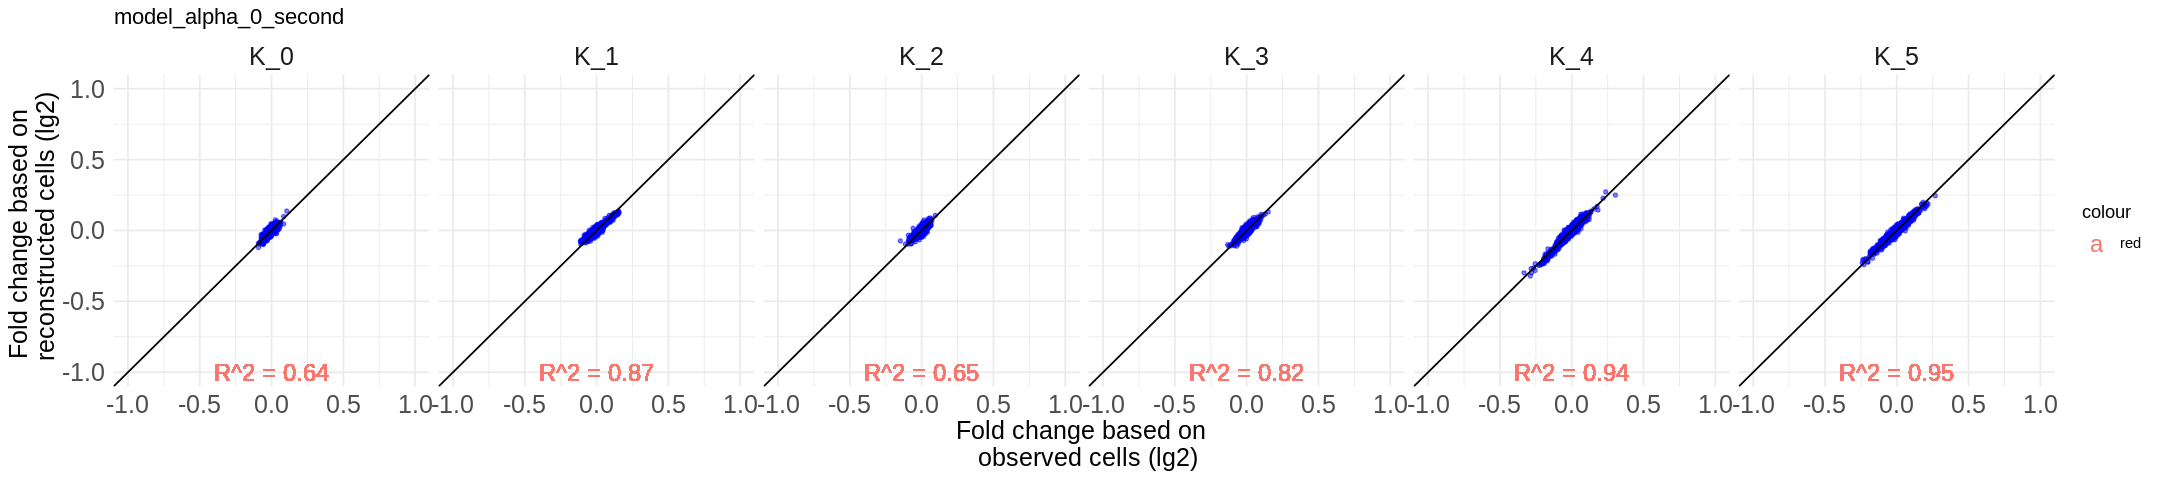

Using X as id variables



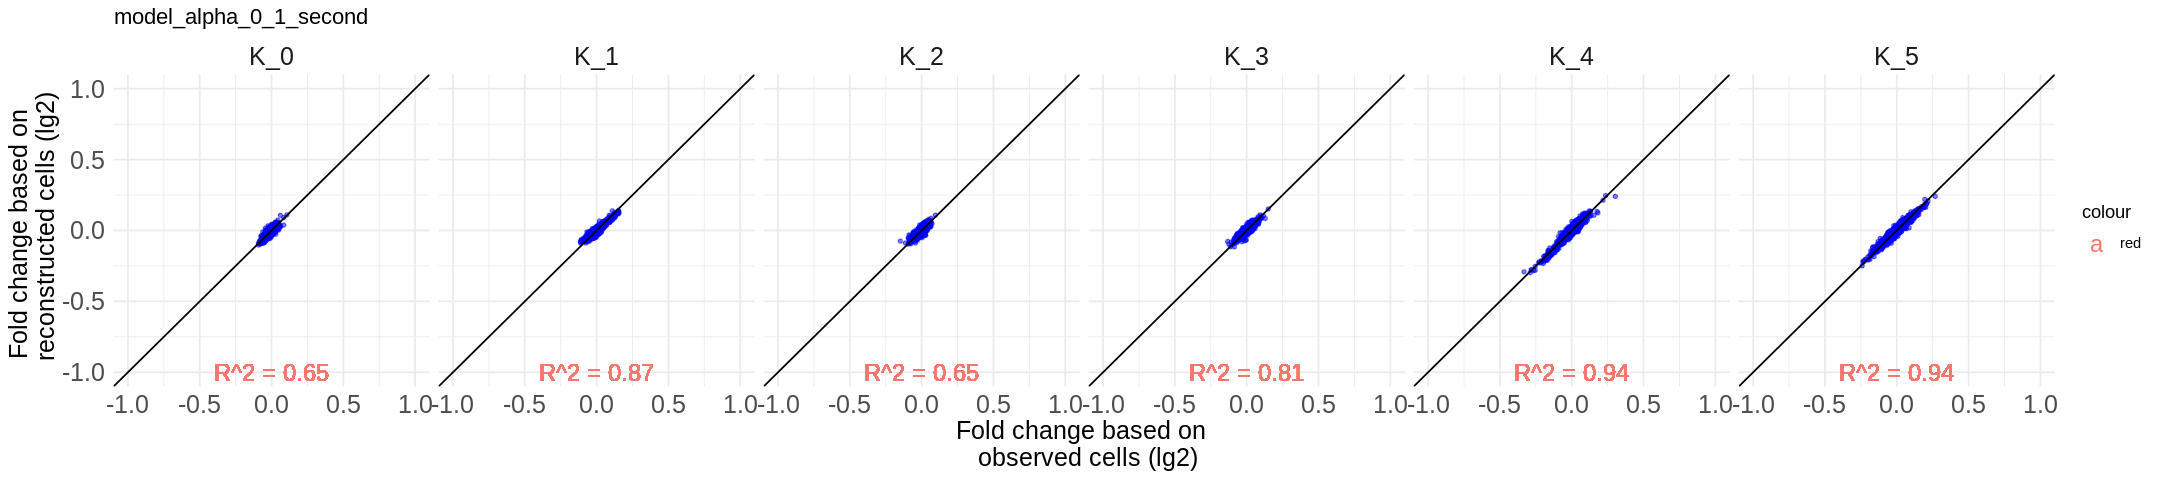

Using X as id variables



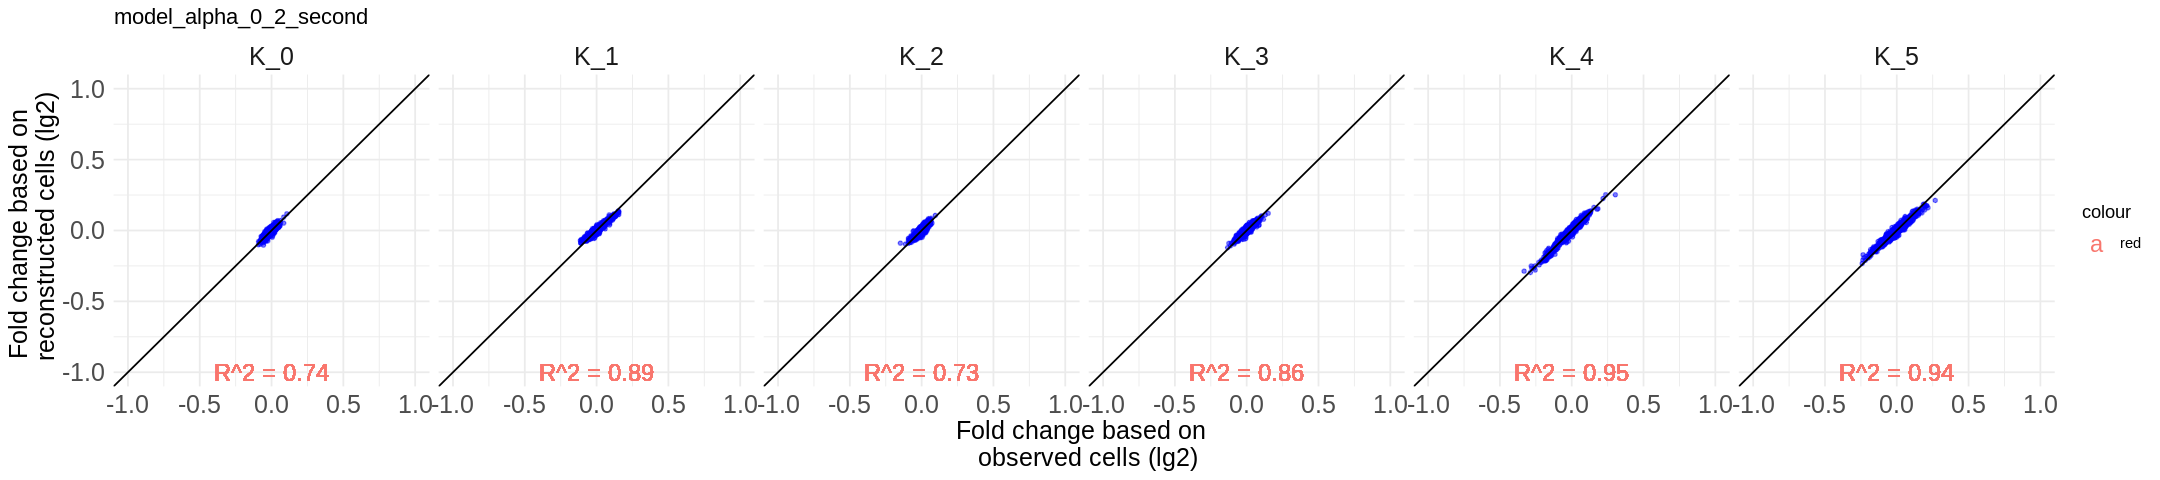

Using X as id variables



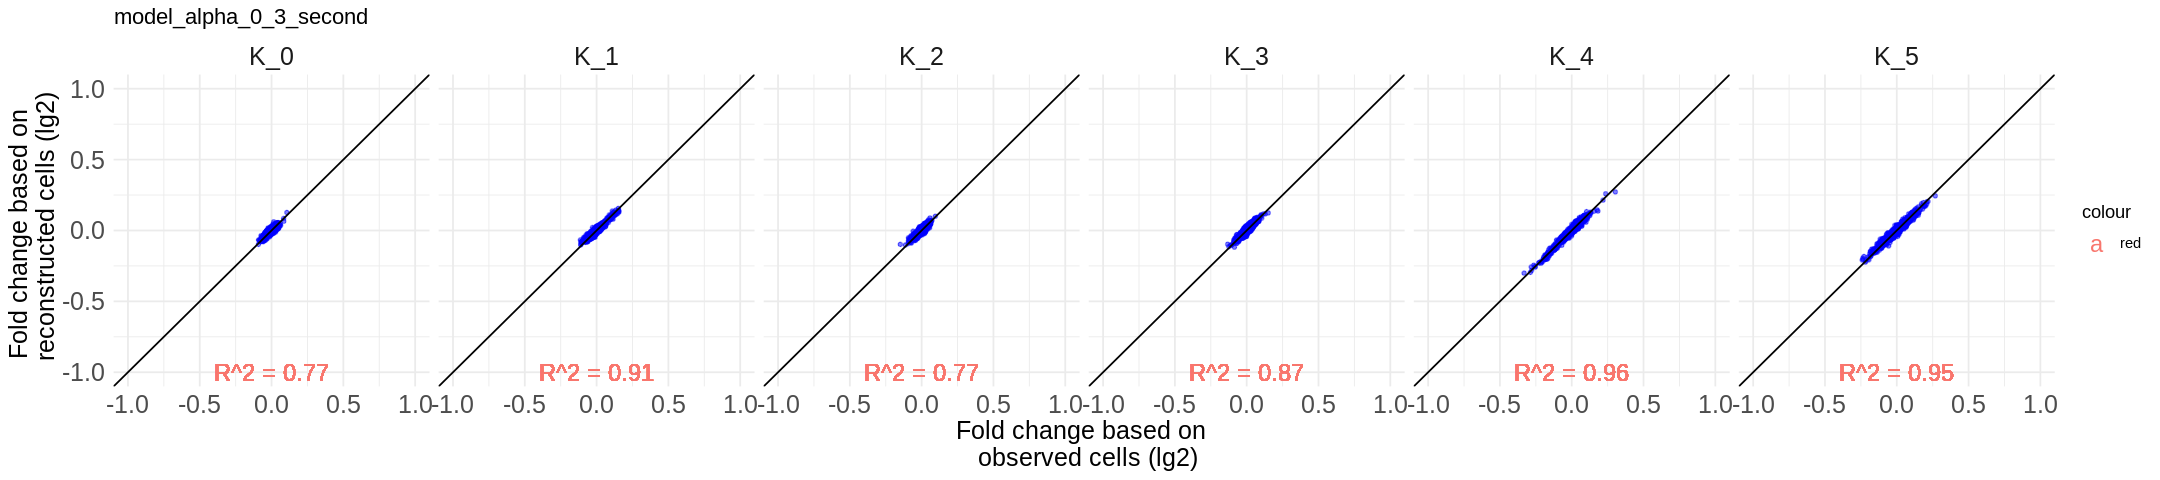

Using X as id variables



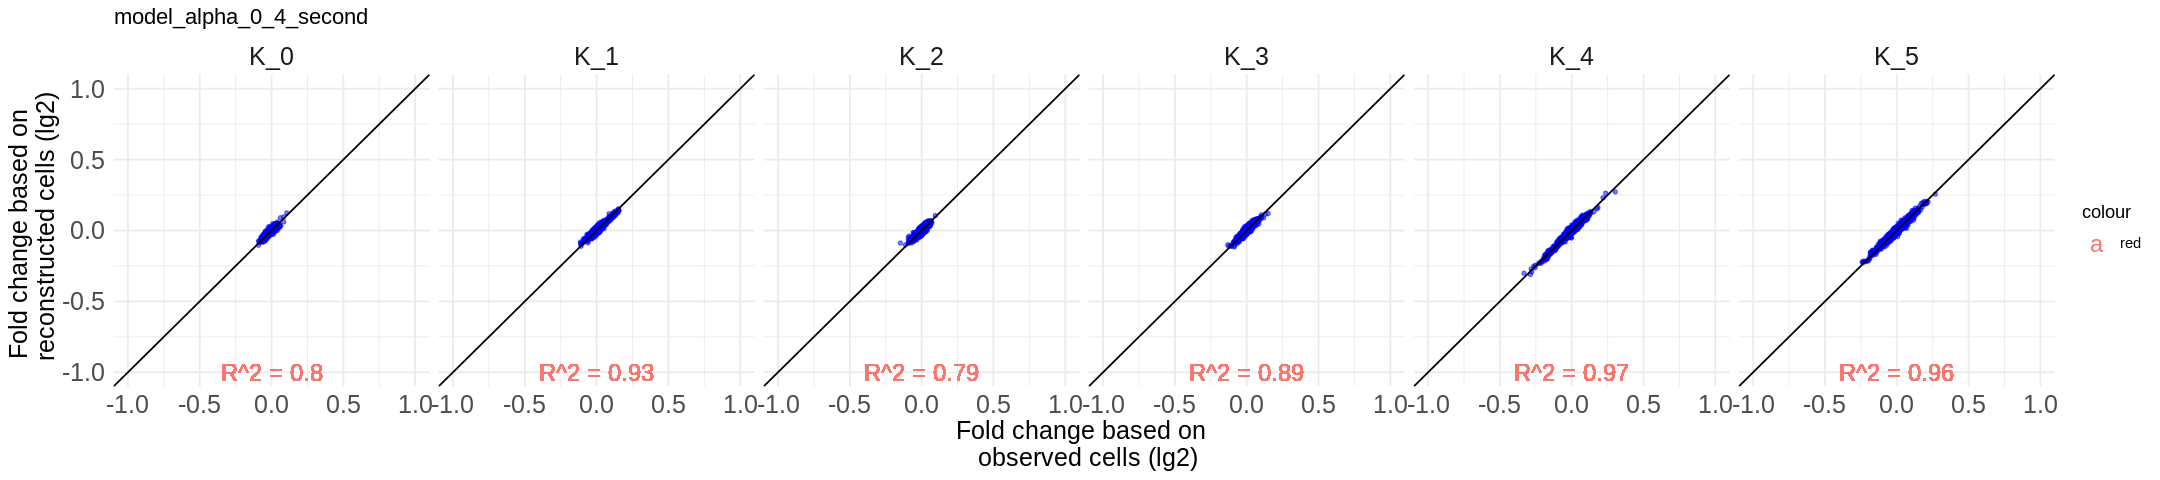

Using X as id variables



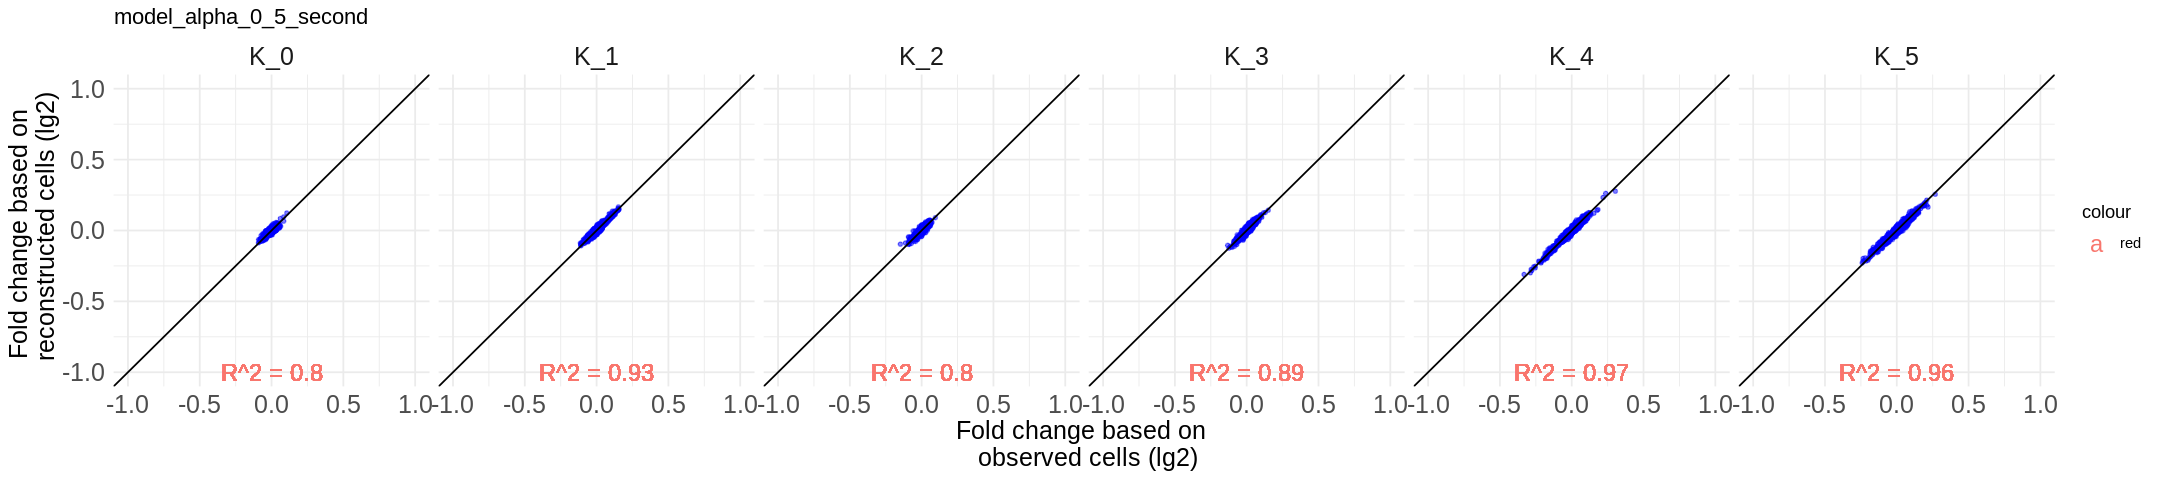

Using X as id variables



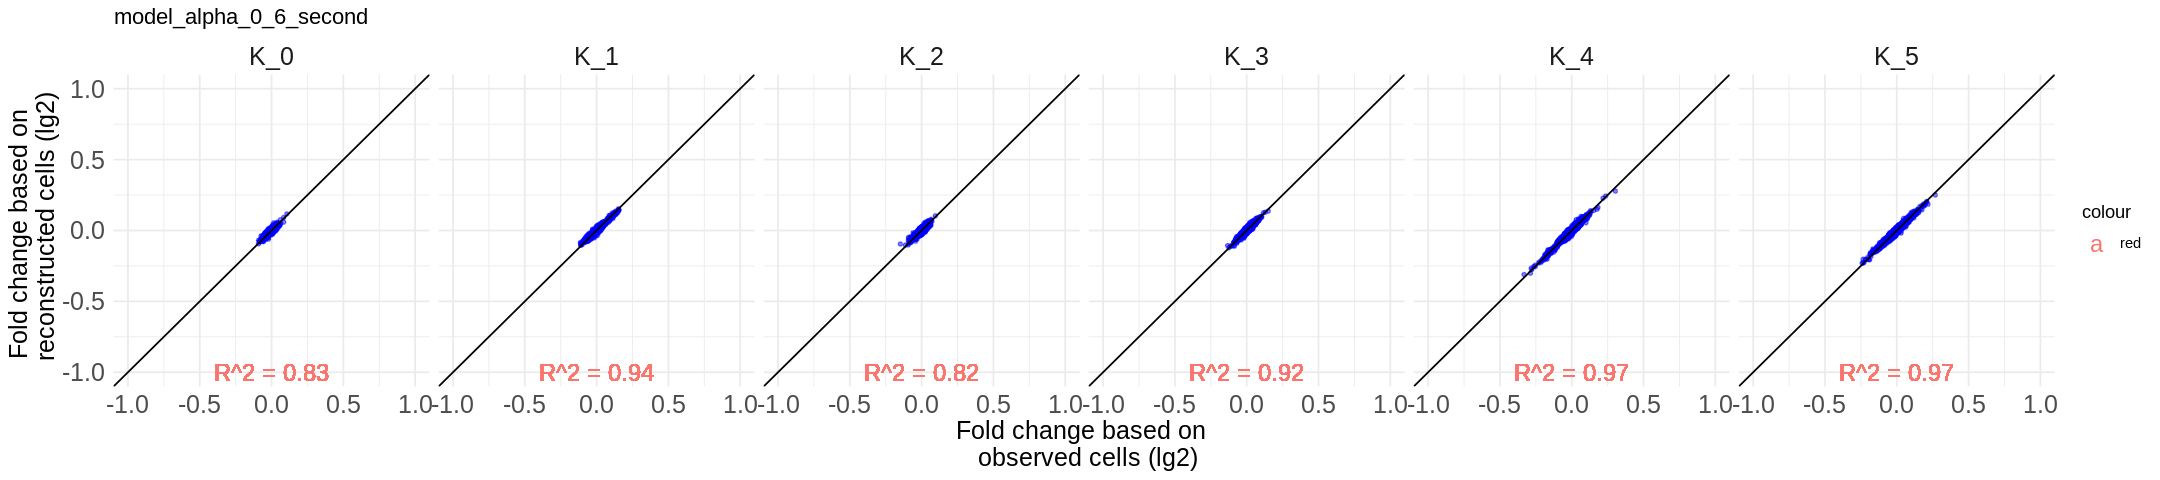

Using X as id variables



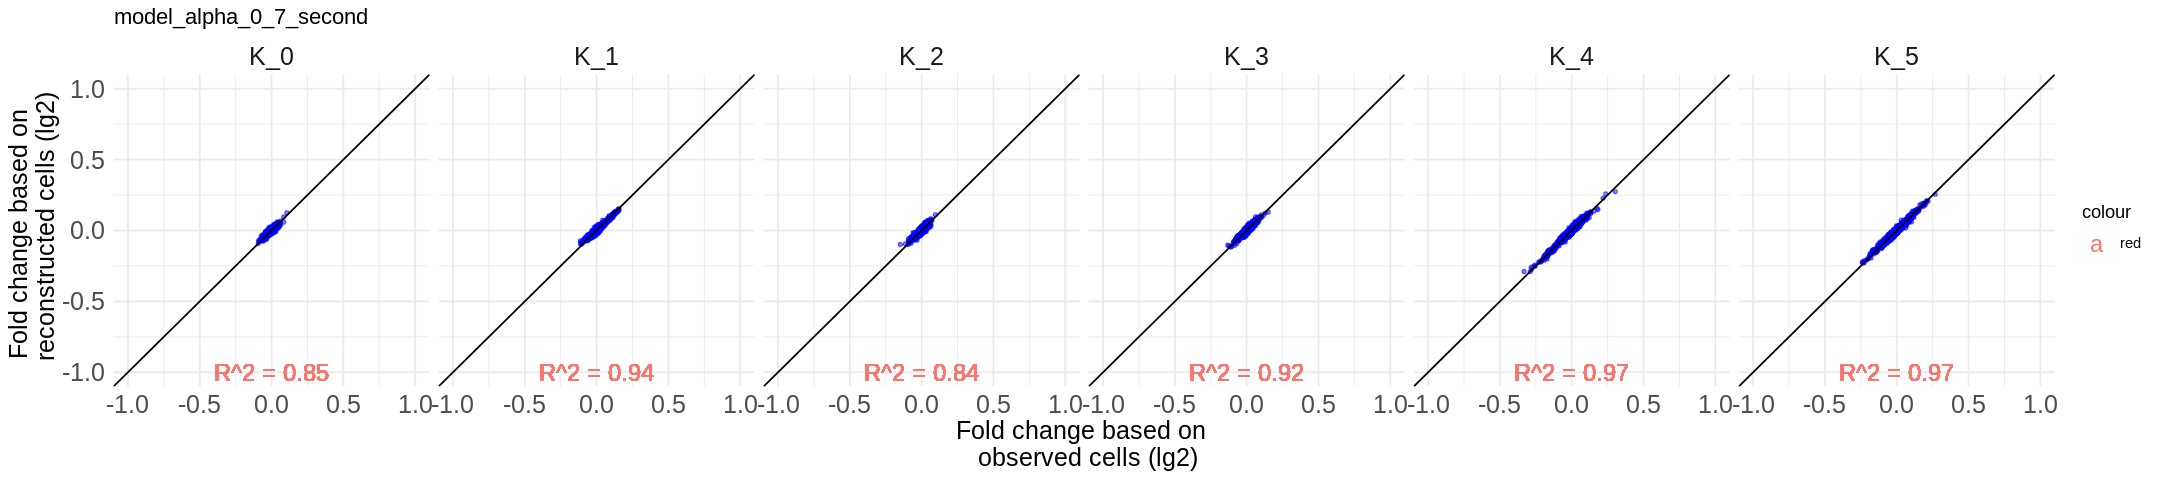

Using X as id variables



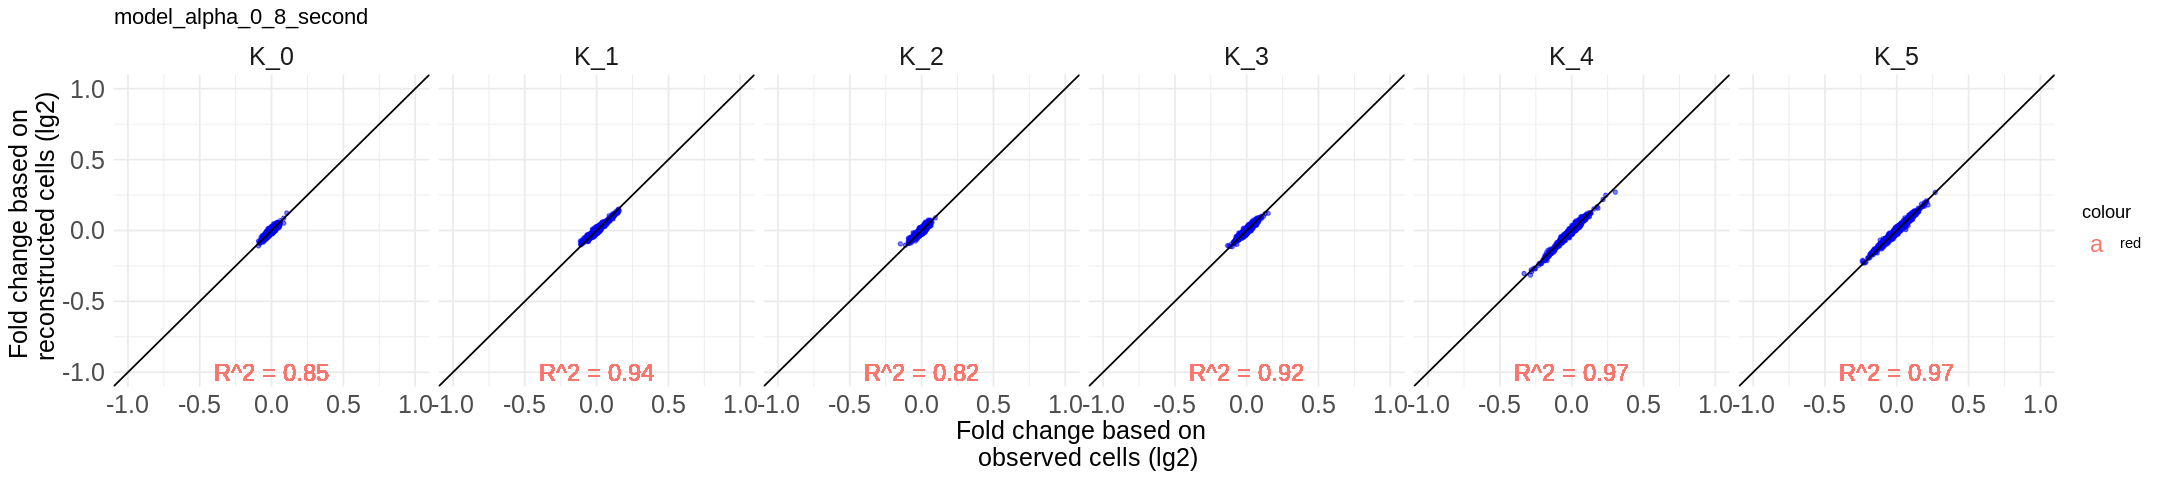

Using X as id variables



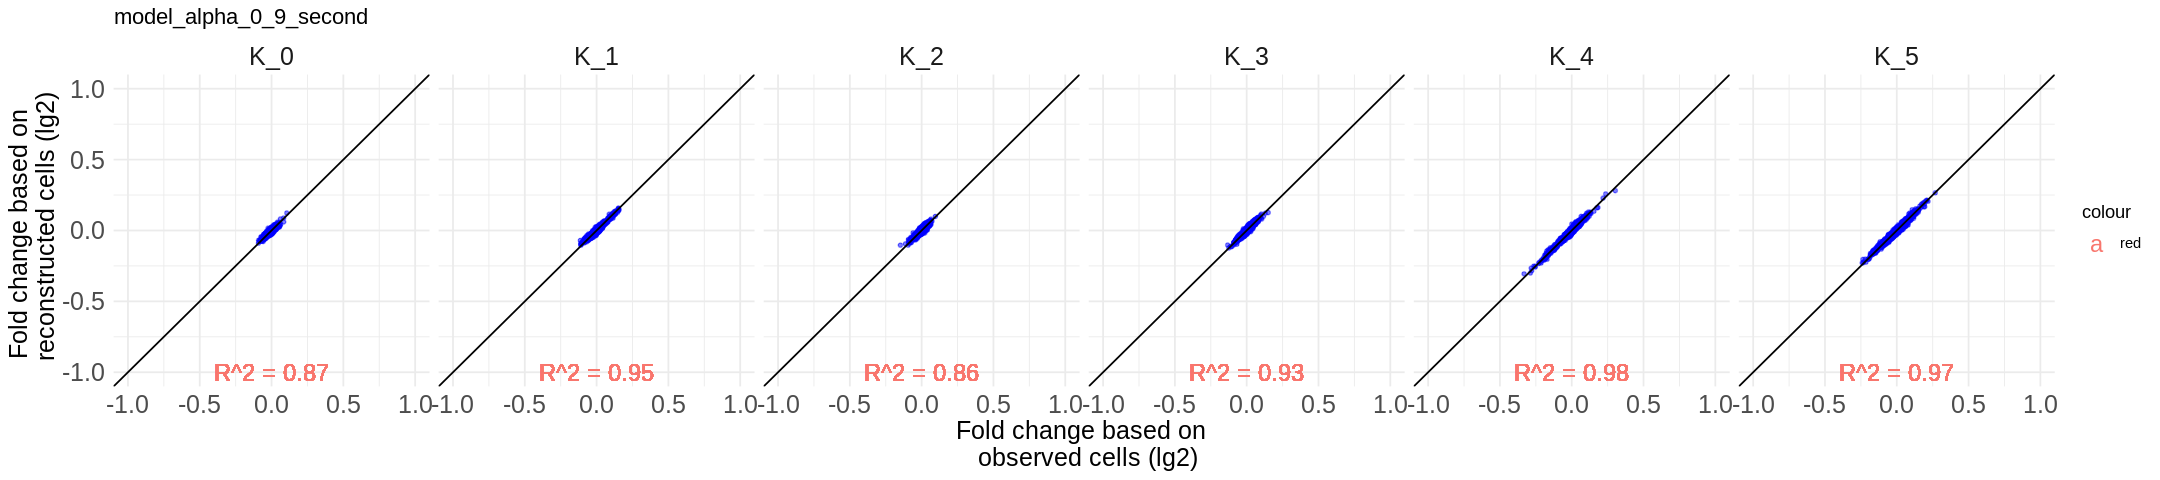

Using X as id variables



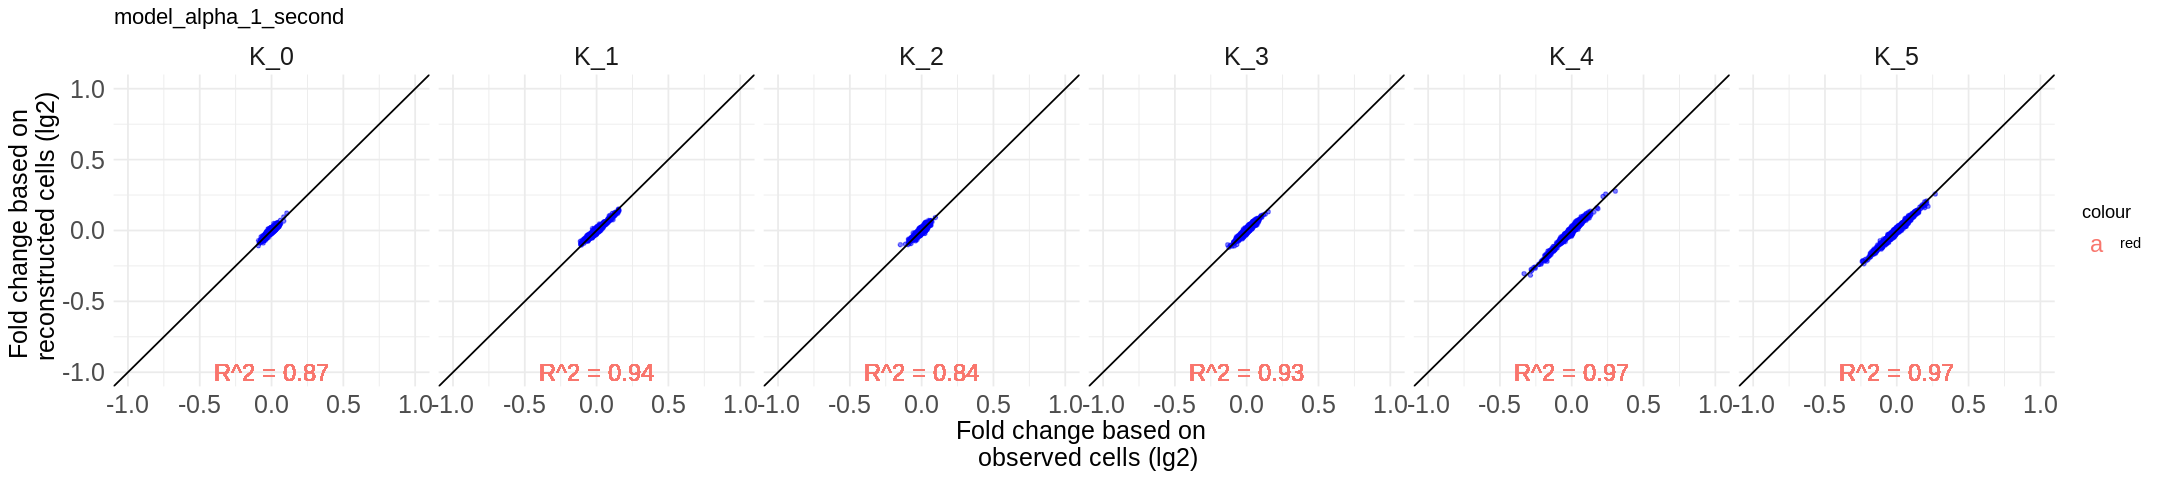

Using X as id variables



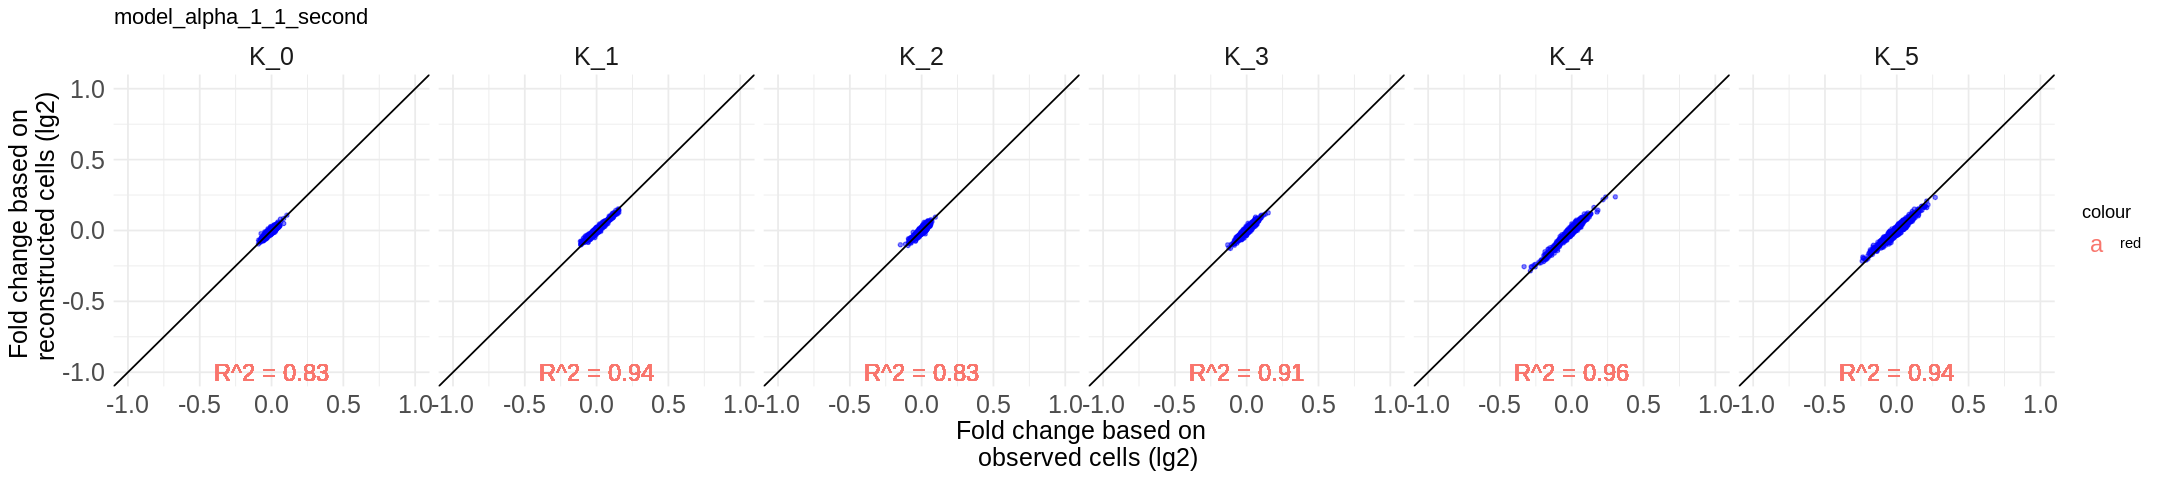

Using X as id variables



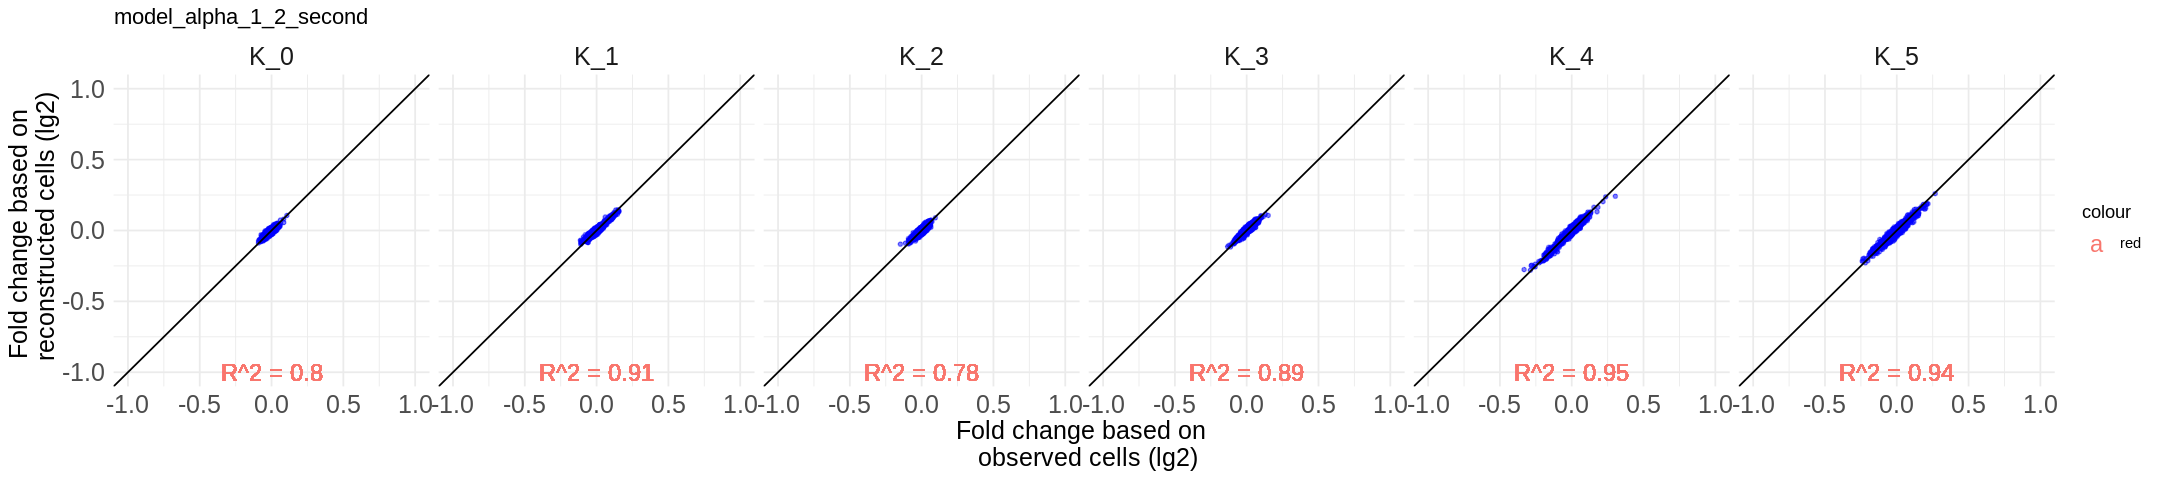

Using X as id variables



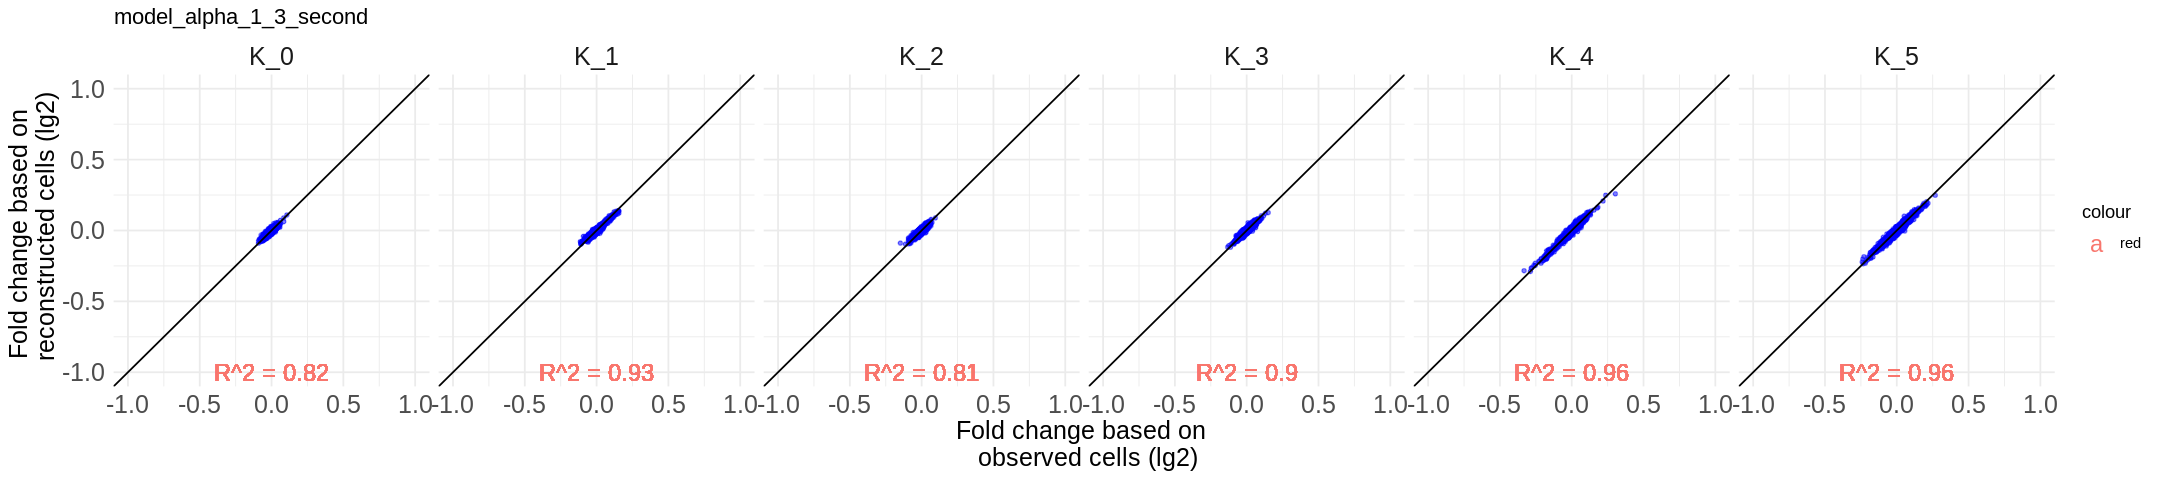

Using X as id variables



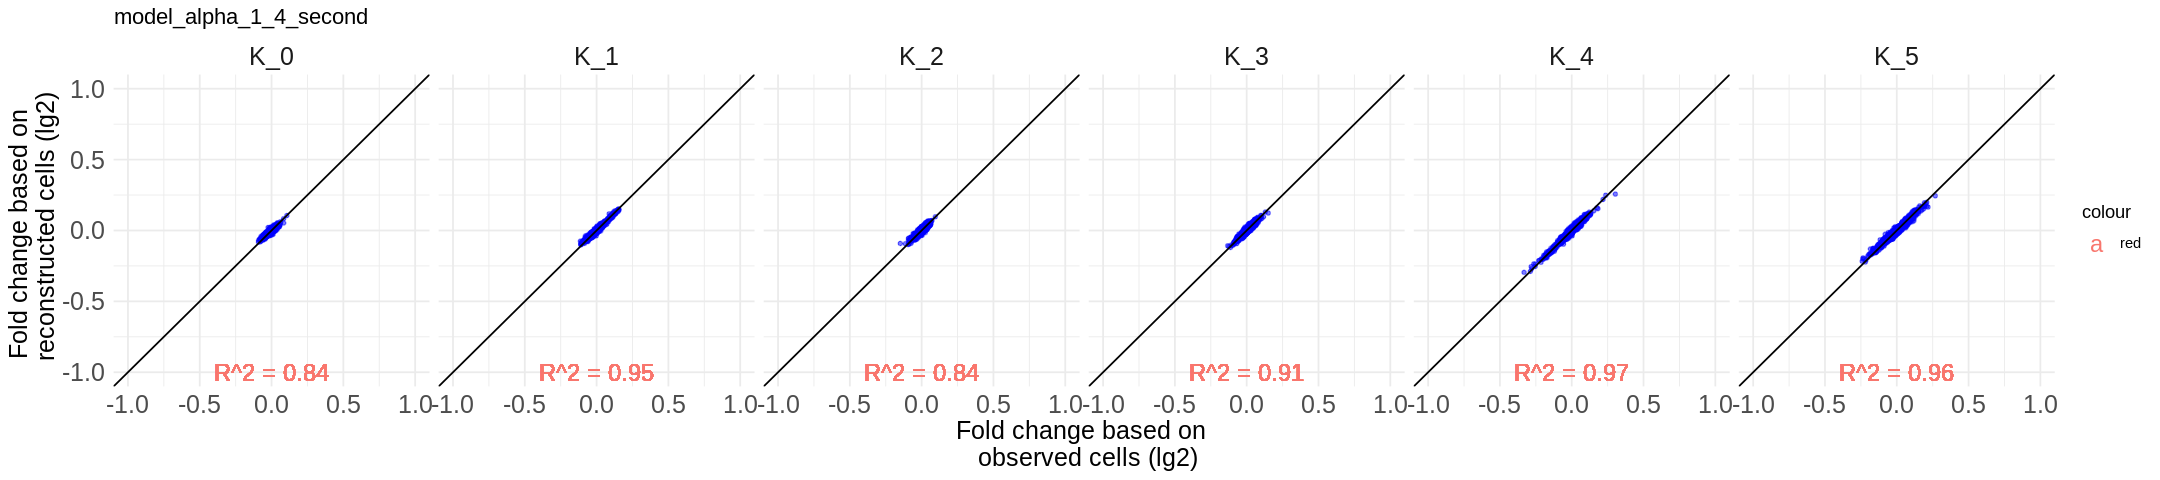

Using X as id variables



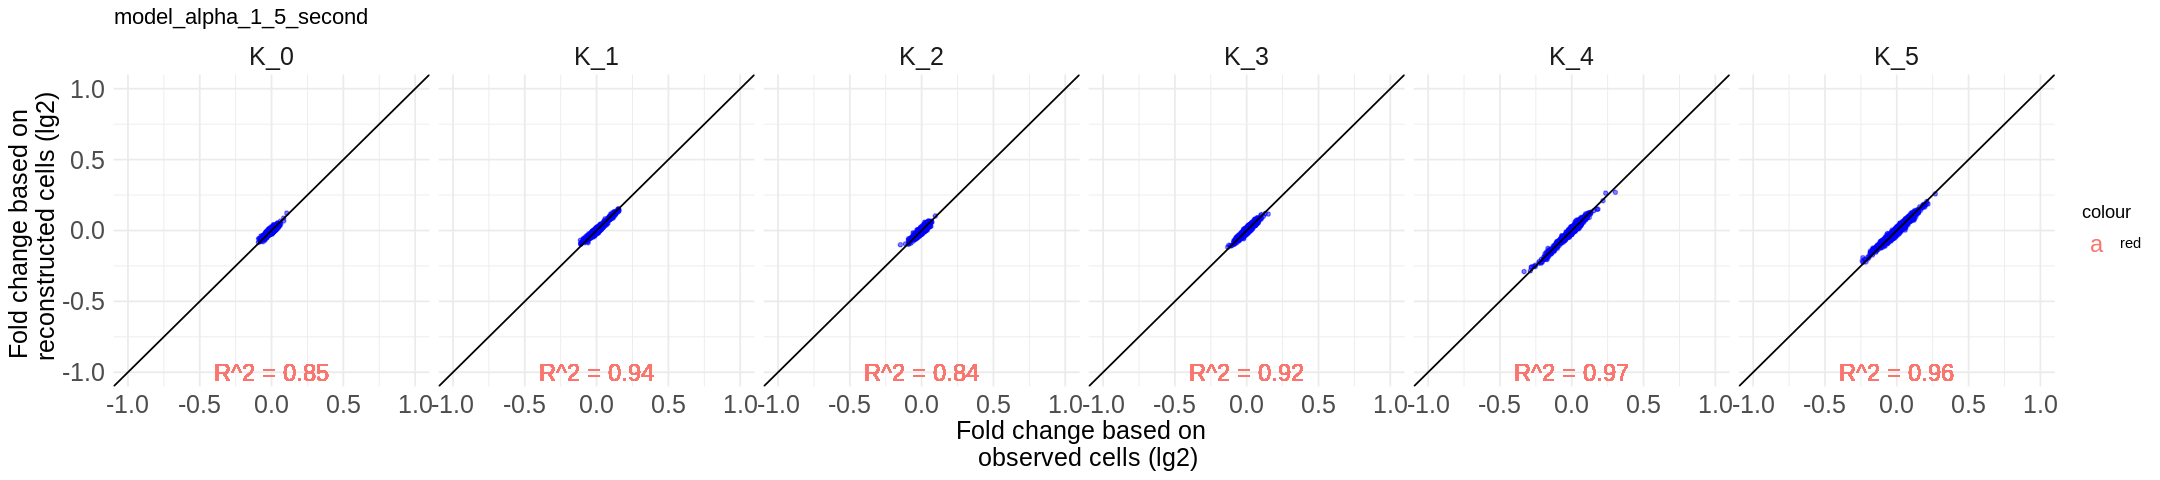

Using X as id variables



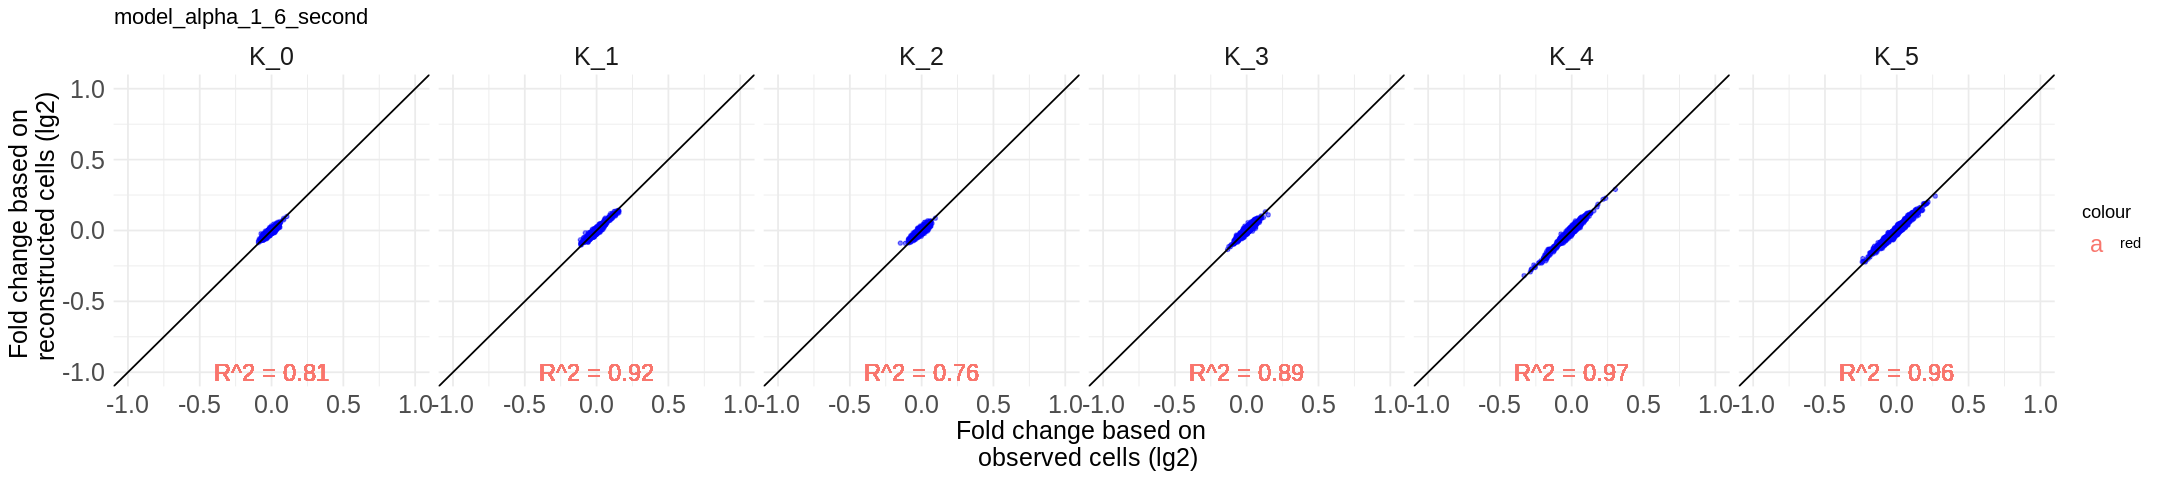

Using X as id variables



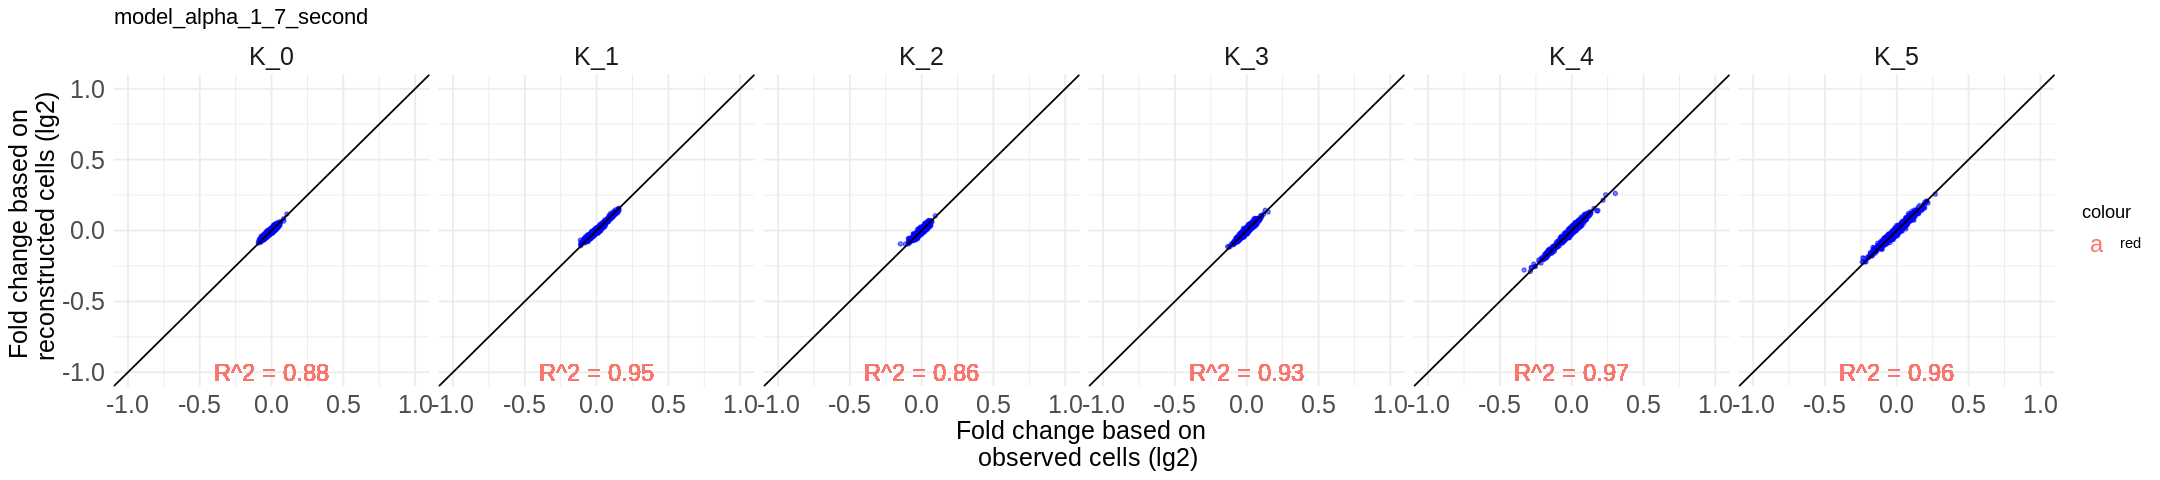

Using X as id variables



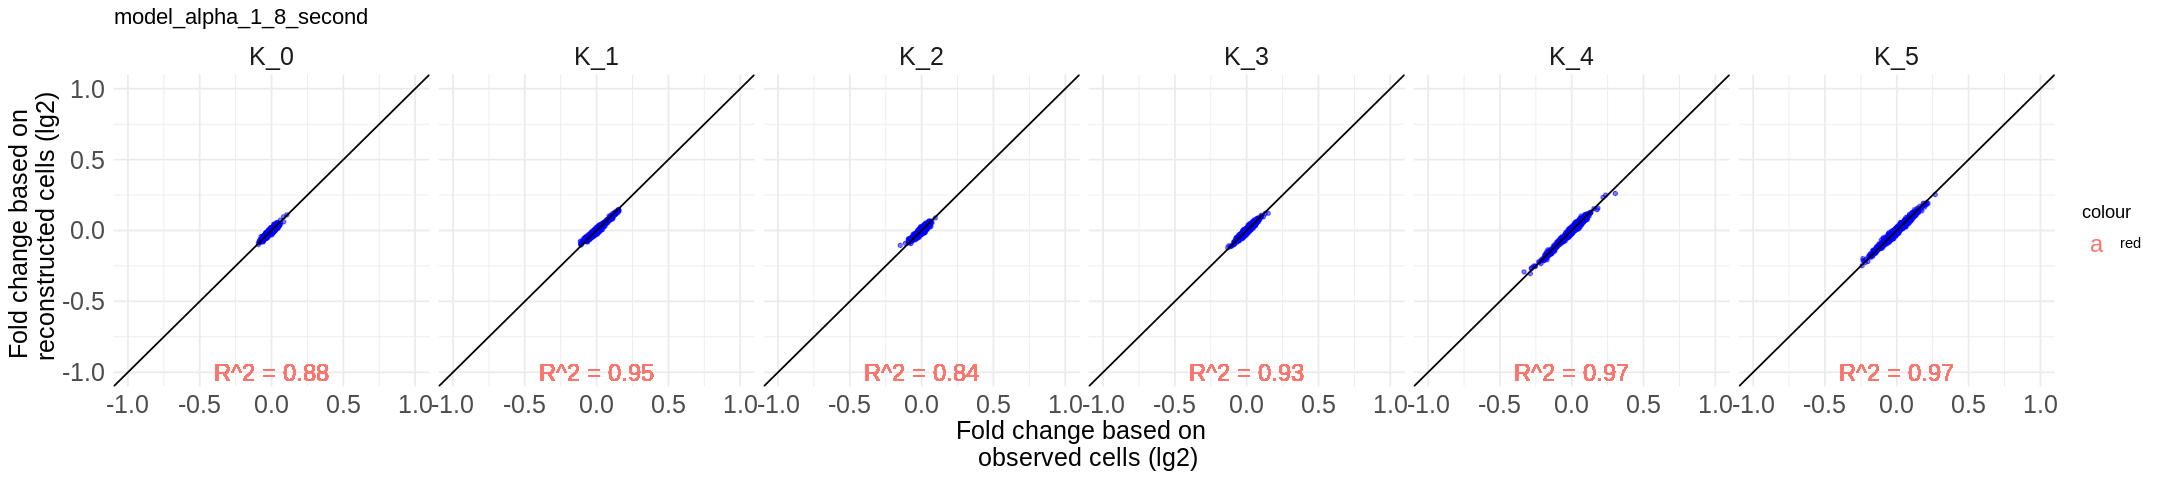

Using X as id variables



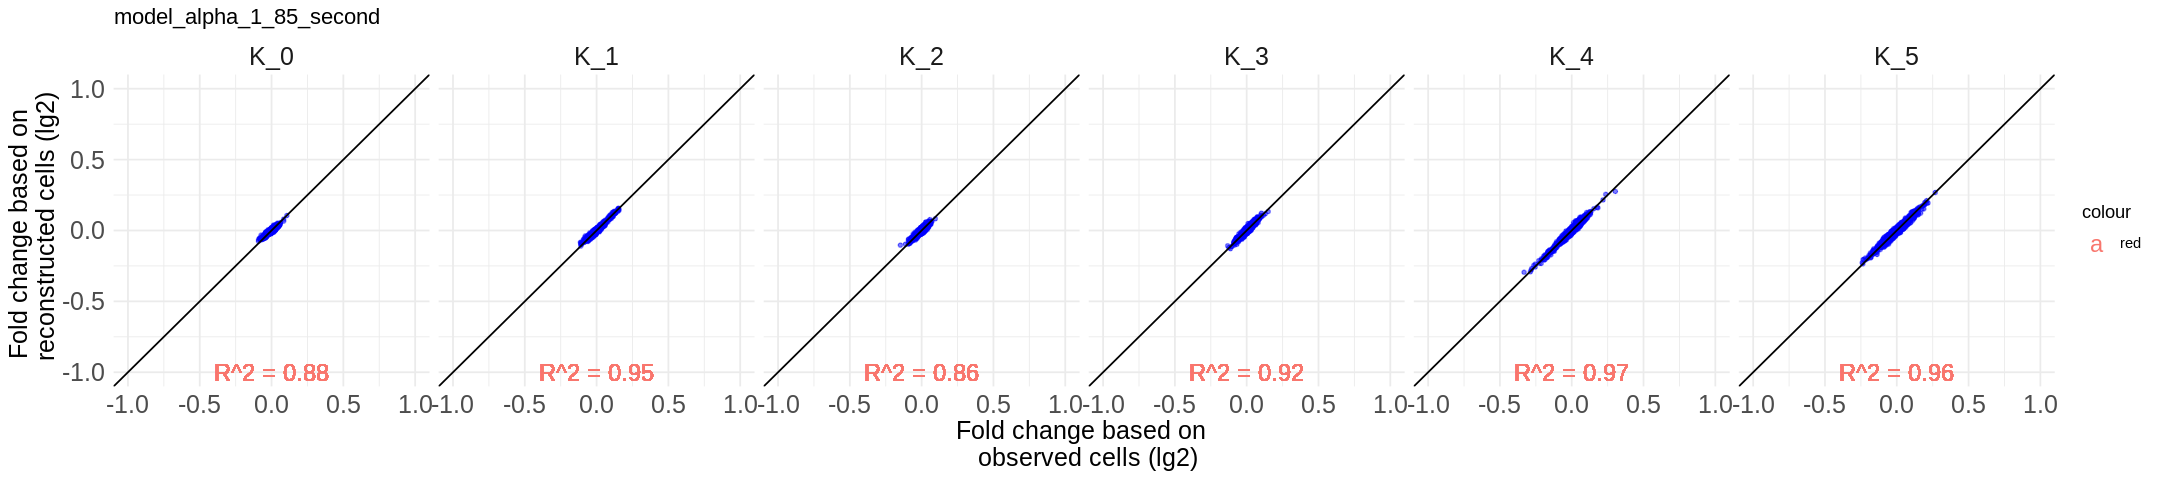

Using X as id variables



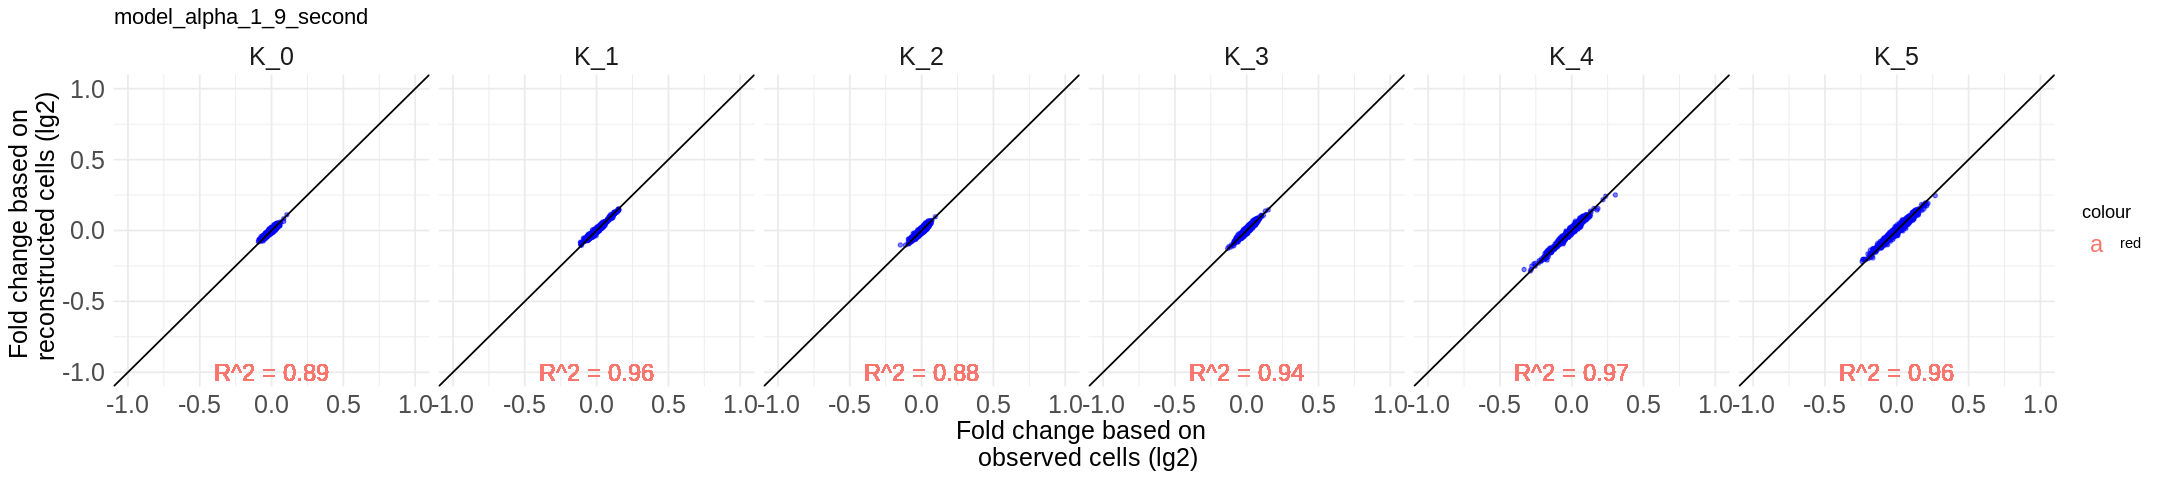

Using X as id variables



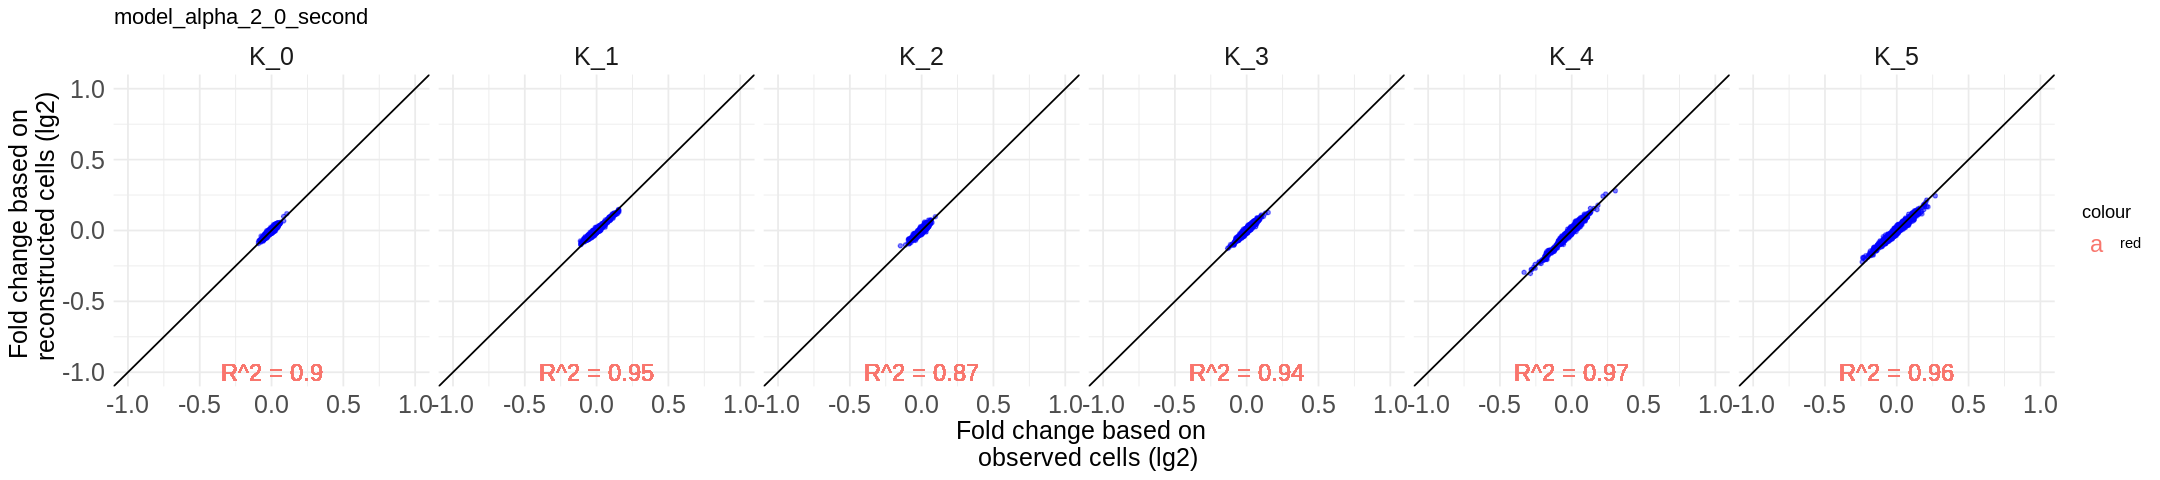

Using X as id variables



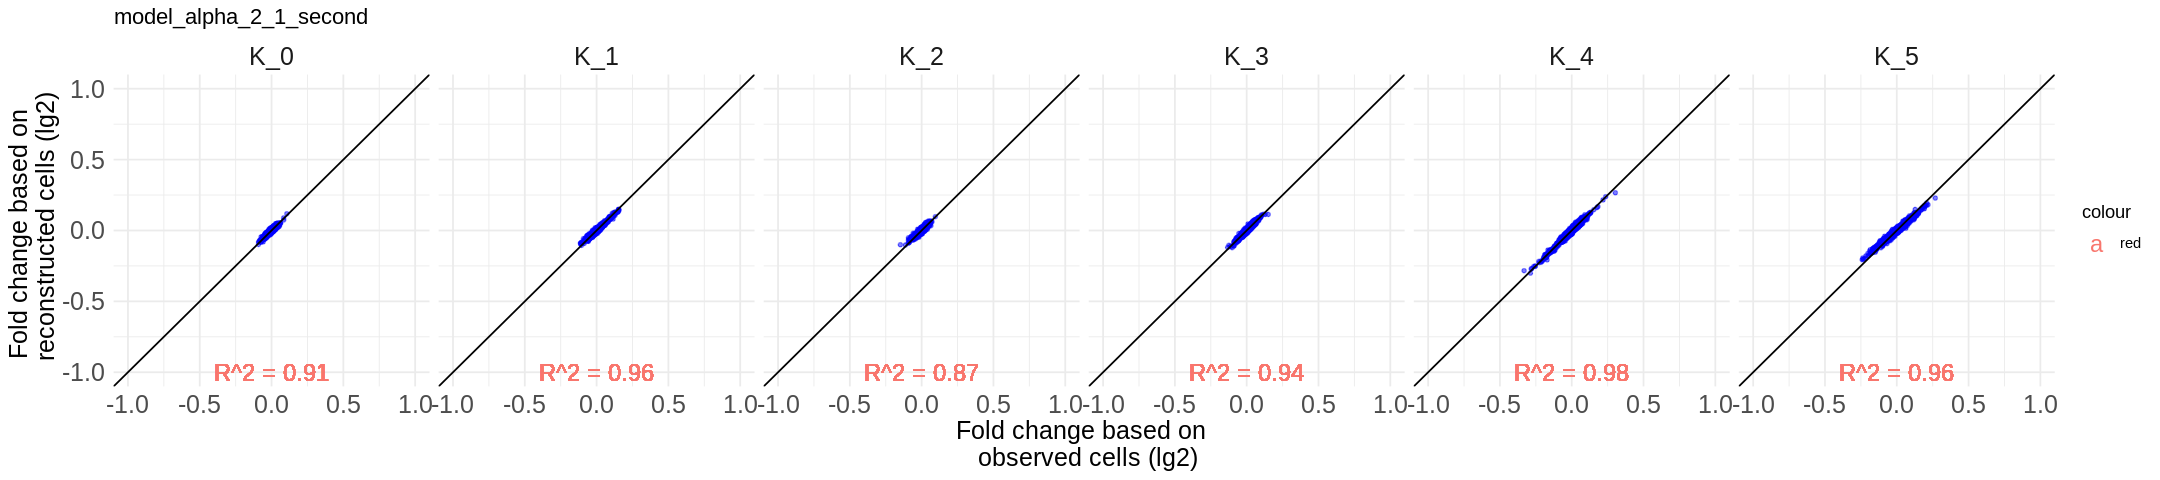

Using X as id variables



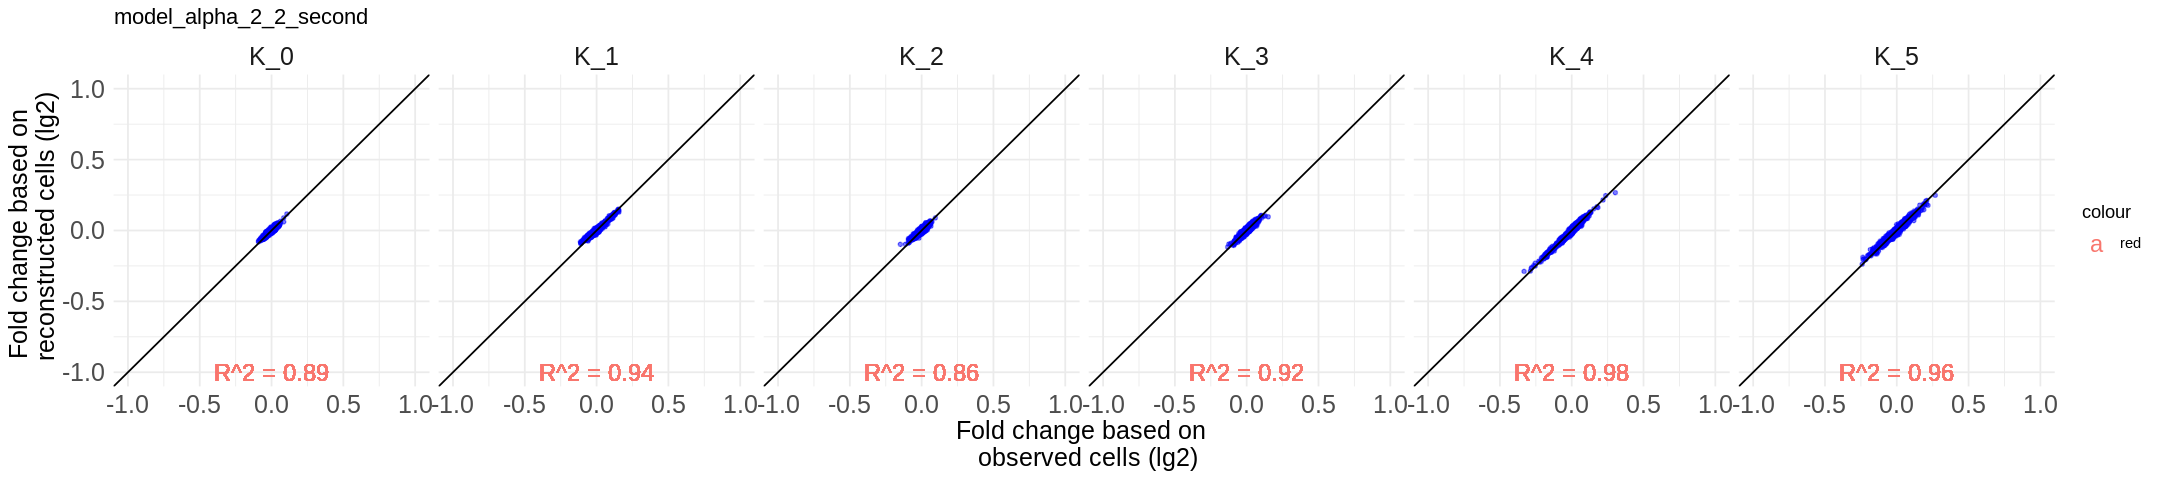

Using X as id variables



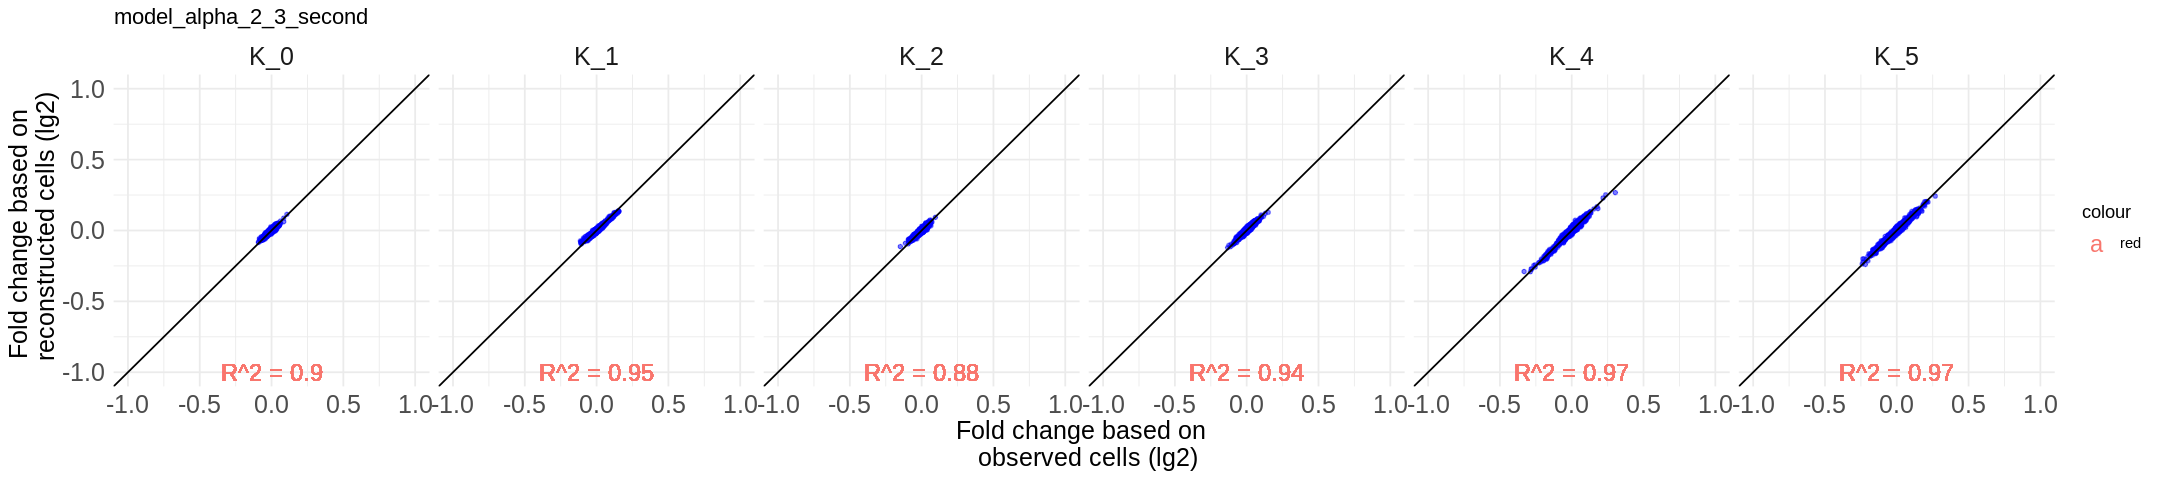

Using X as id variables



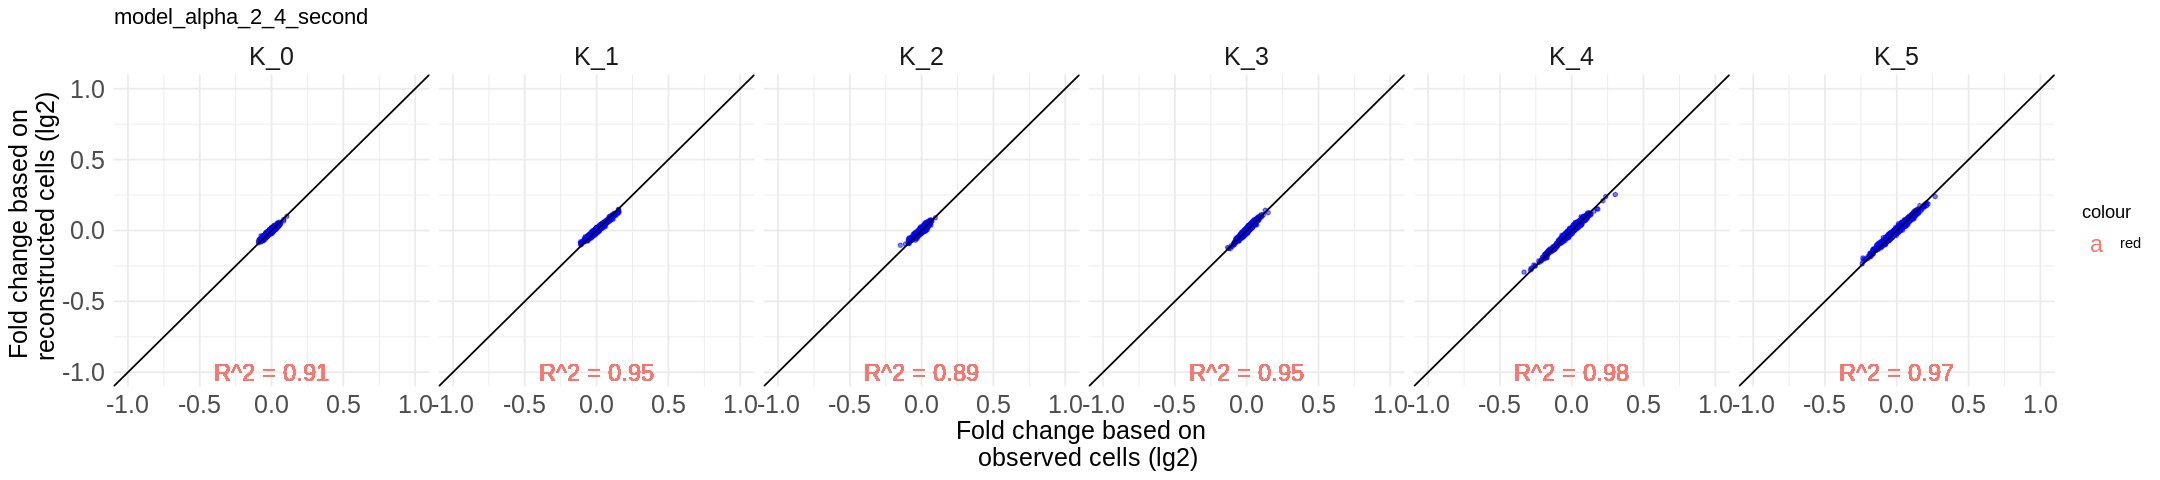

Using X as id variables



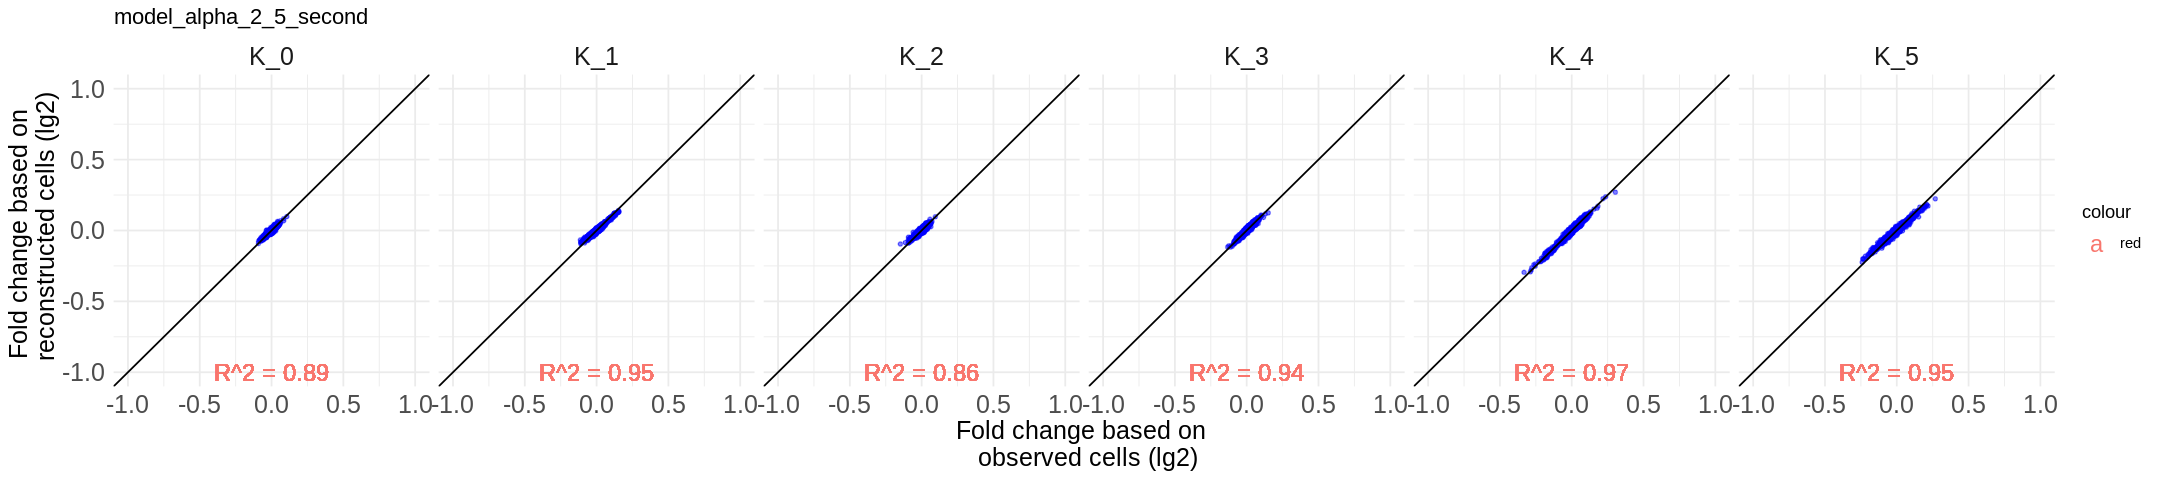

Using X as id variables



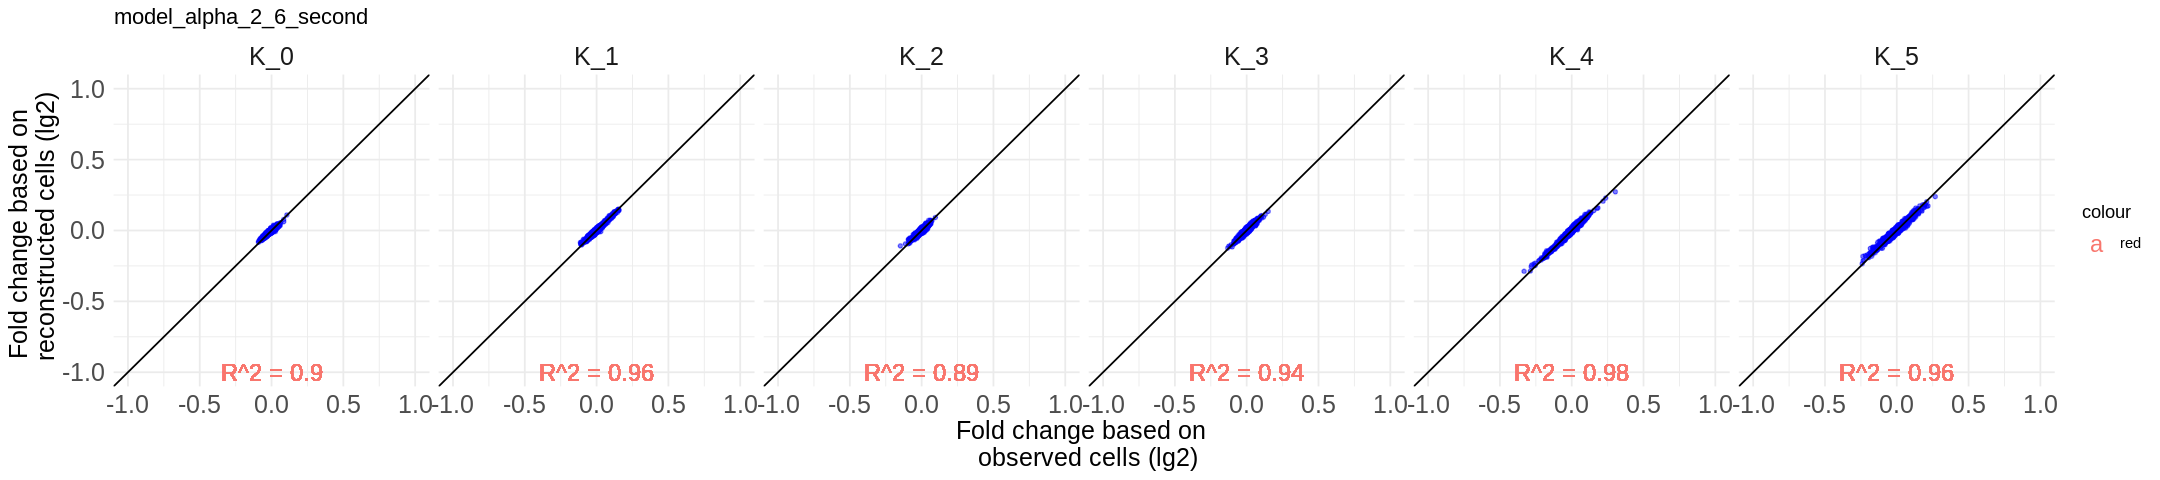

Using X as id variables



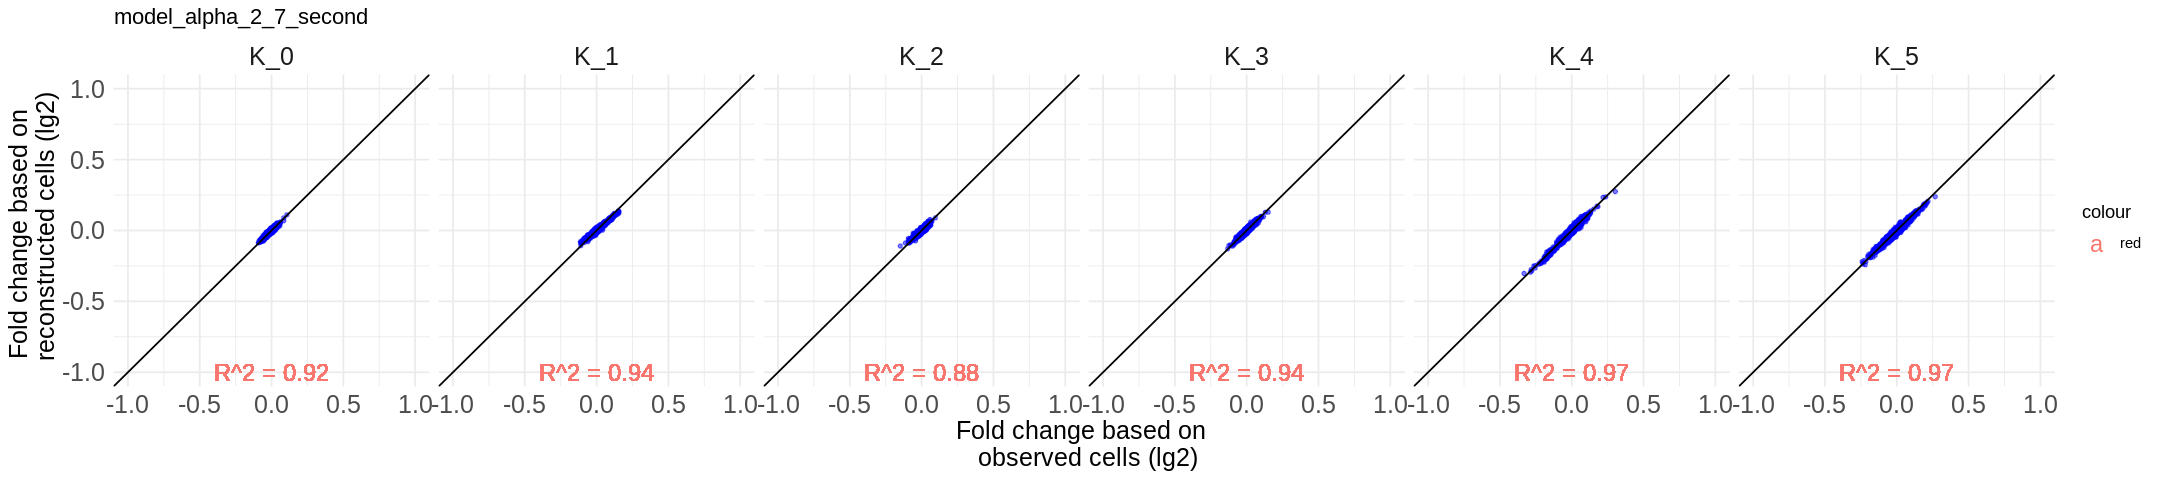

Using X as id variables



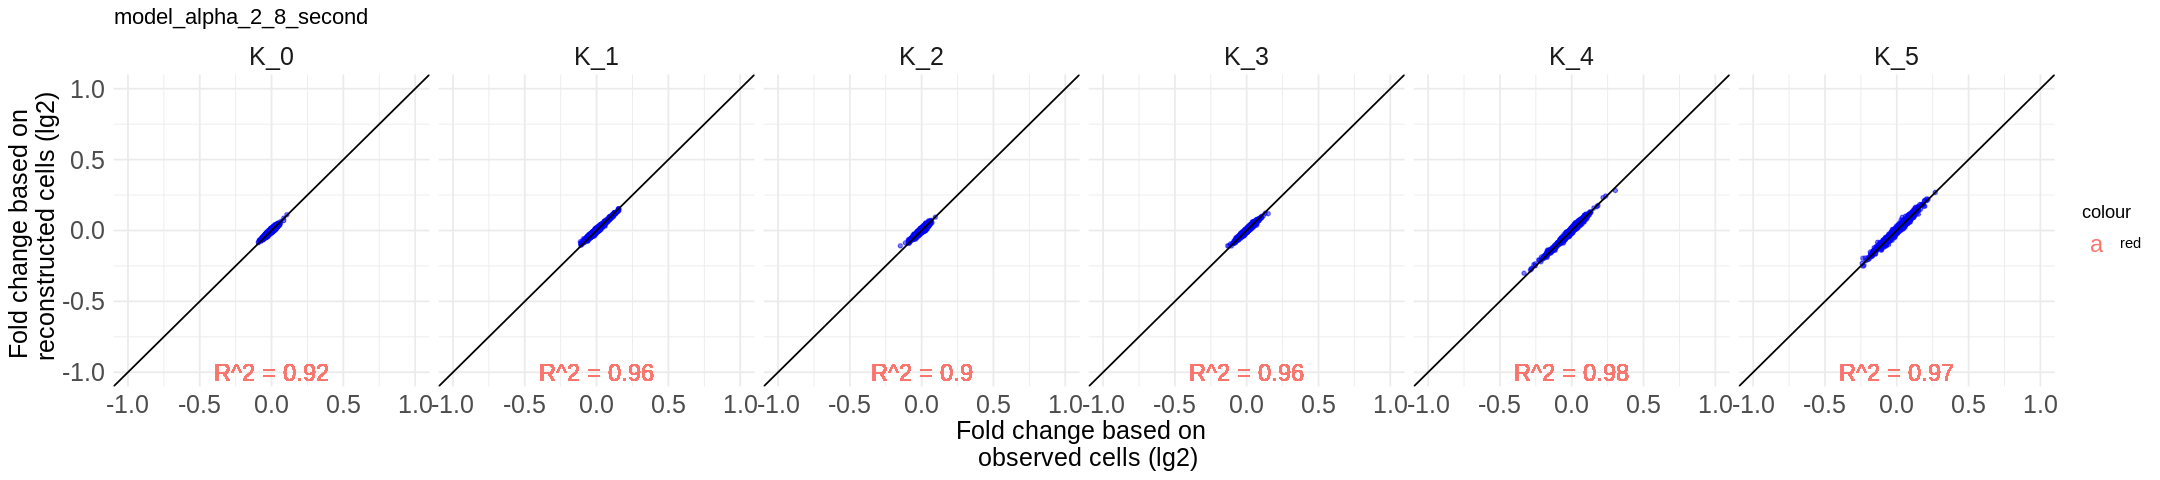

Using X as id variables



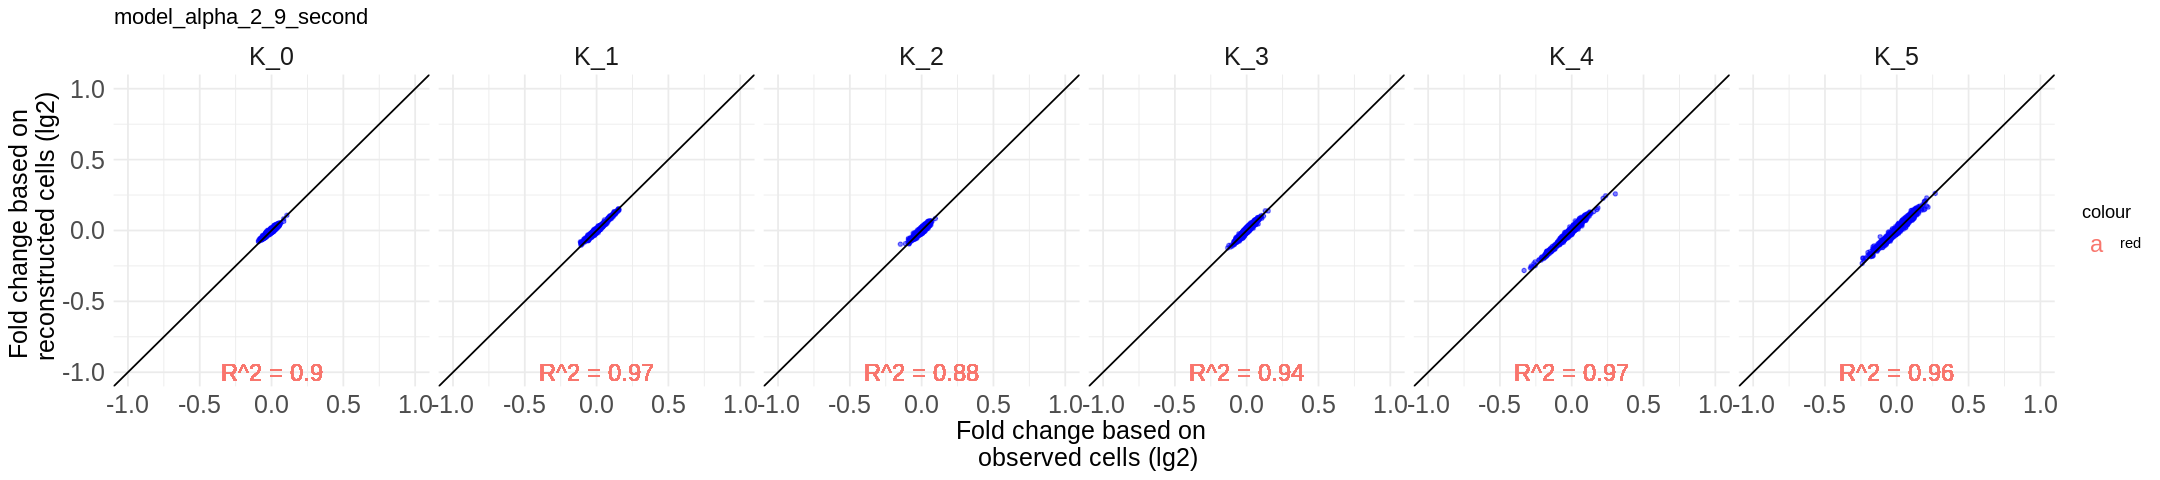

Using X as id variables



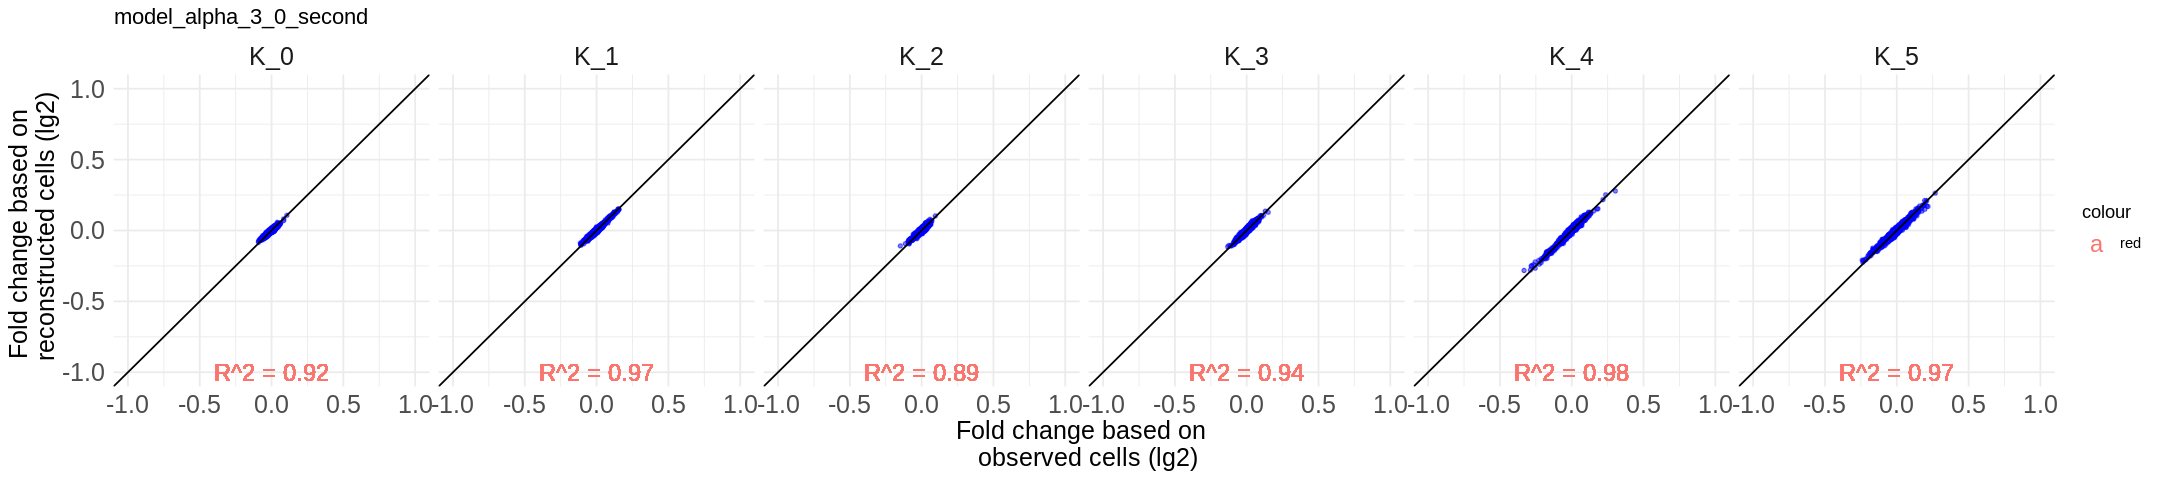

Using X as id variables



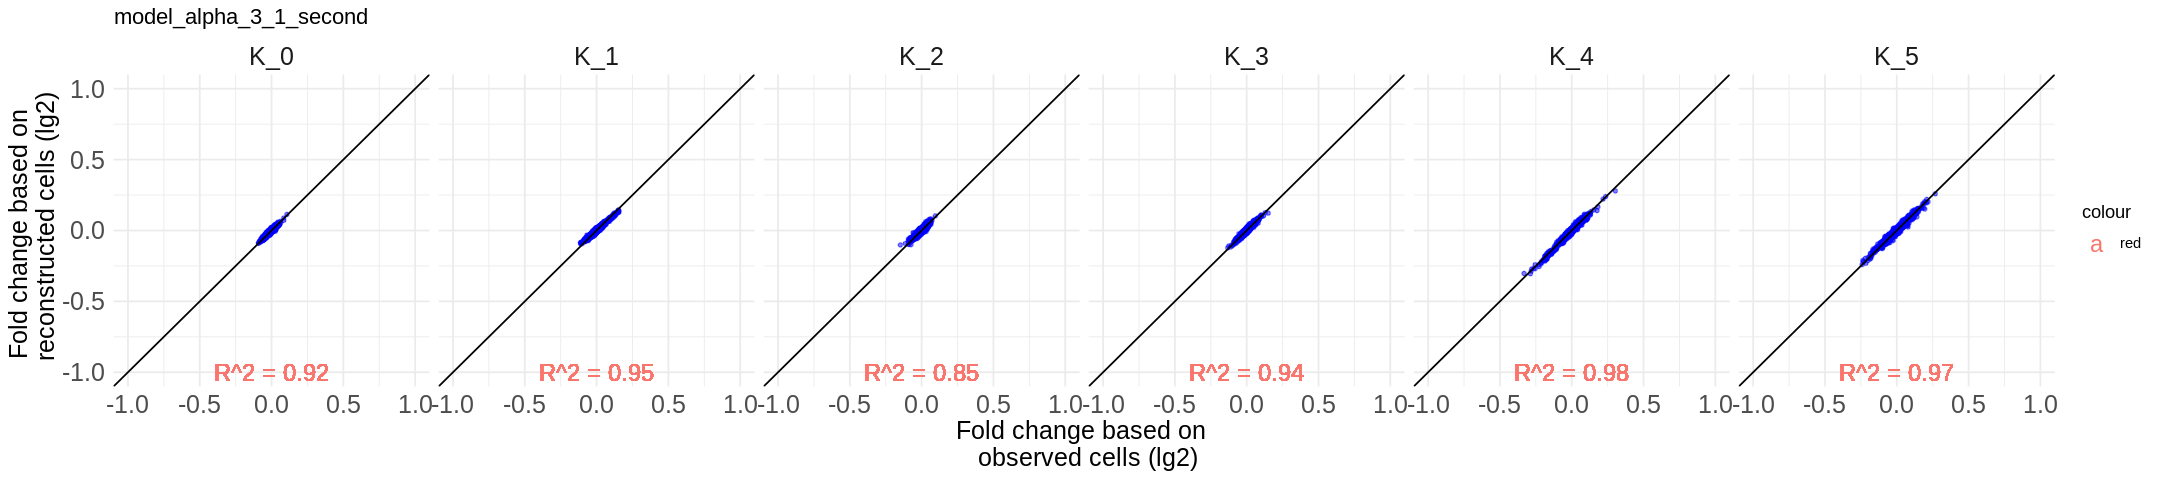

Using X as id variables



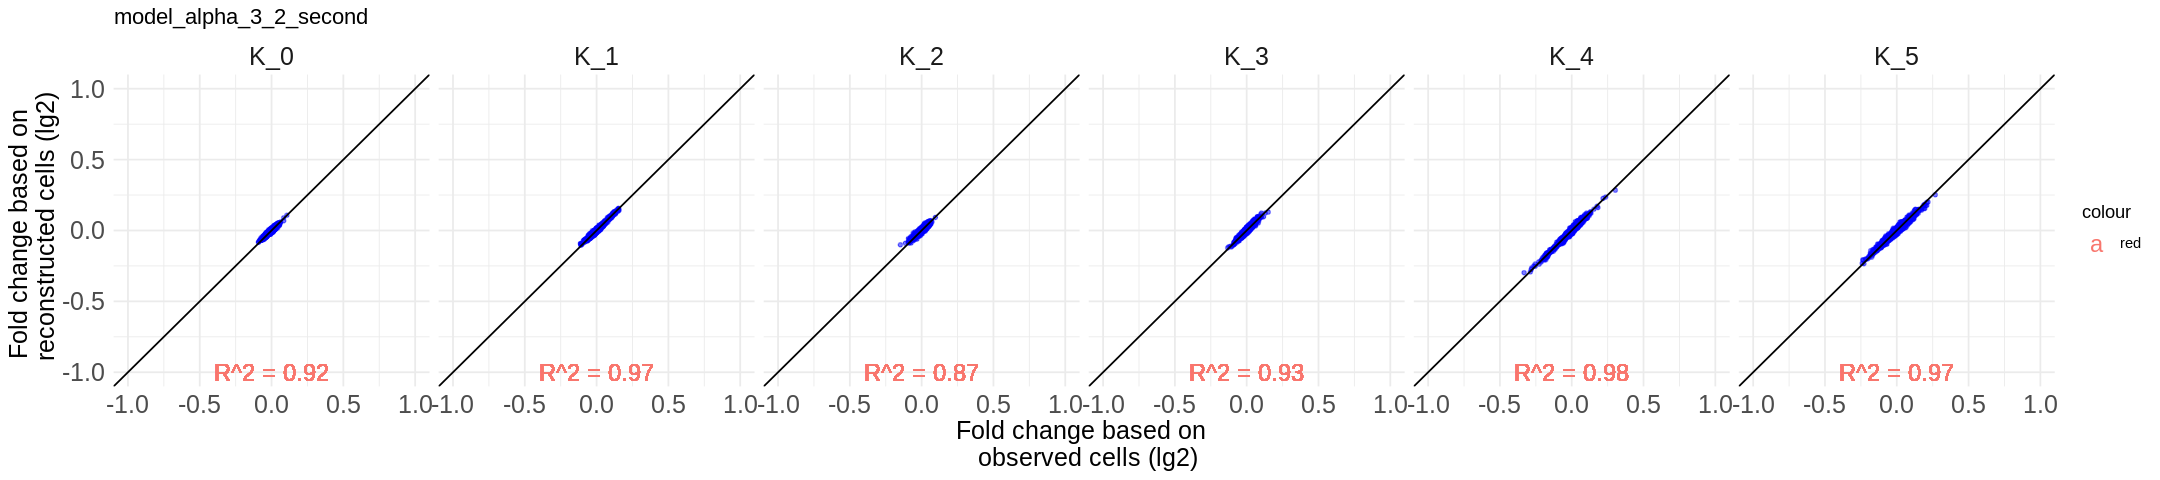

Using X as id variables



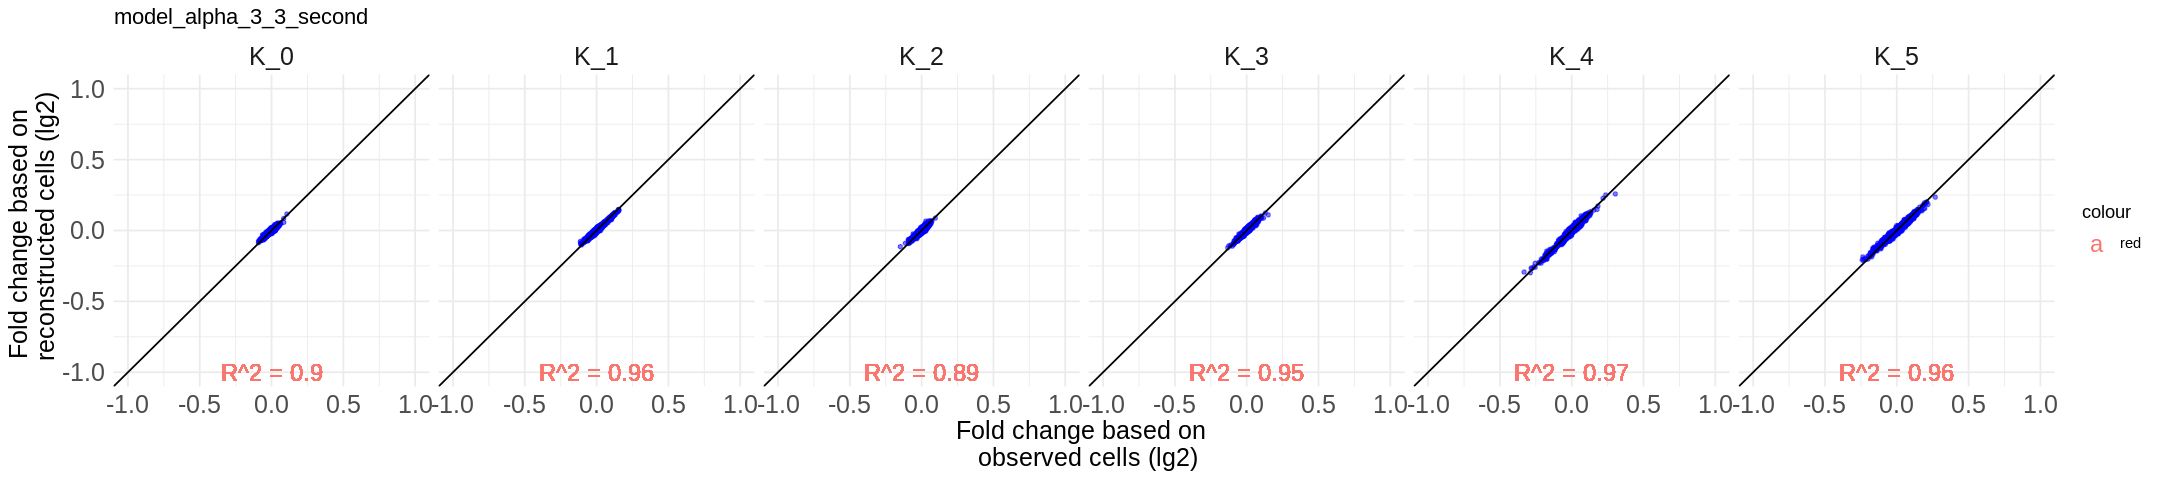

Using X as id variables



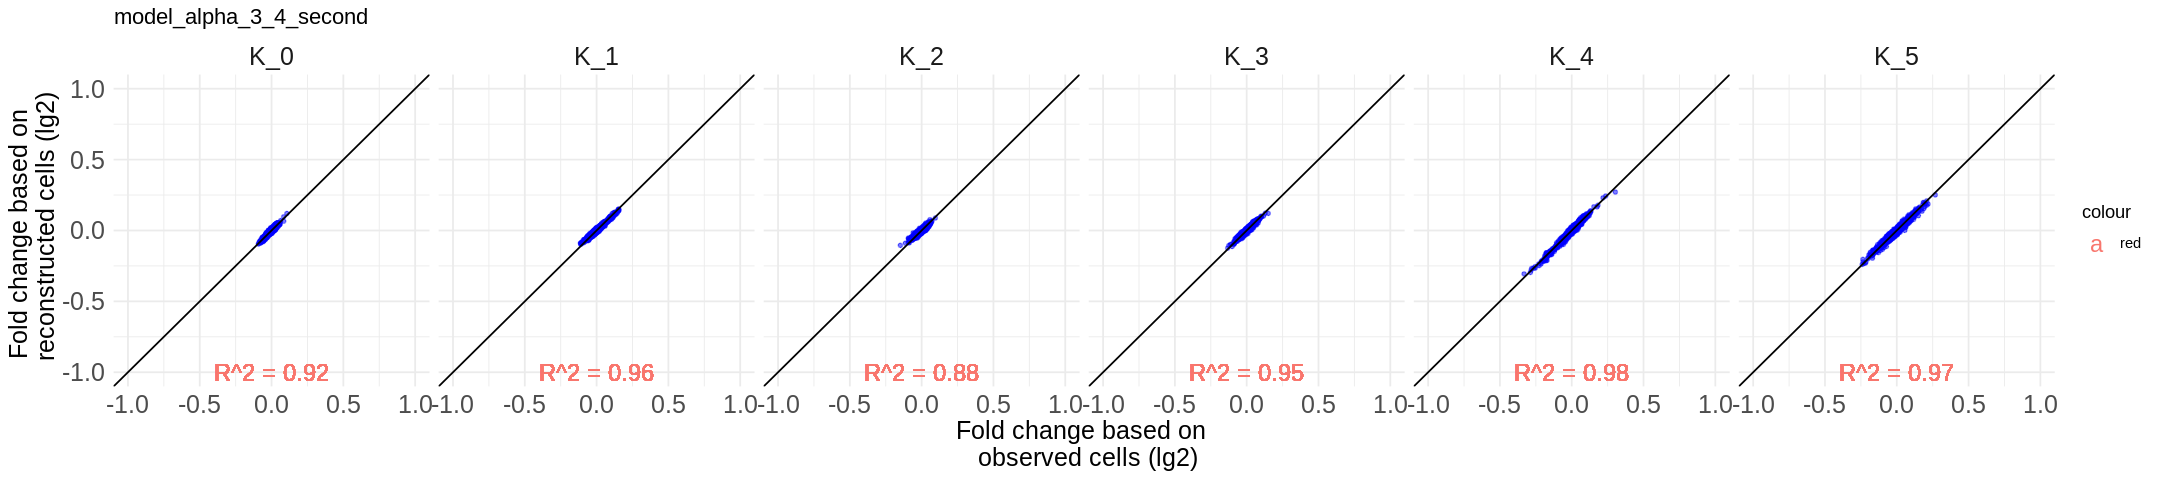

Using X as id variables



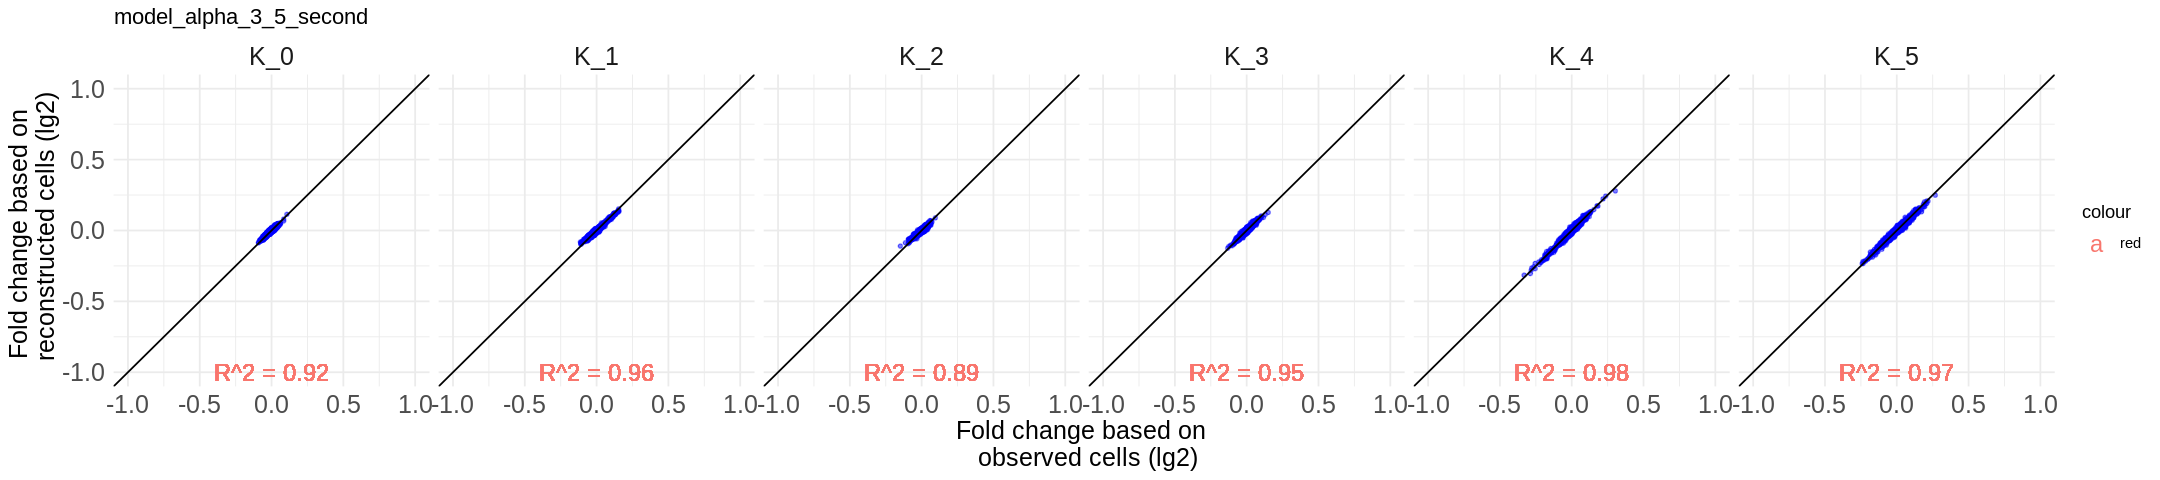

Using X as id variables



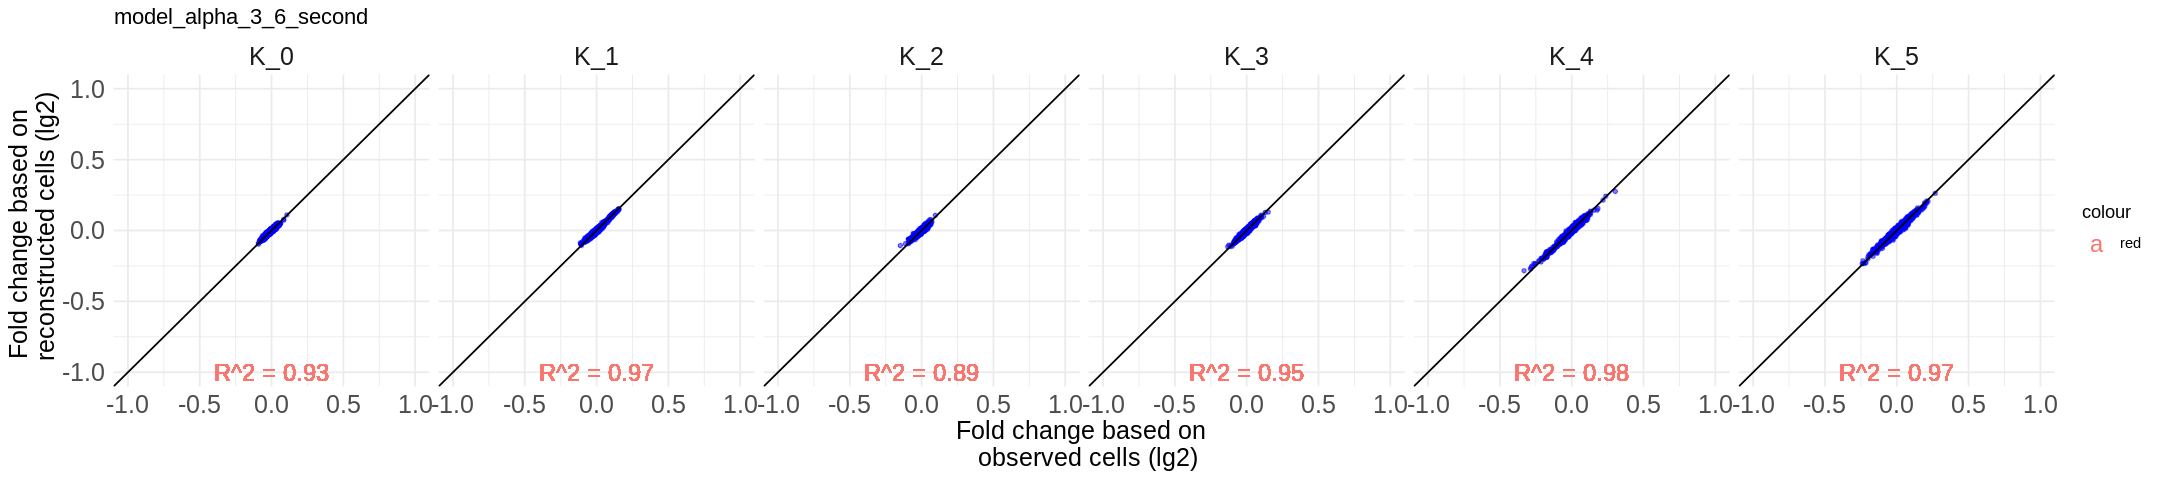

Using X as id variables



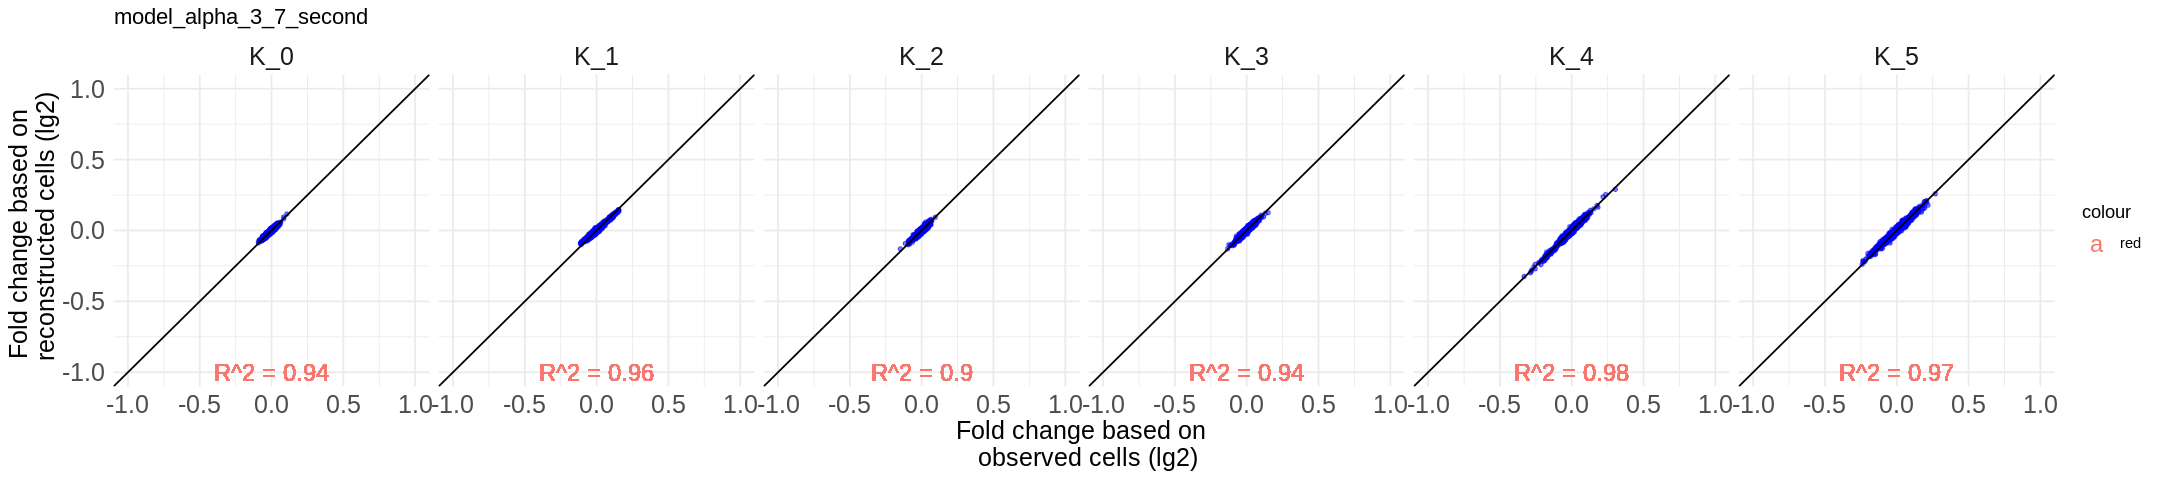

Using X as id variables



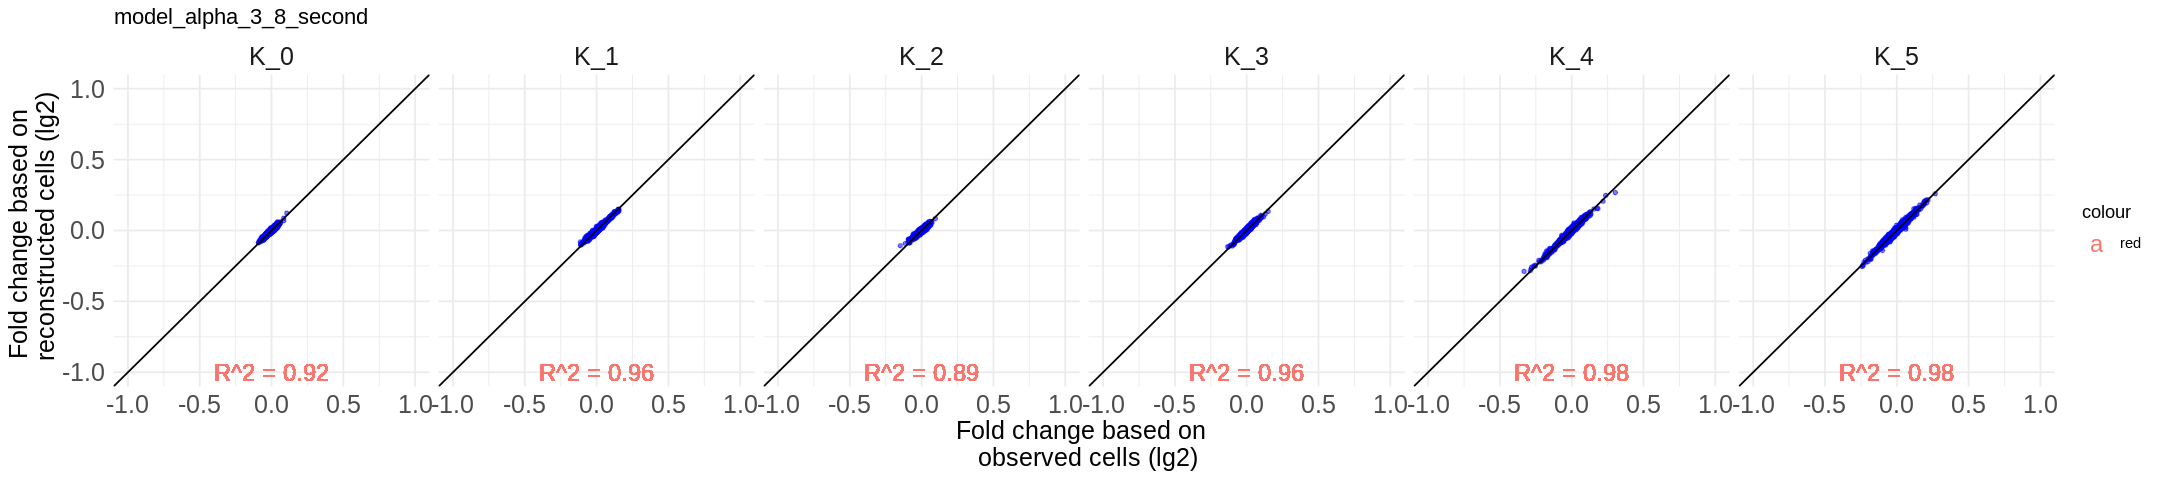

Using X as id variables



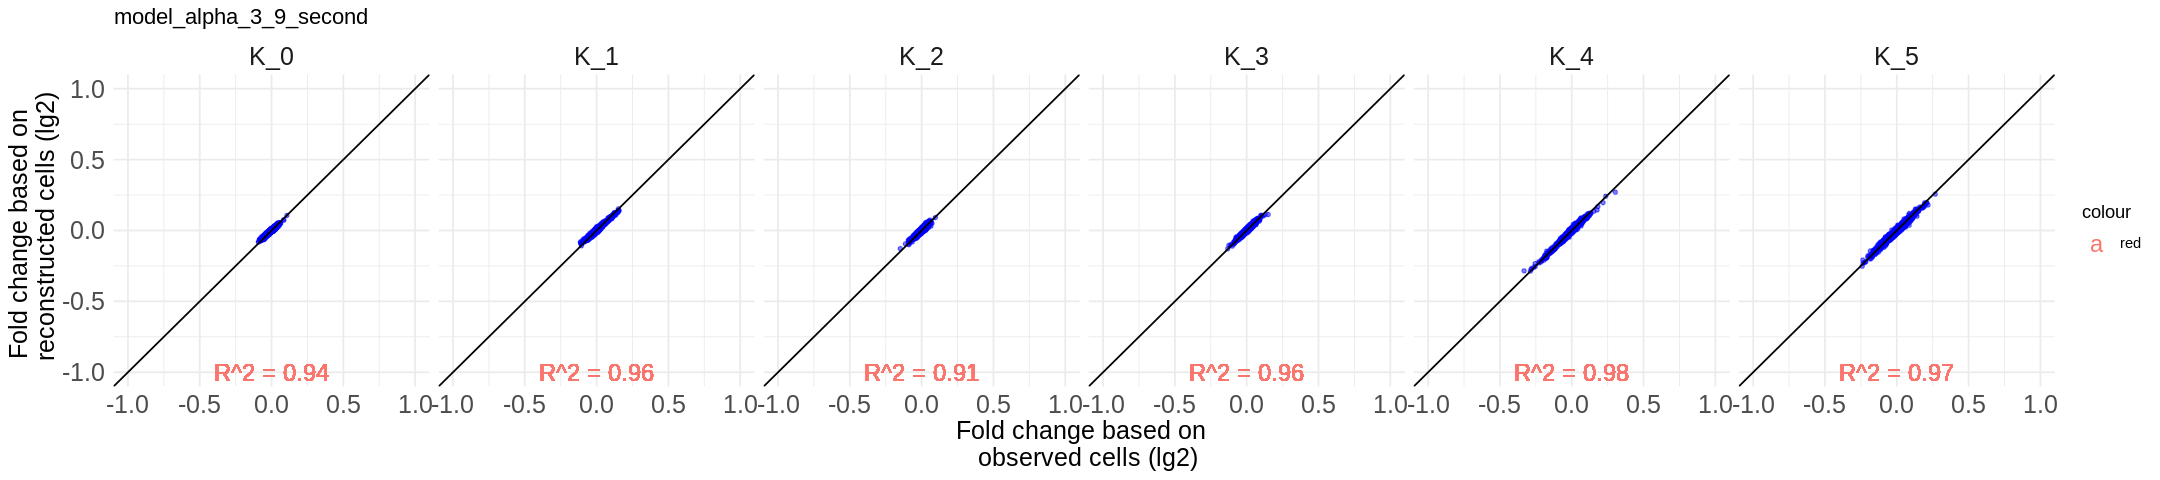

Using X as id variables



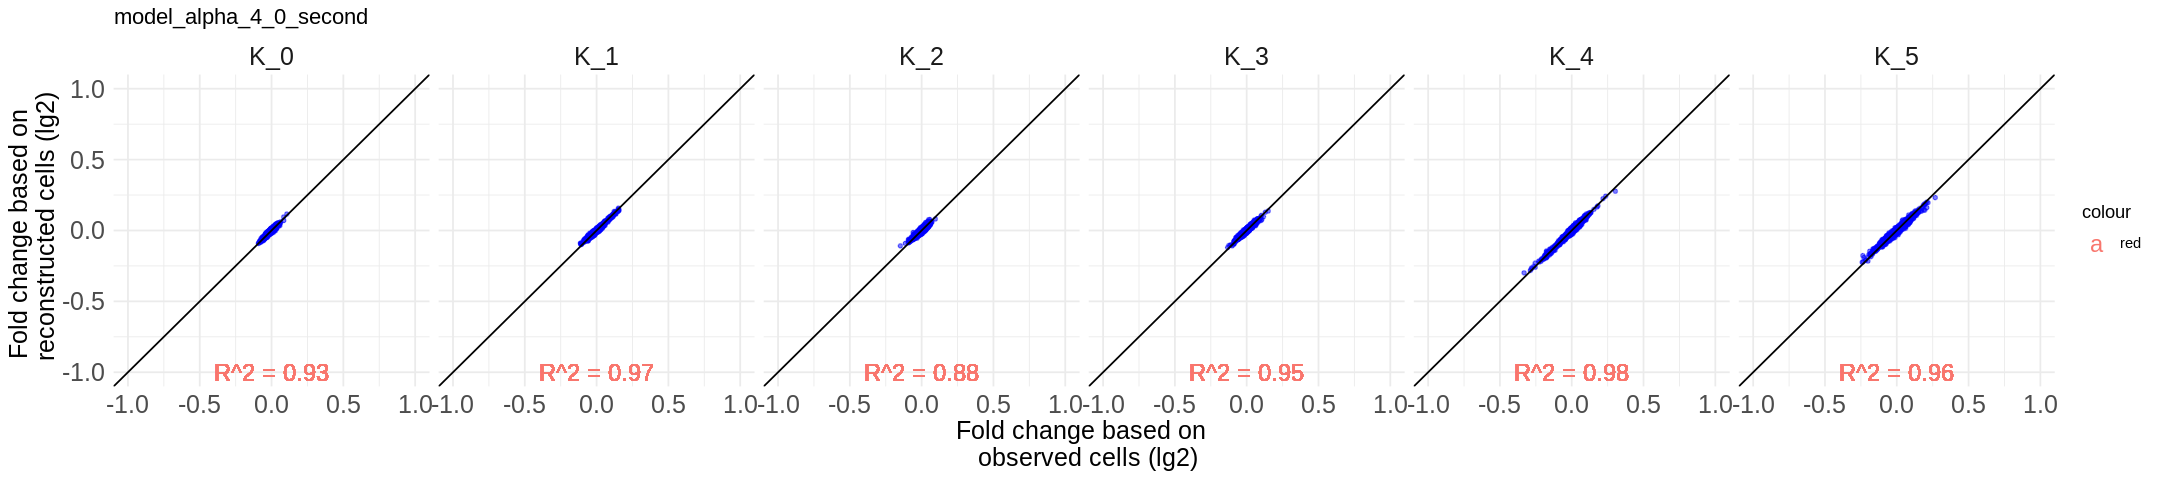

Using X as id variables



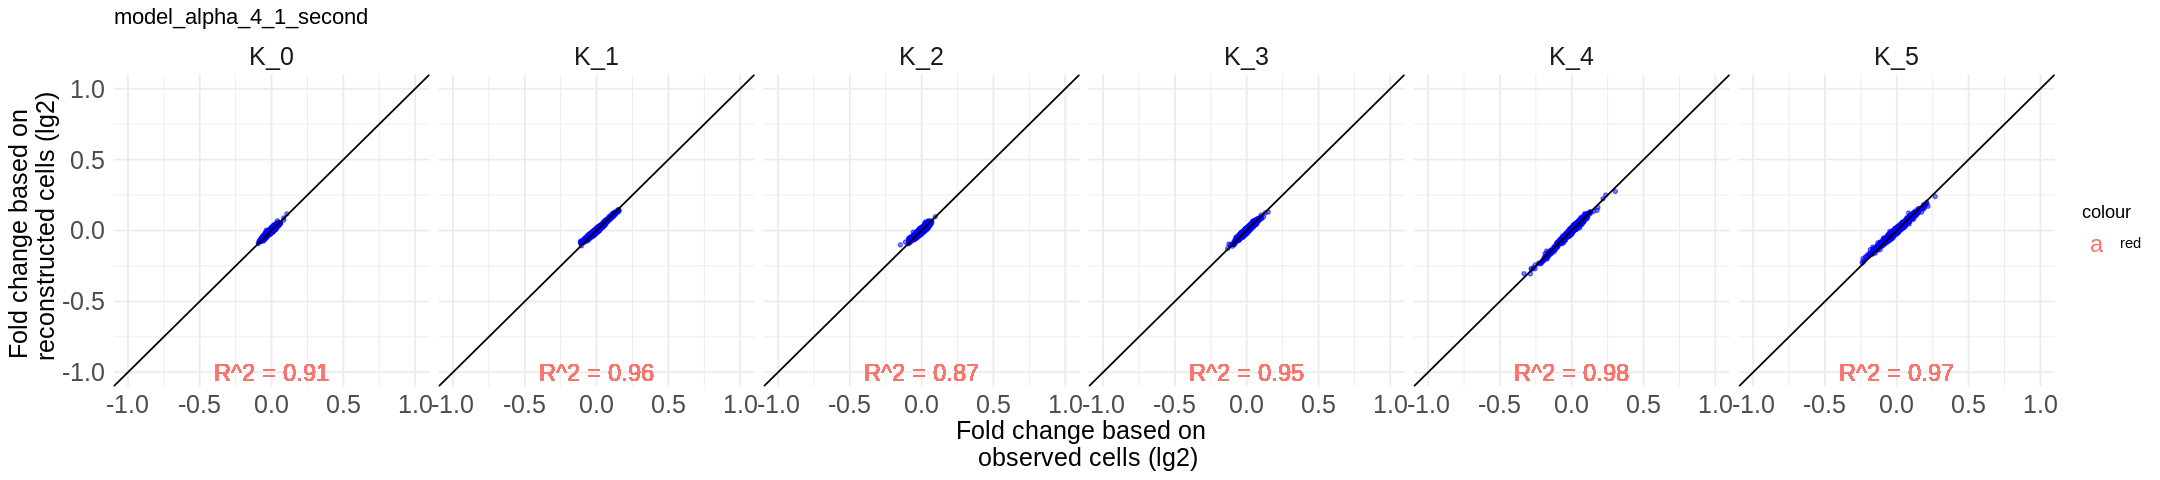

Using X as id variables



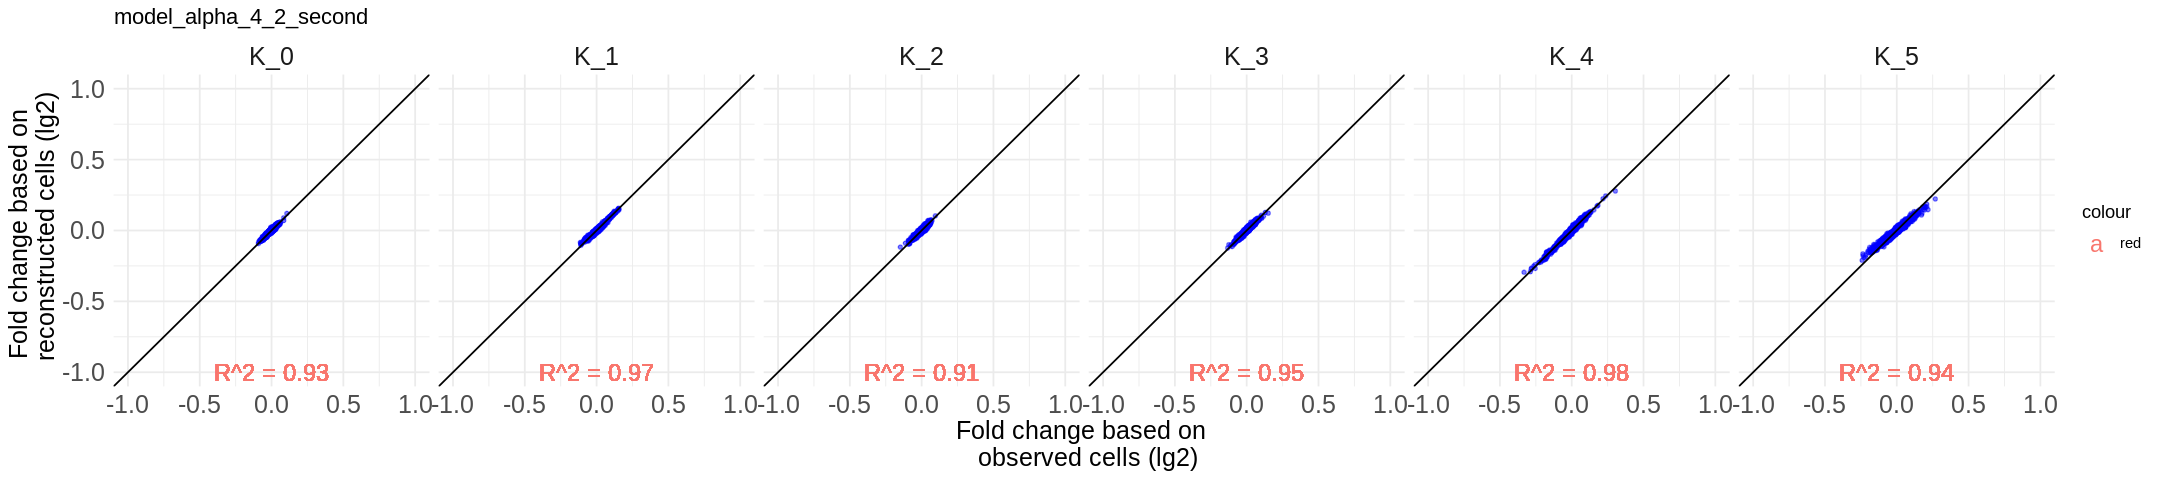

Using X as id variables



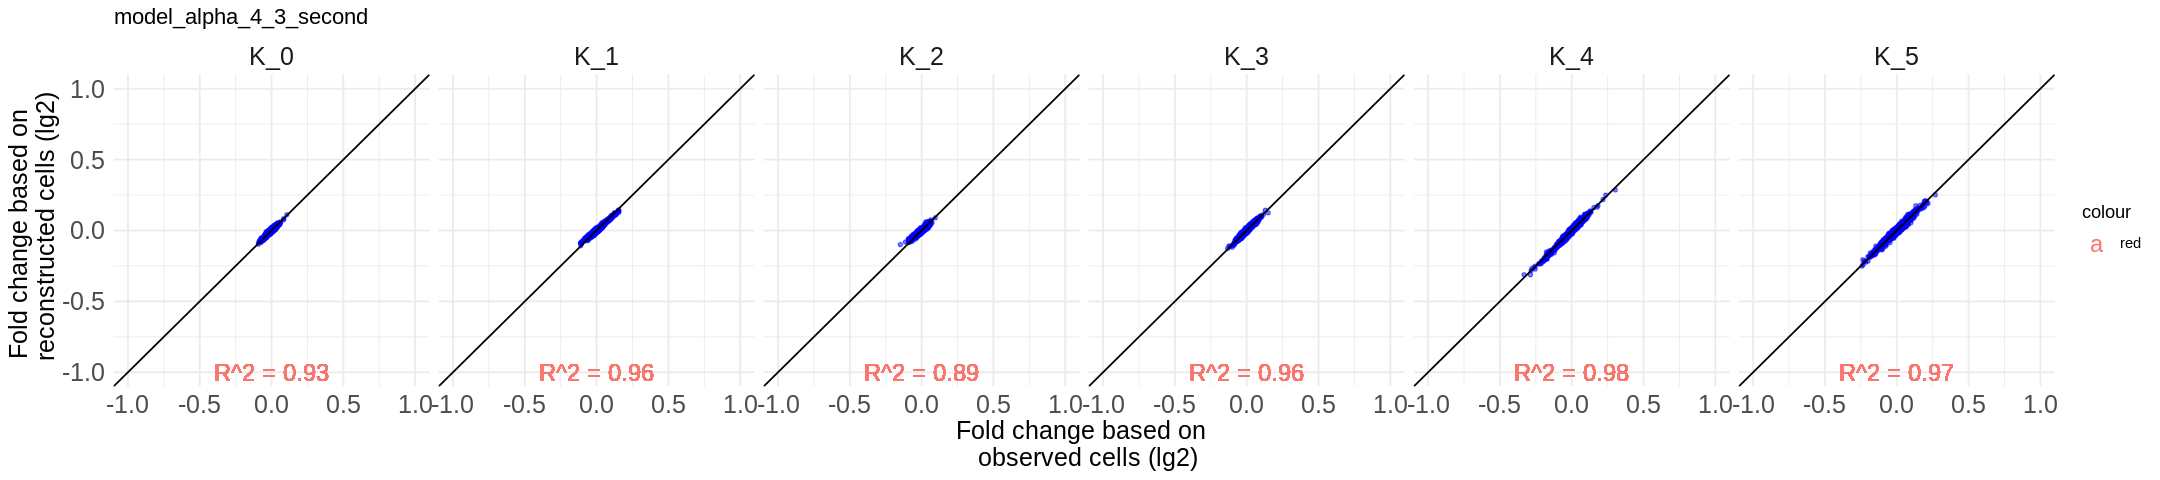

Using X as id variables



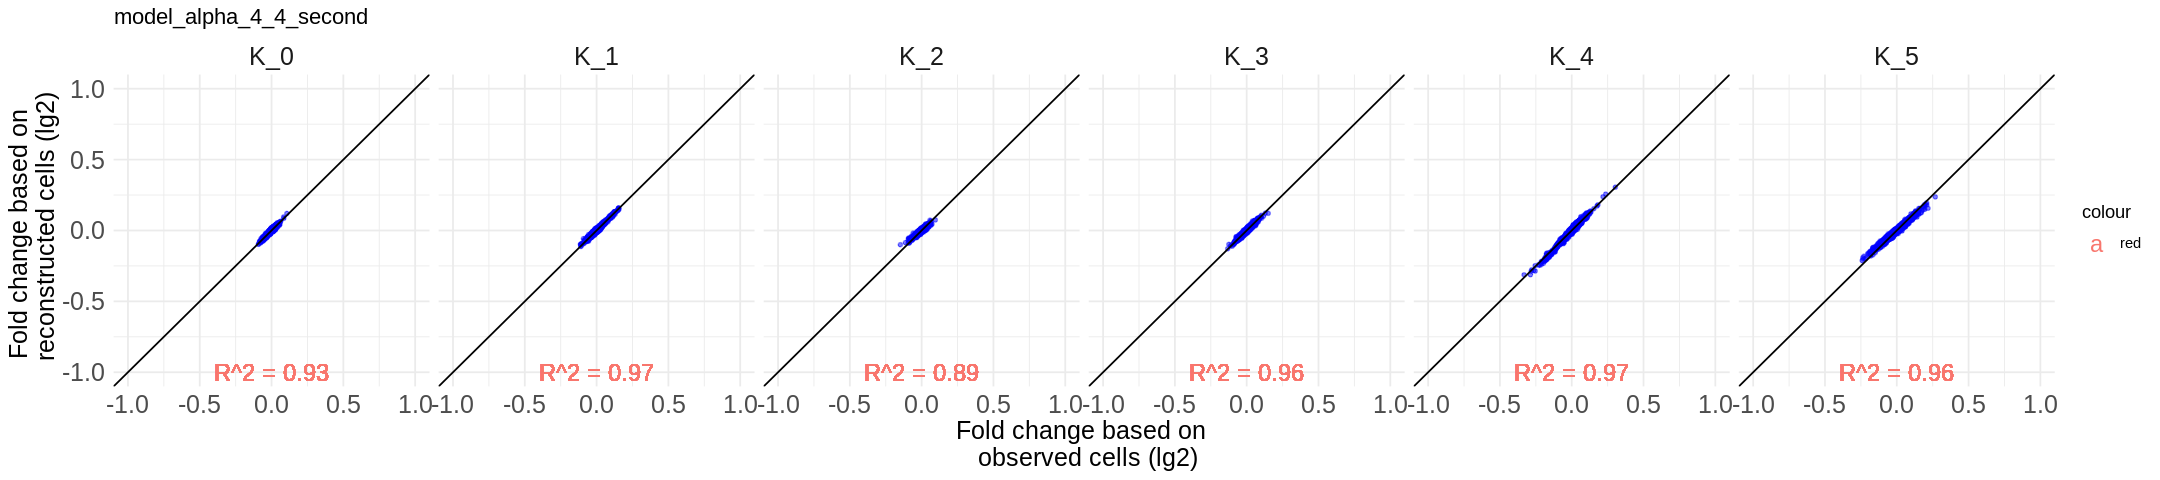

Using X as id variables



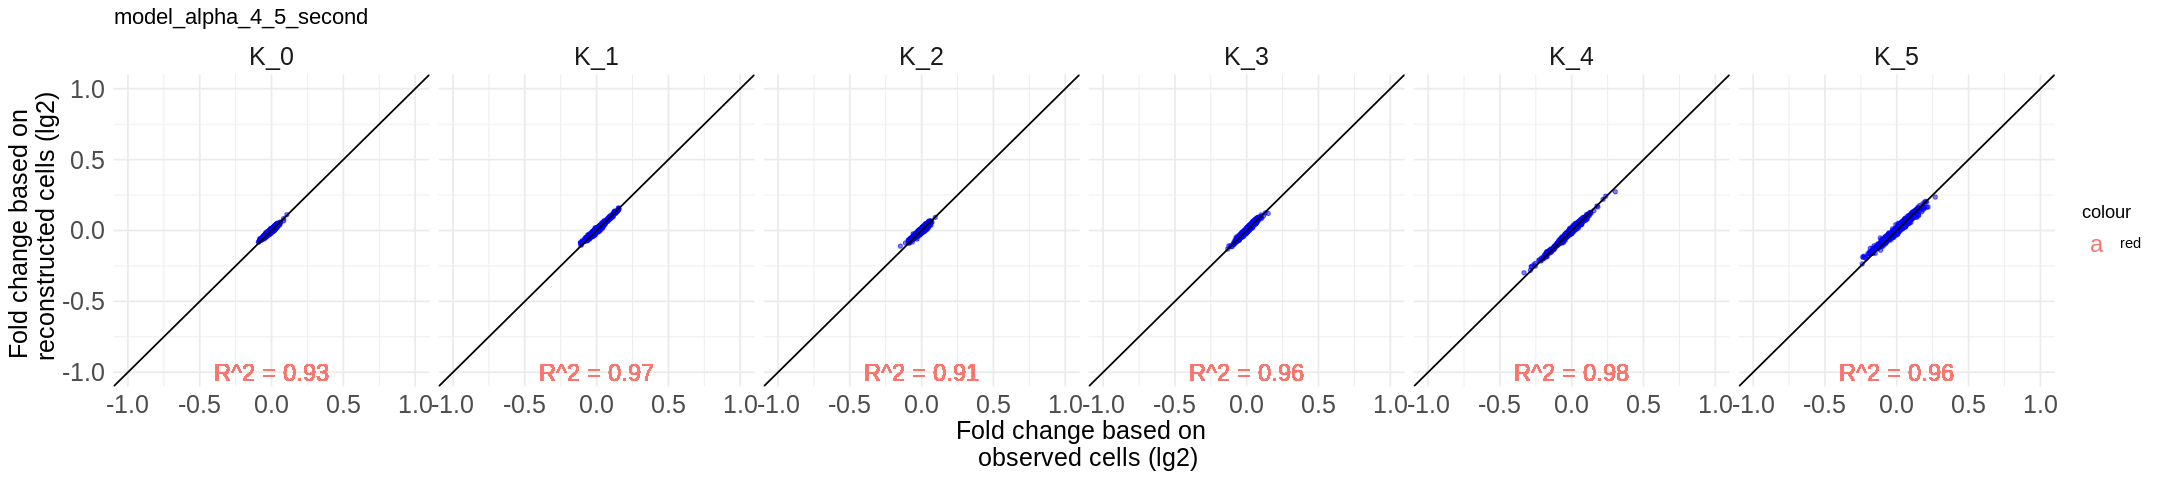

Using X as id variables



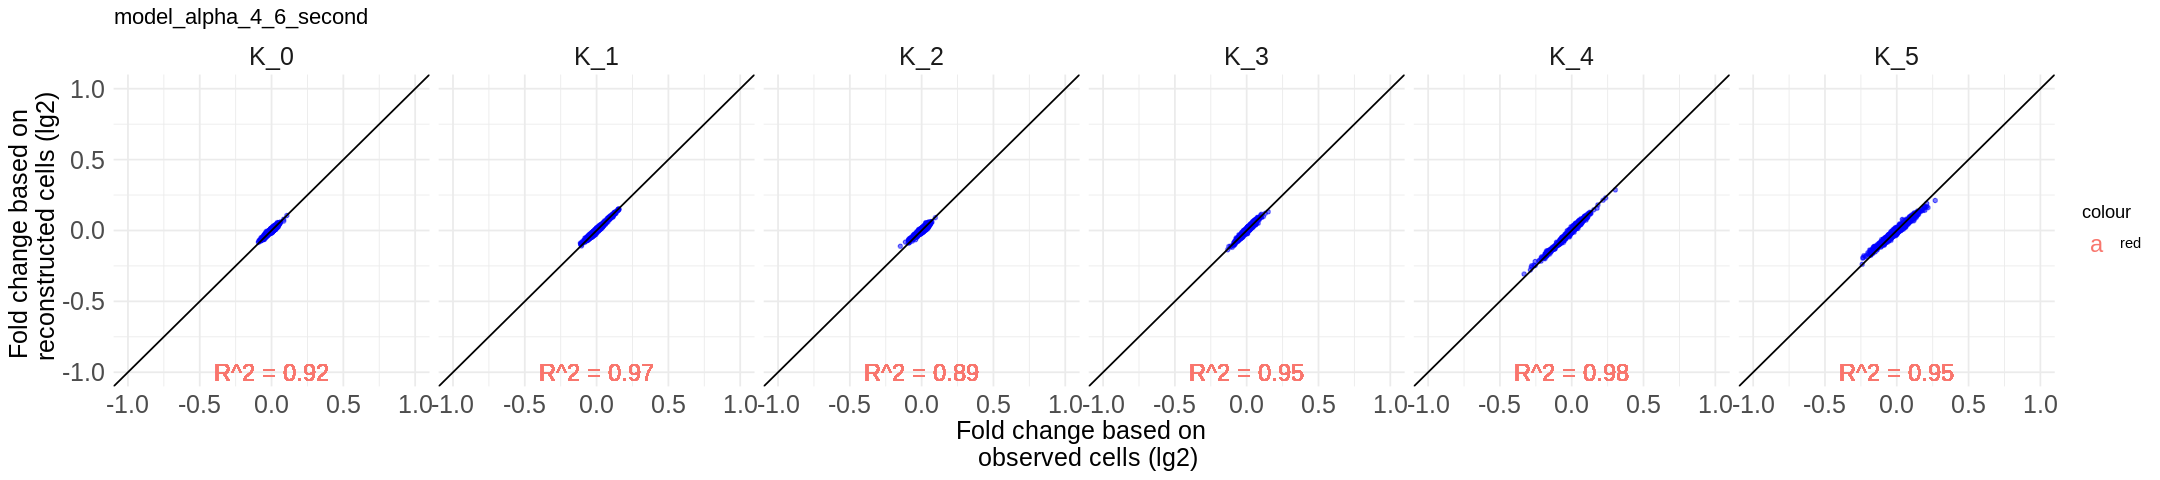

Using X as id variables



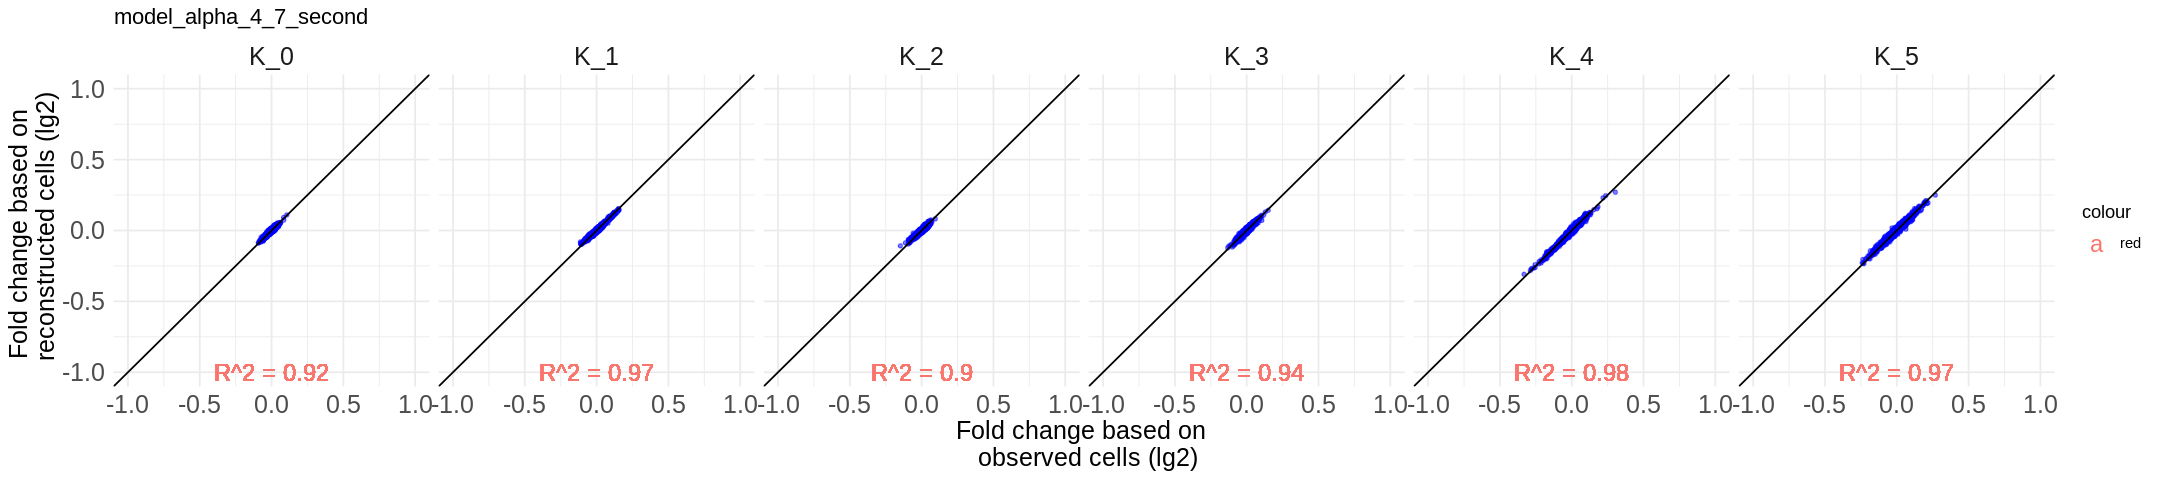

Using X as id variables



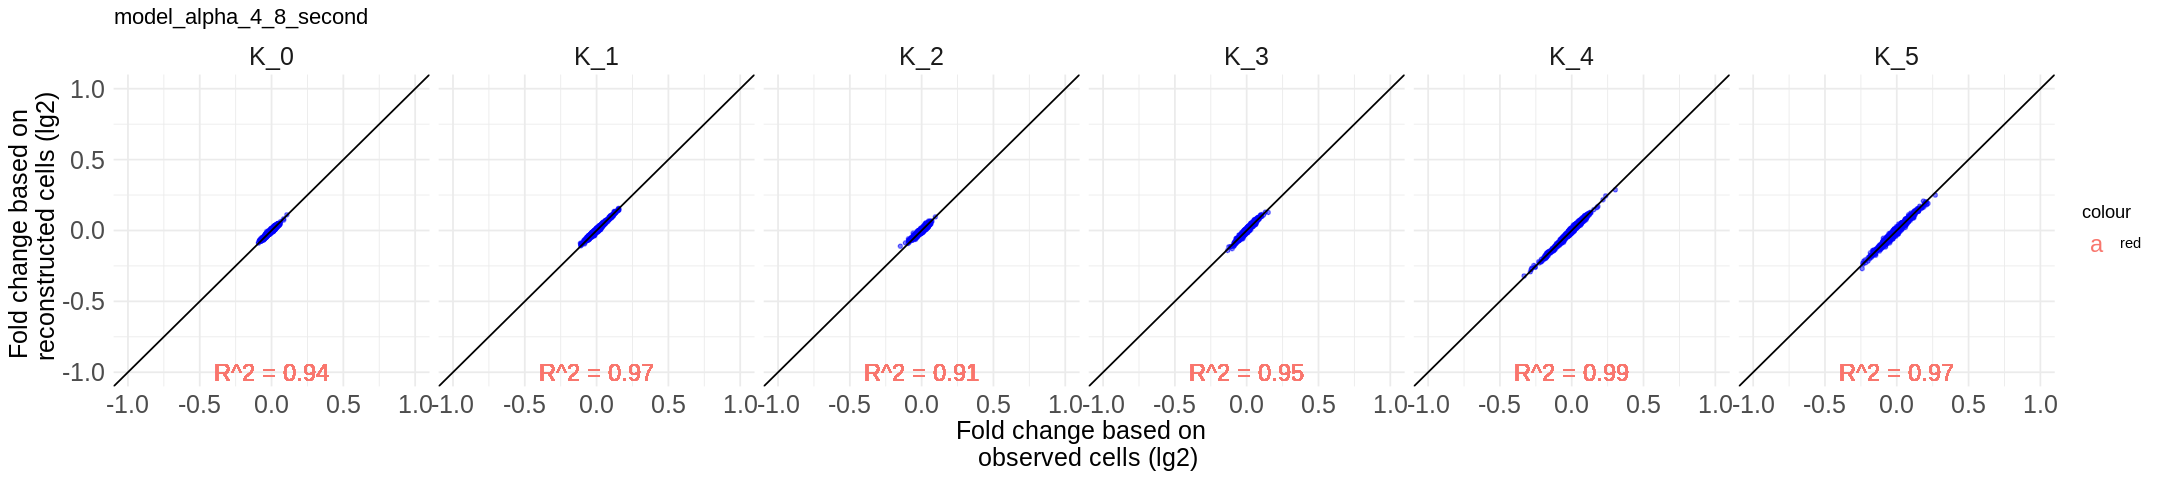

Using X as id variables



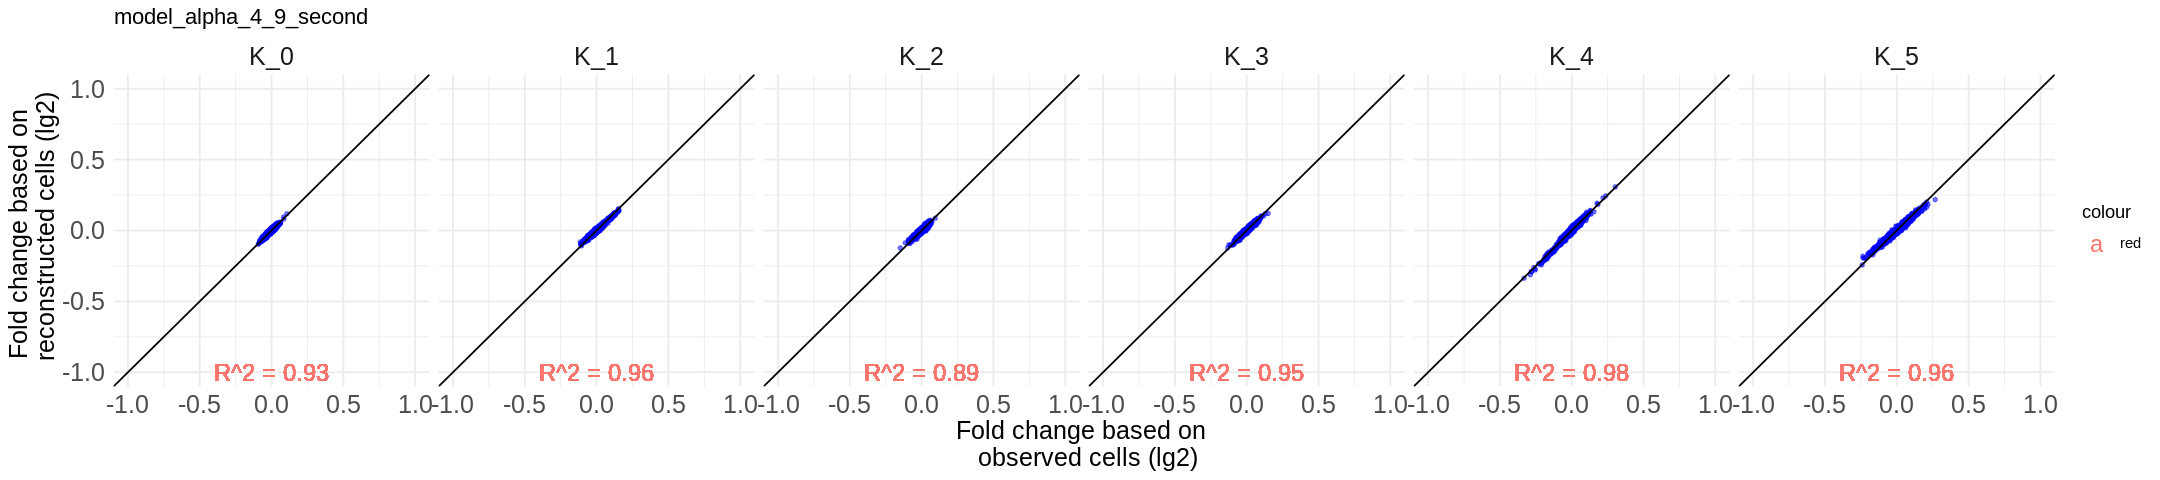

Using X as id variables



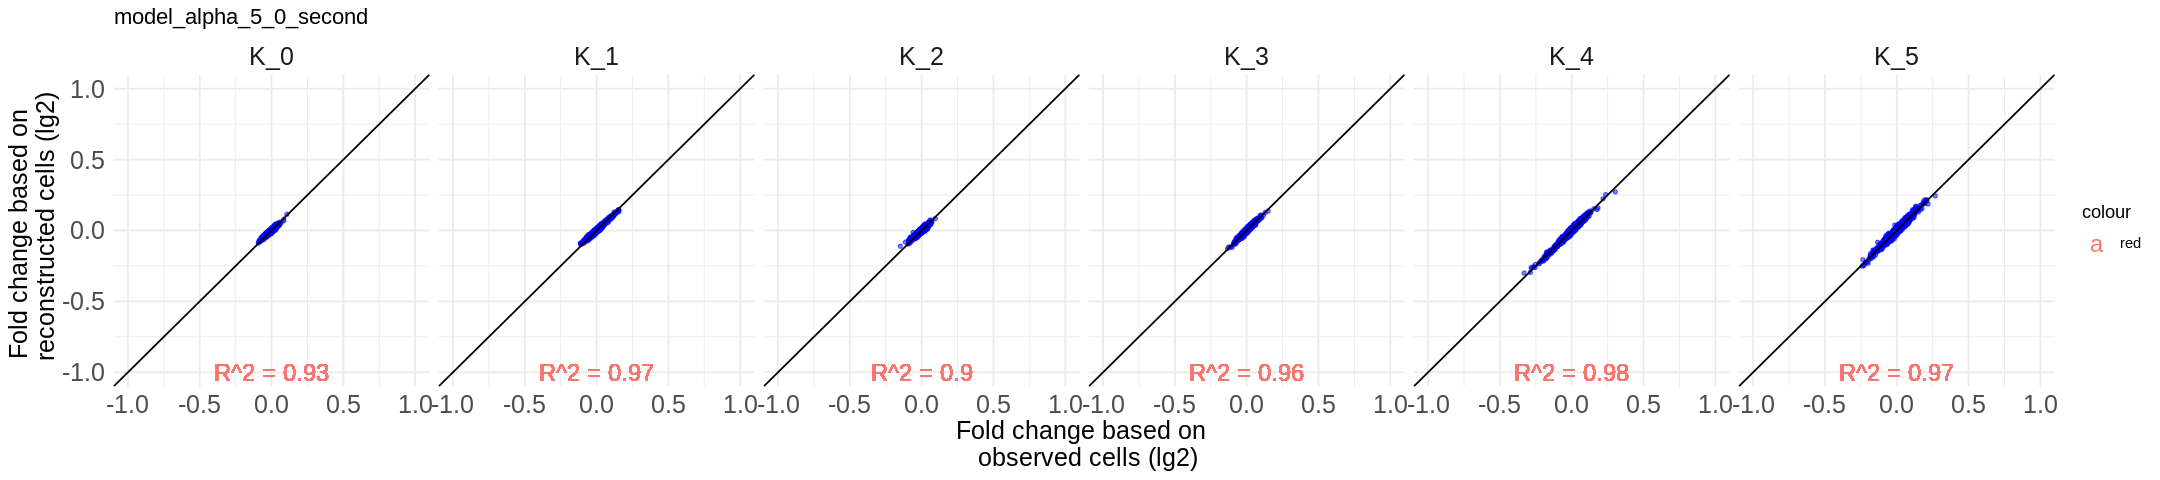

Using X as id variables



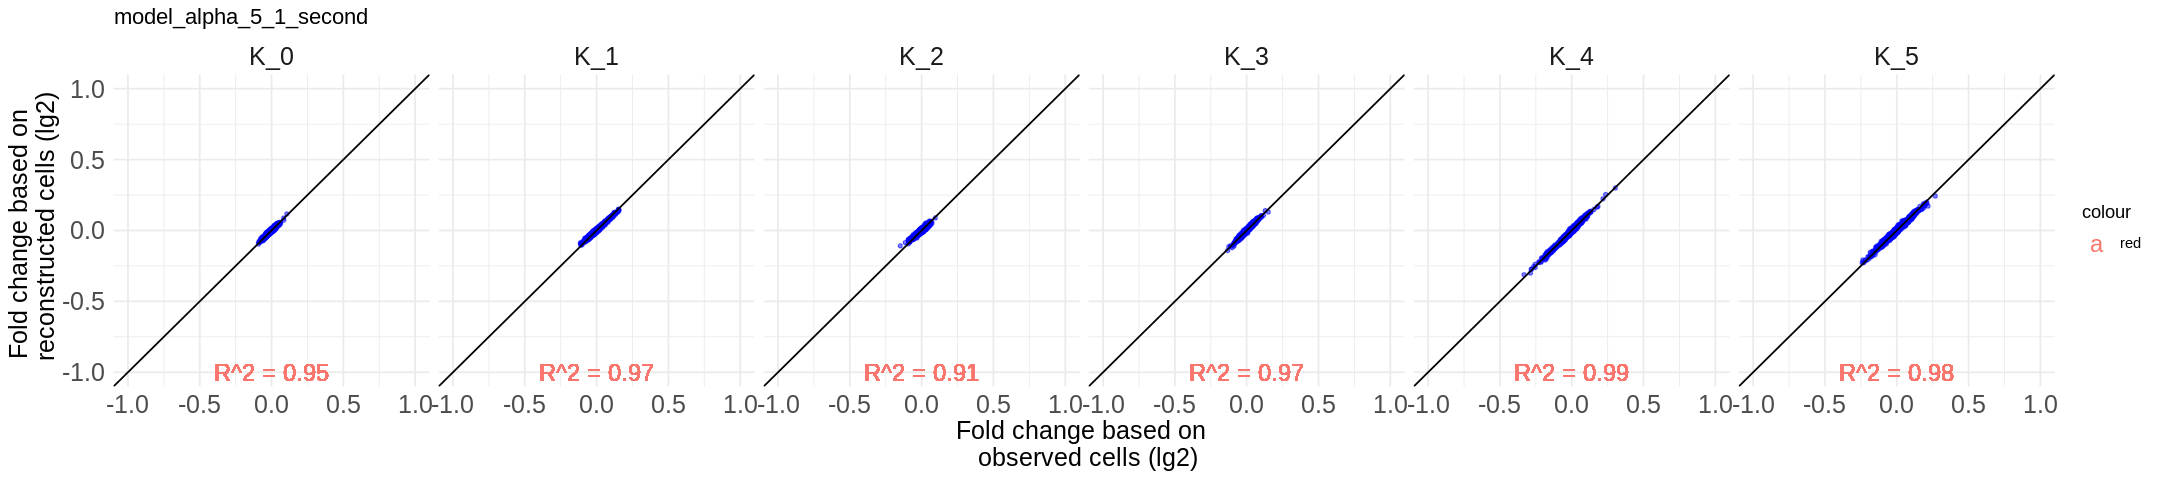

Using X as id variables



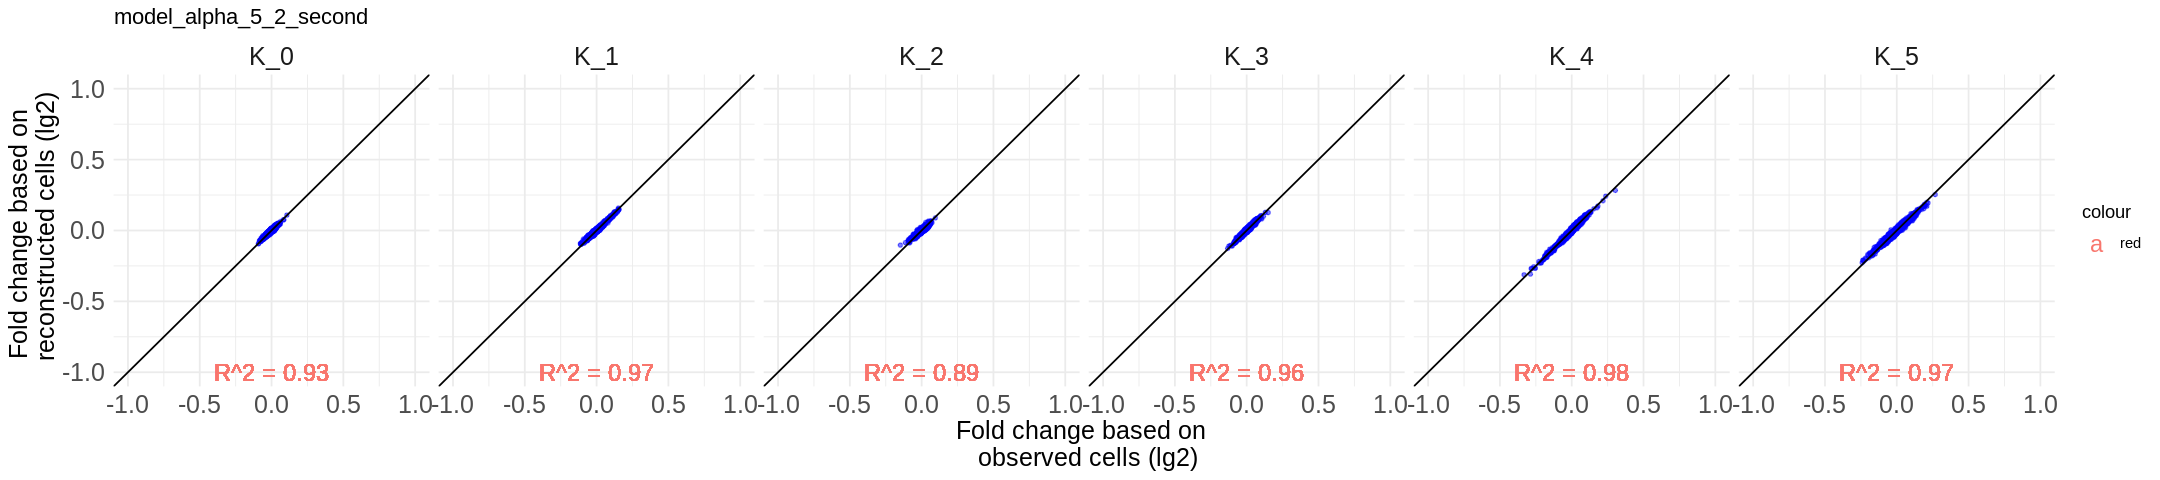

Using X as id variables



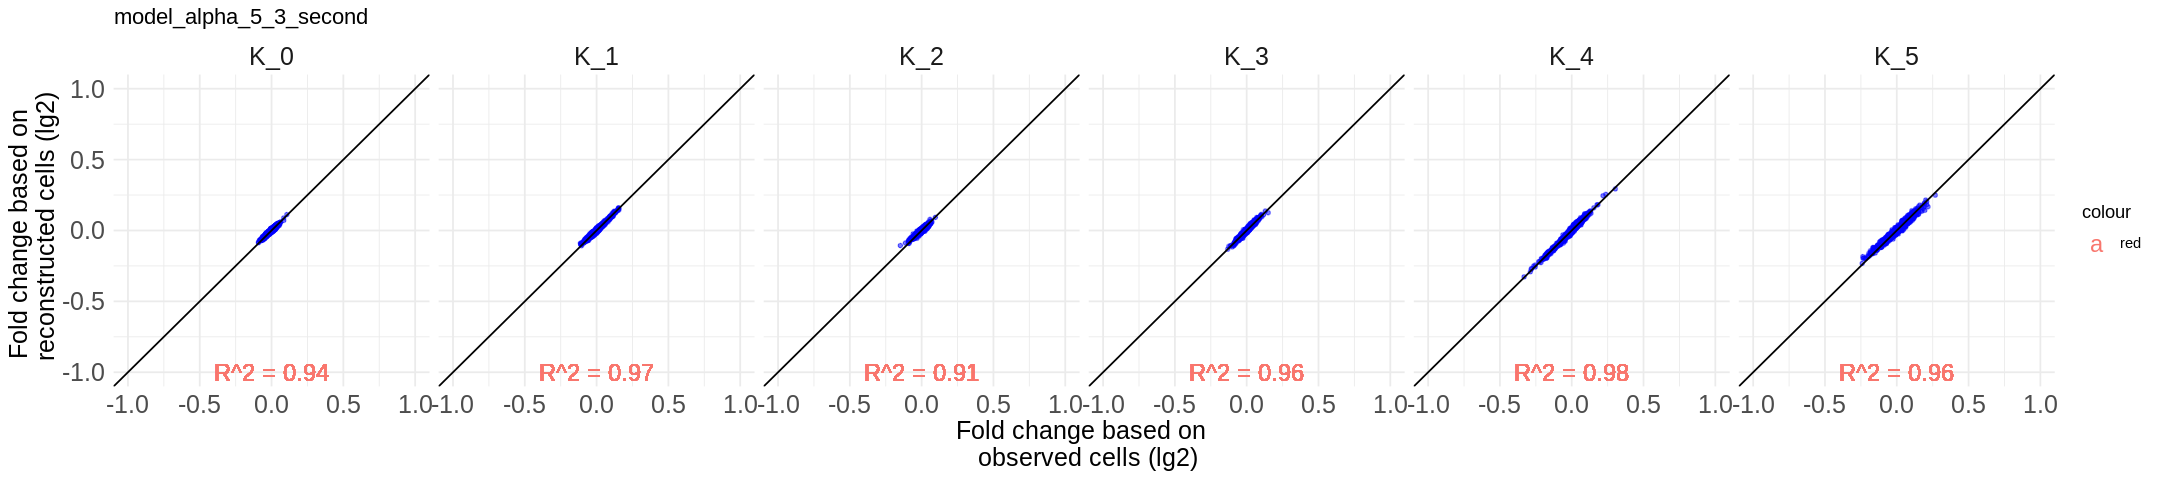

Using X as id variables



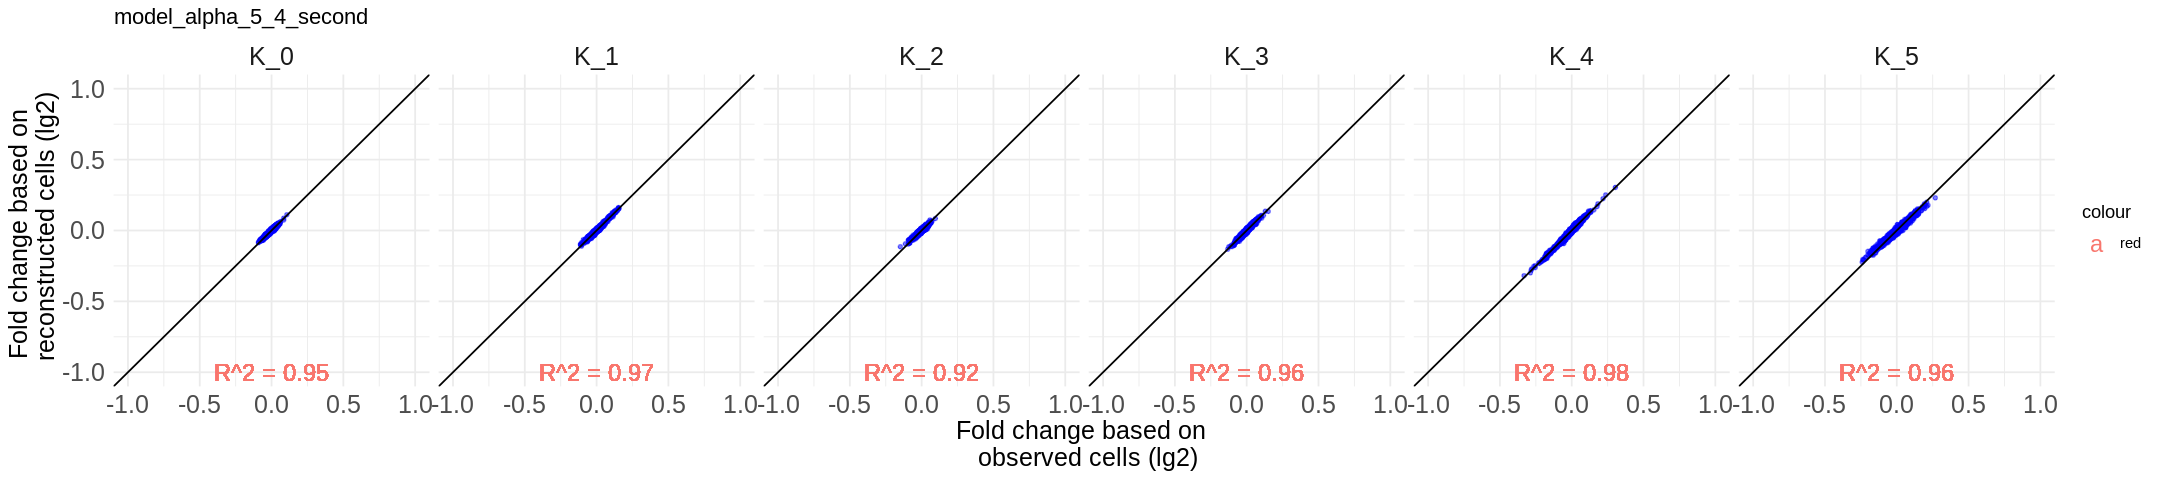

Using X as id variables



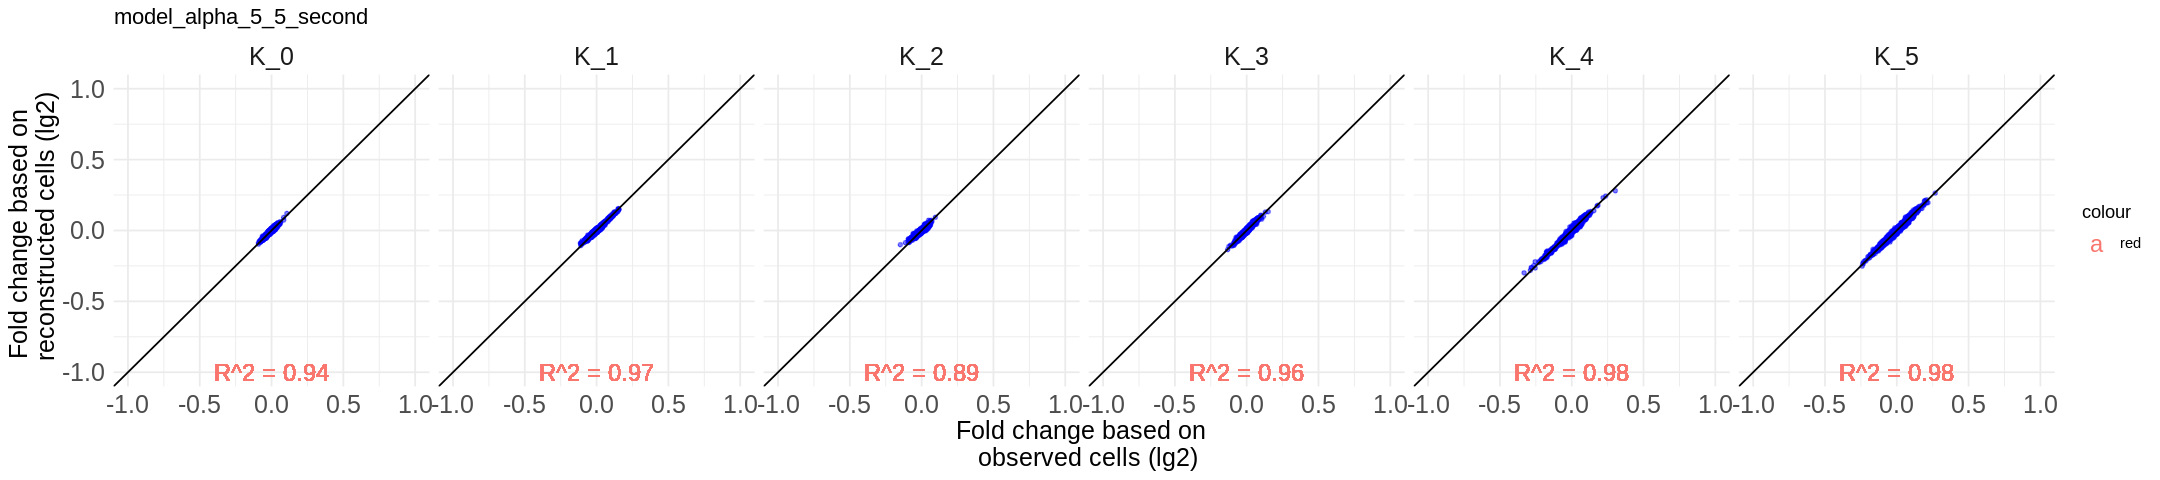

Using X as id variables



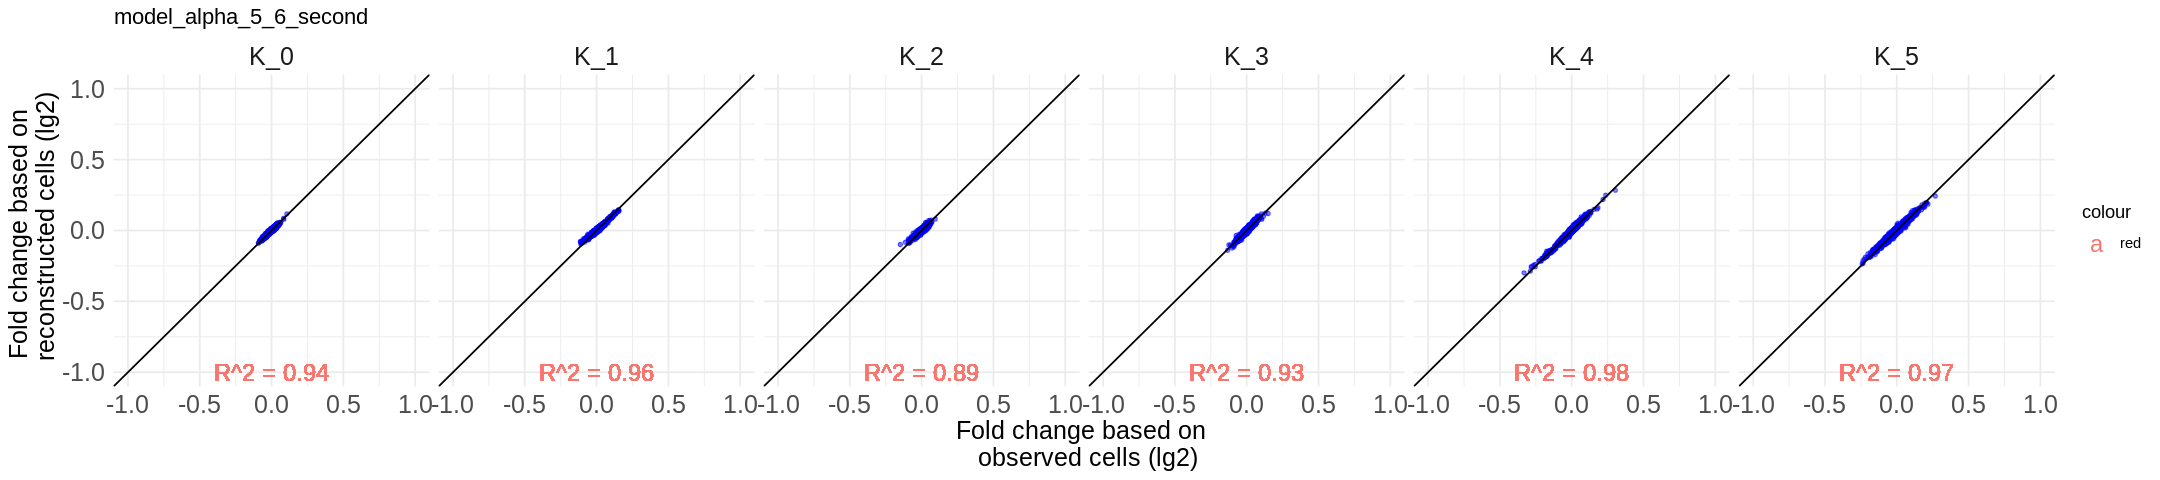

Using X as id variables



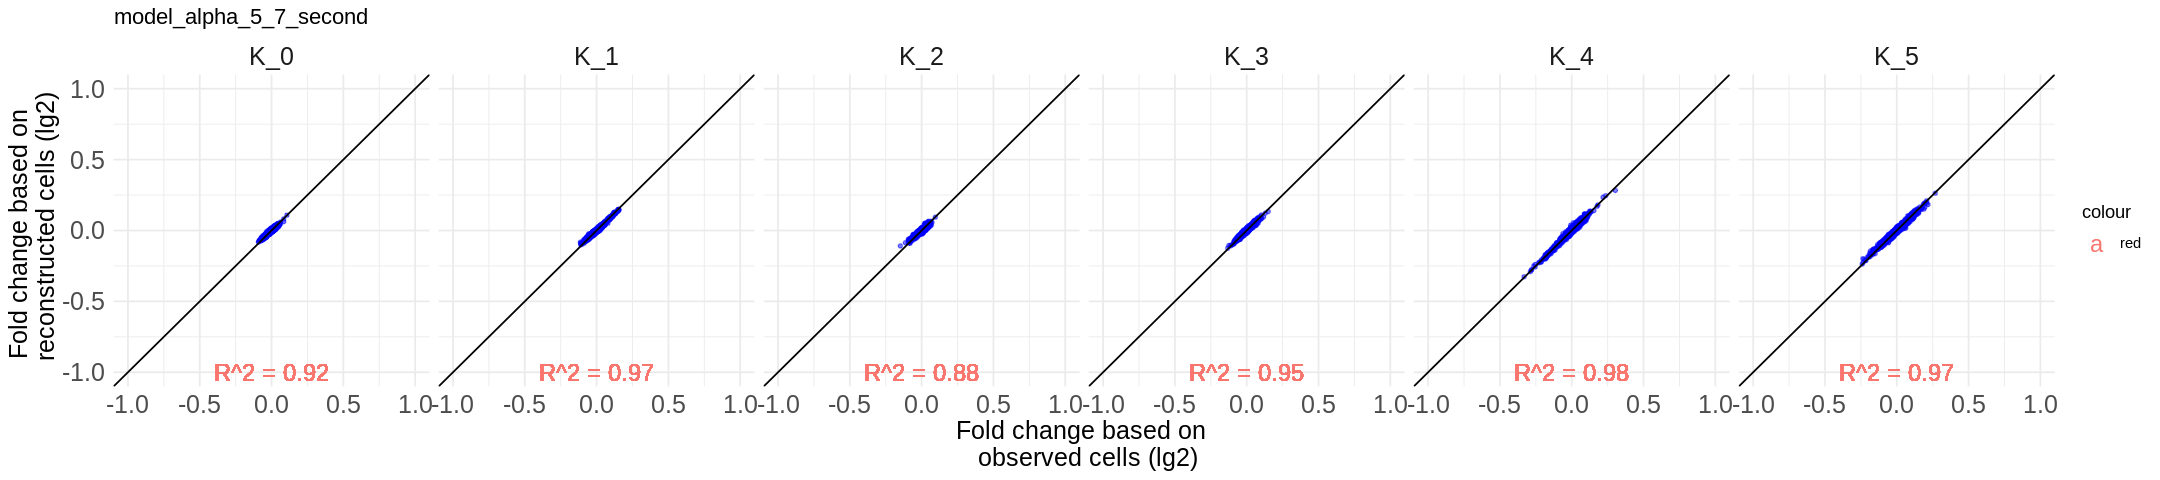

Using X as id variables



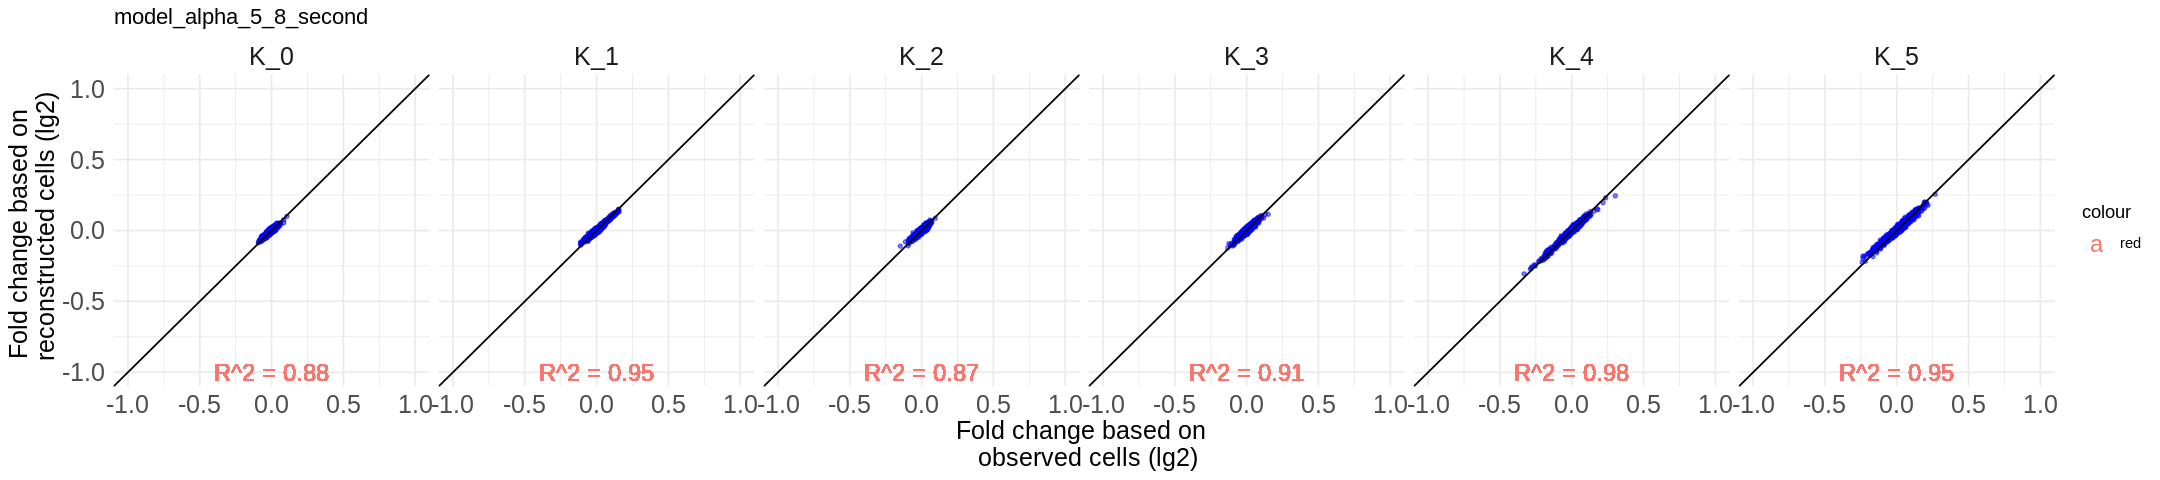

Using X as id variables



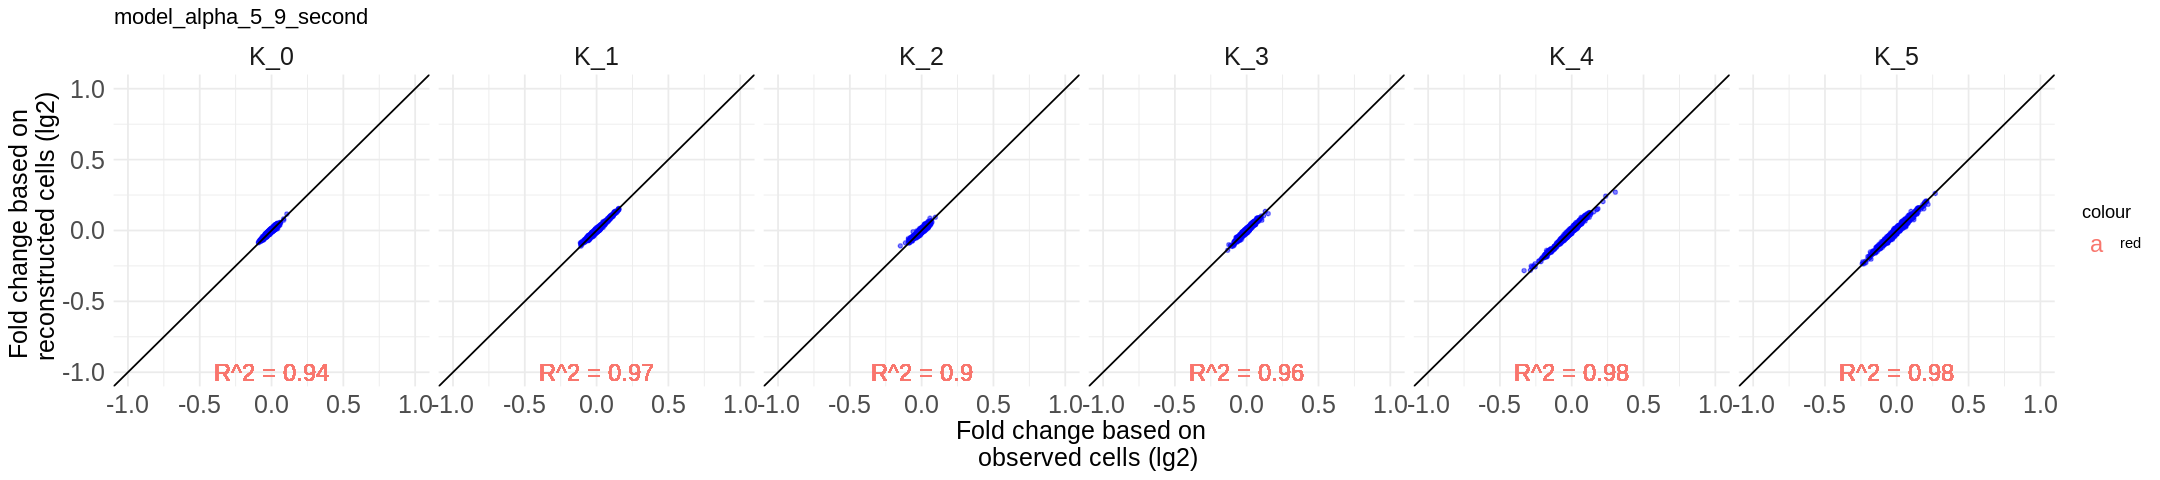

Using X as id variables



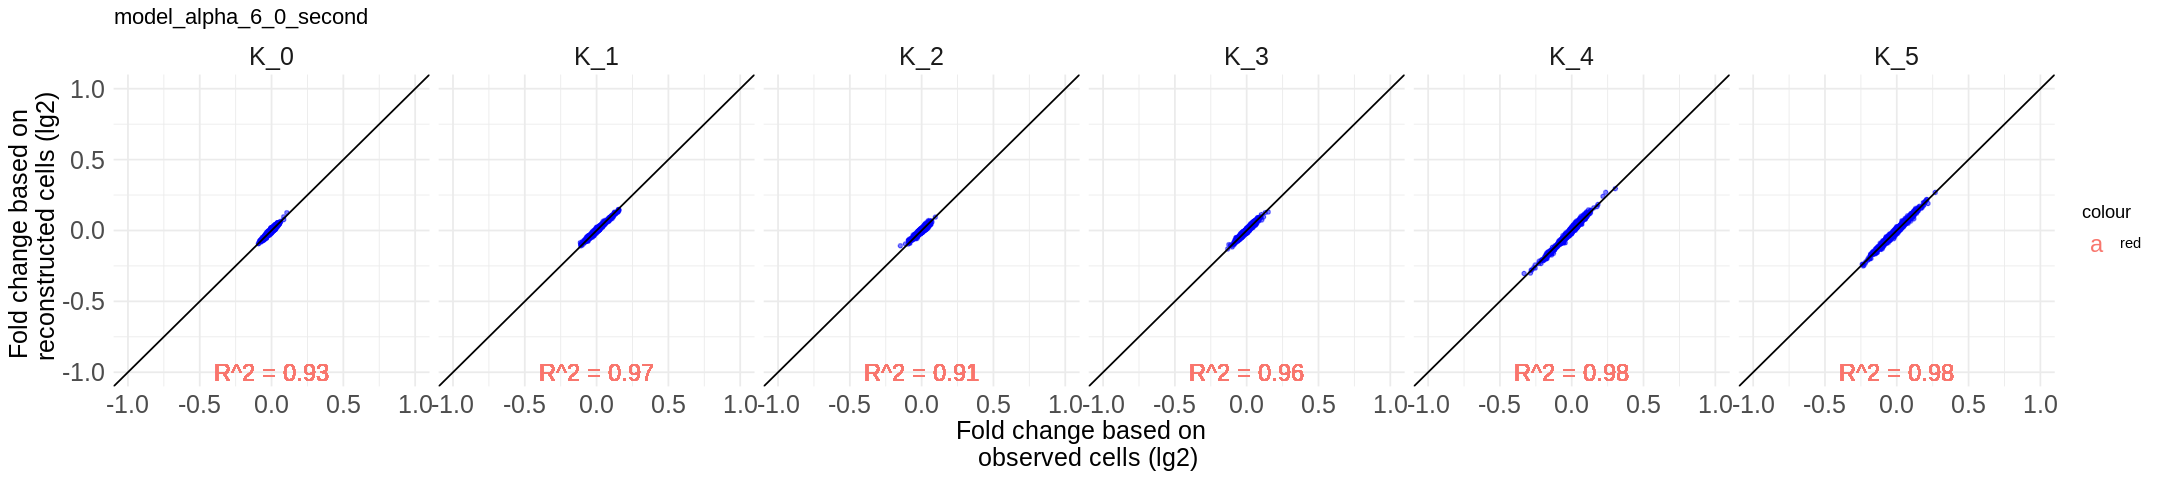

Using X as id variables



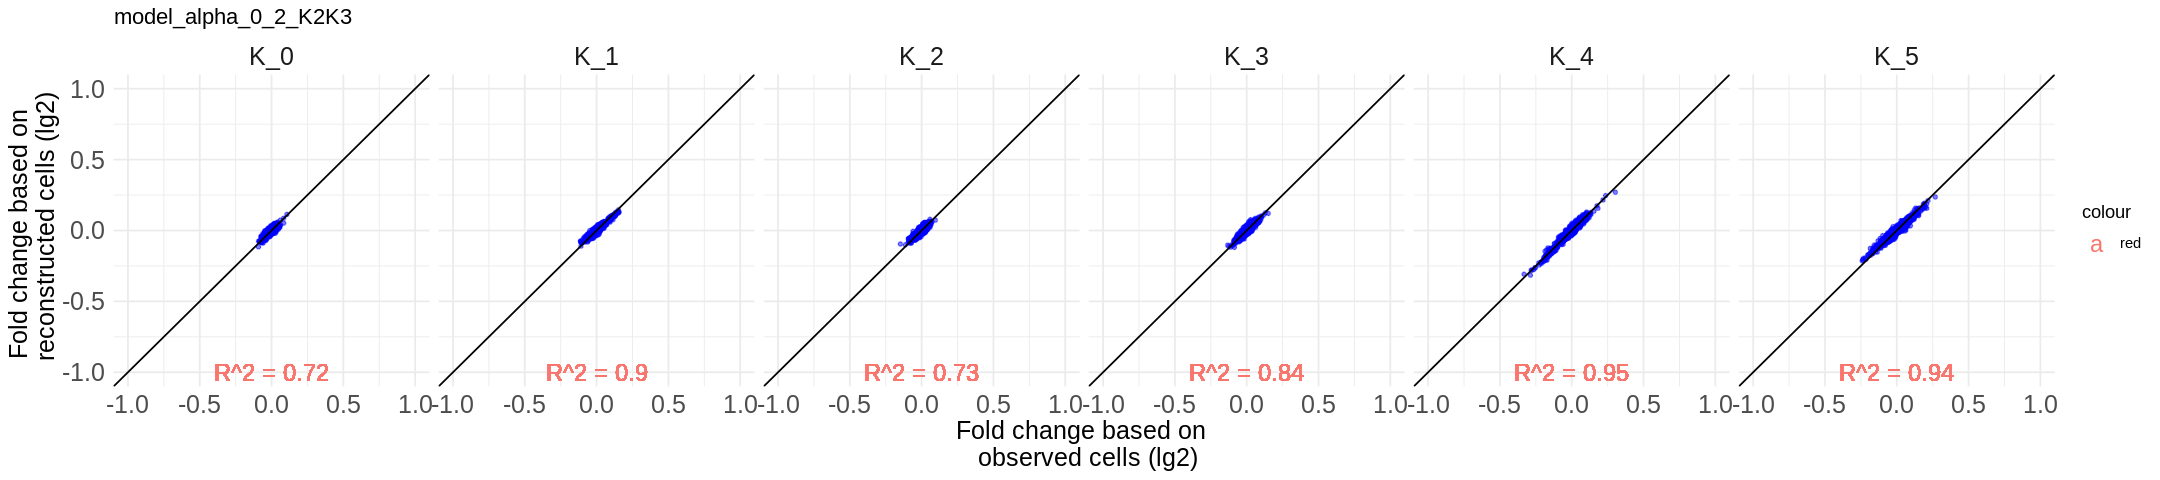

Using X as id variables



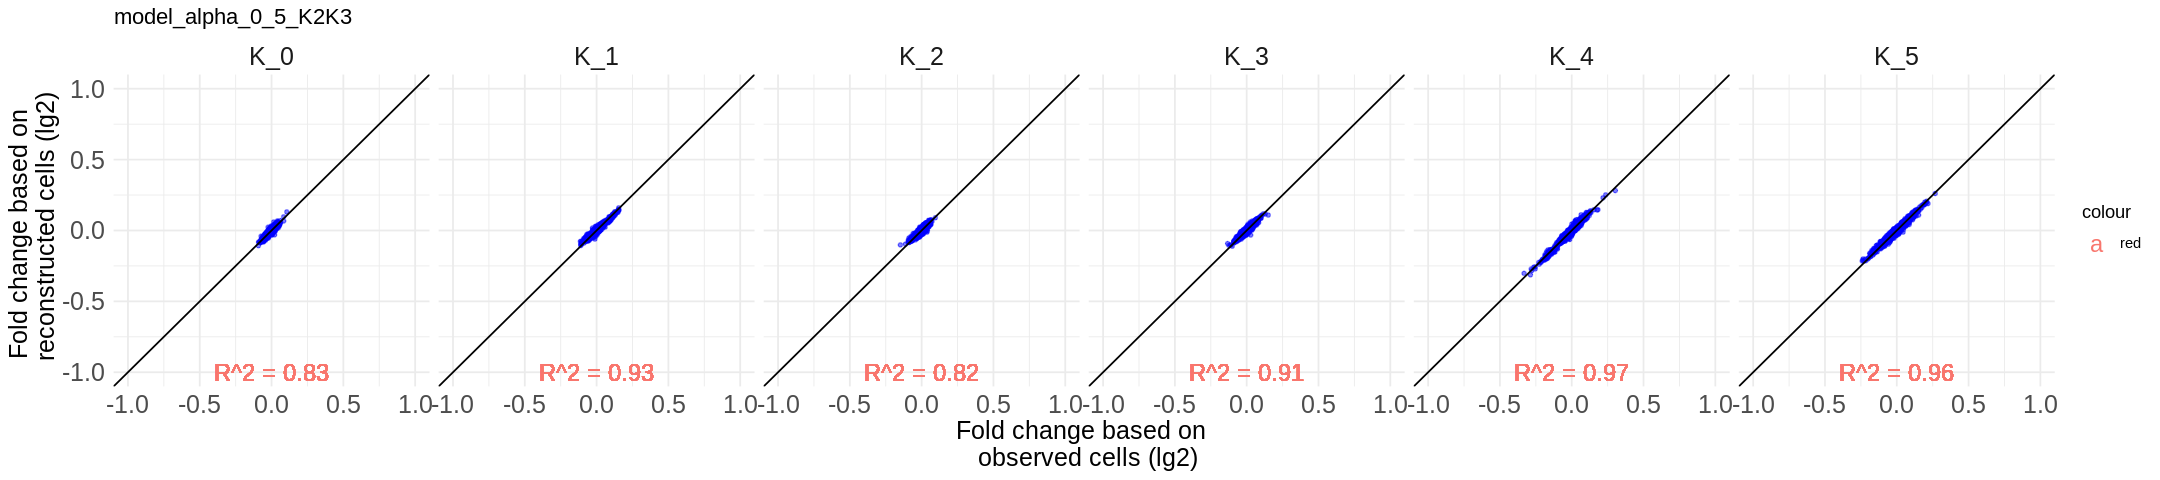

Using X as id variables



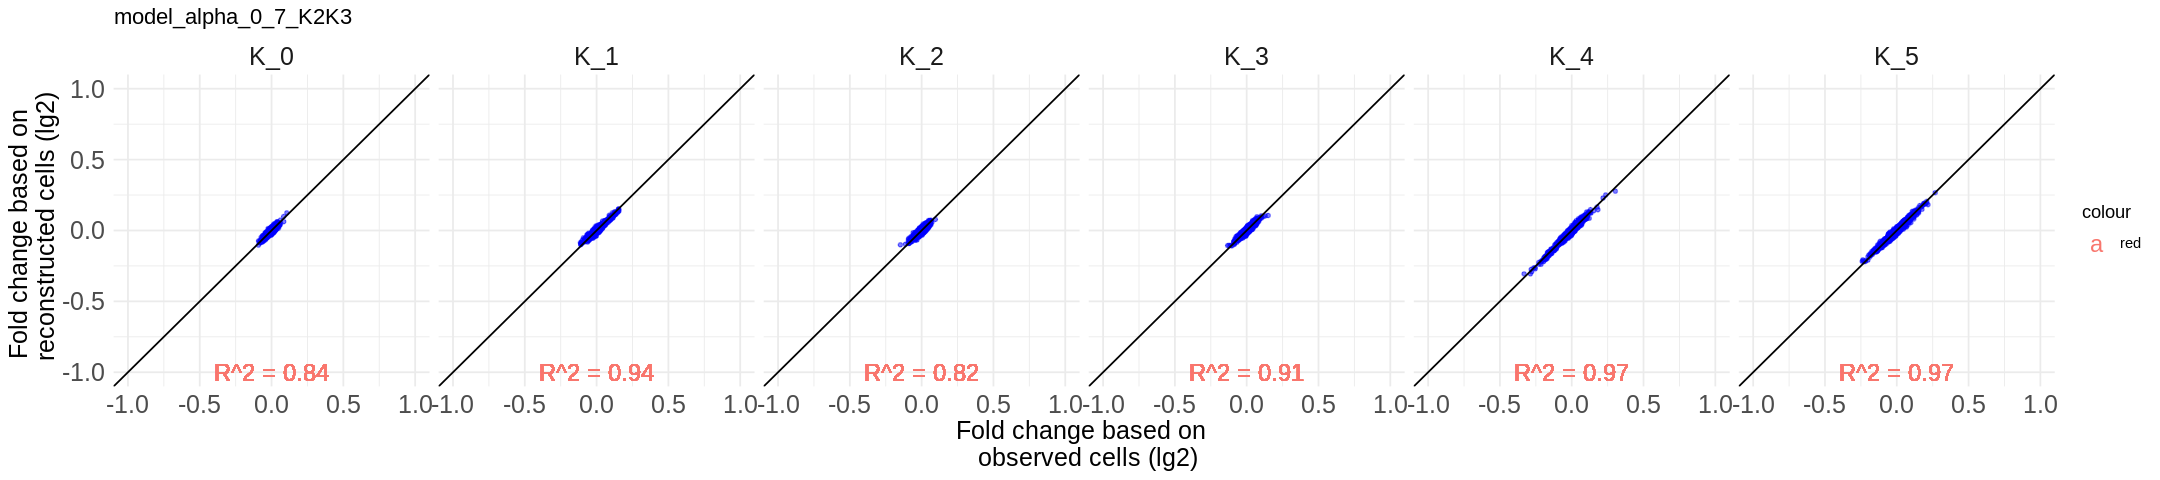

Using X as id variables



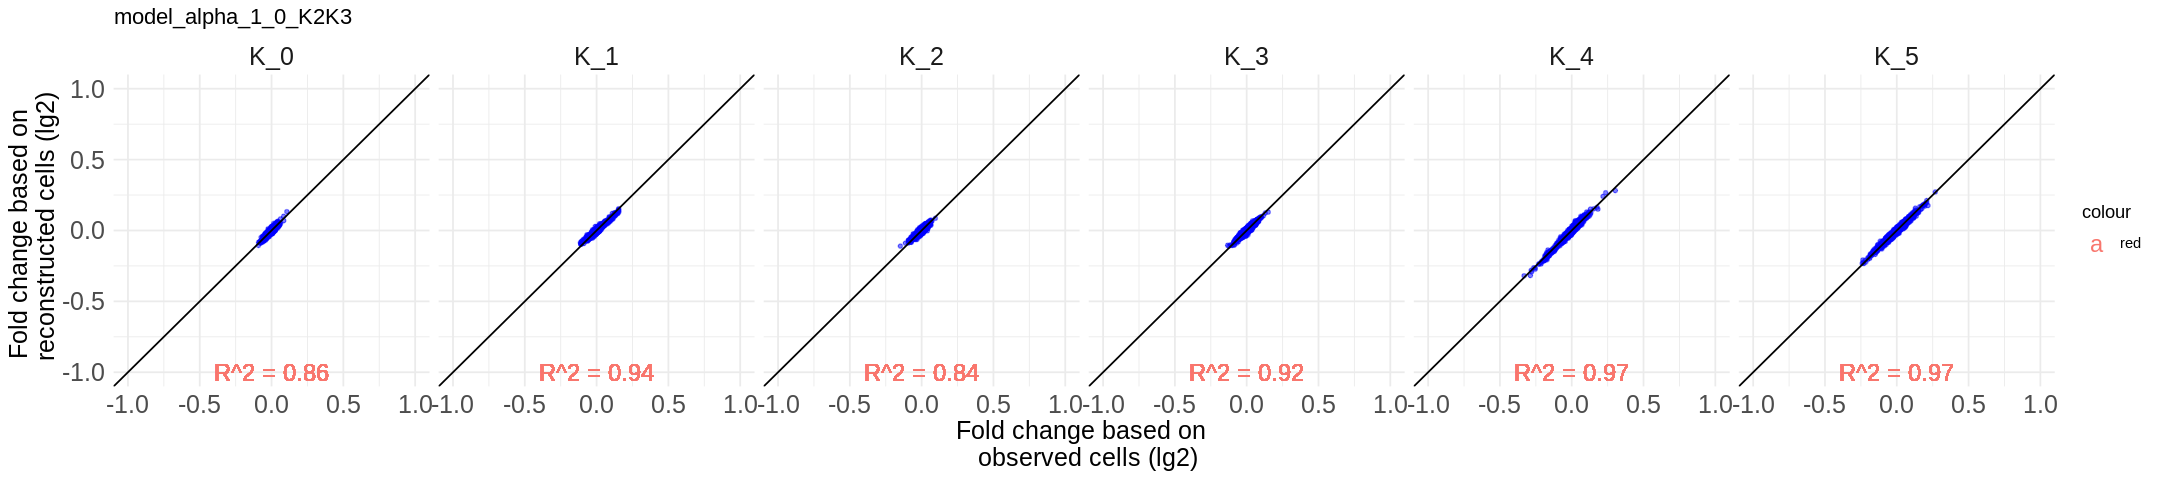

Using X as id variables



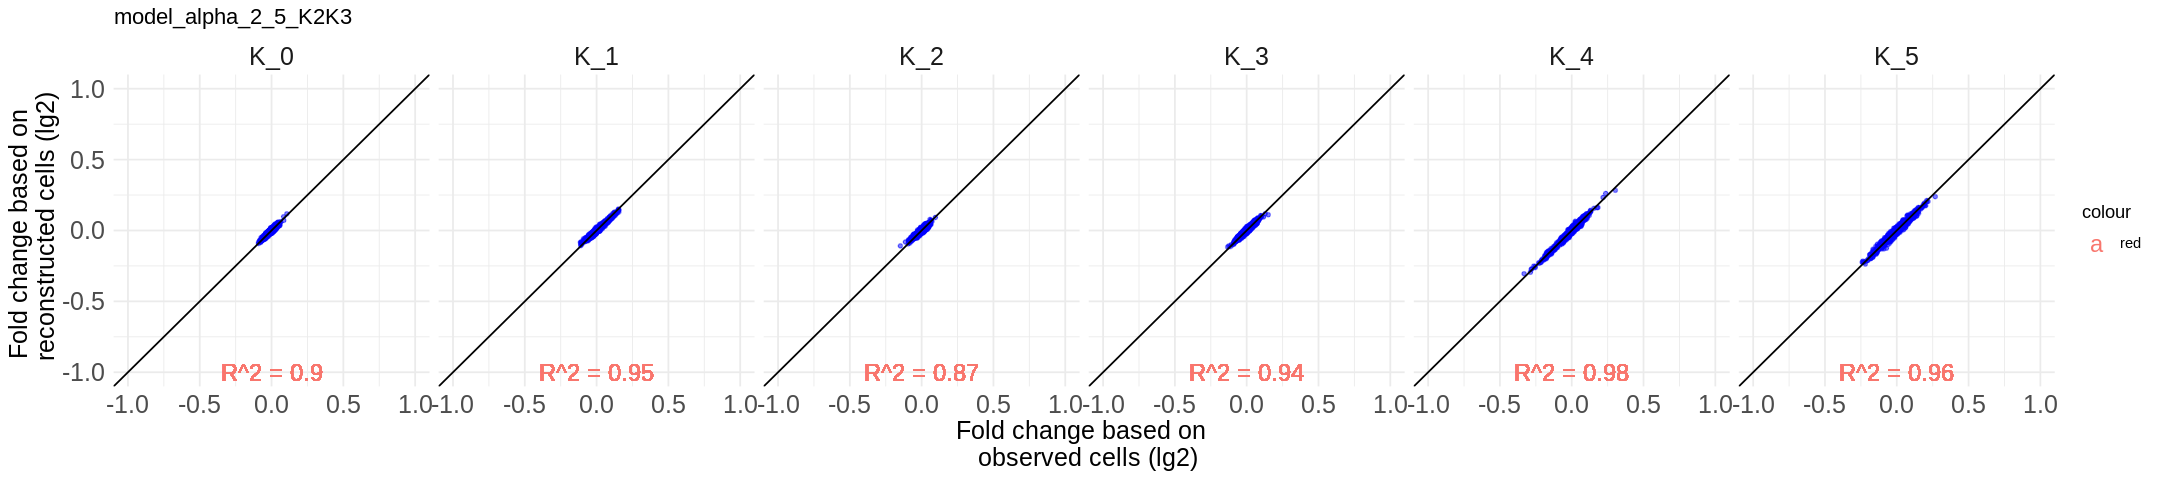

Using X as id variables



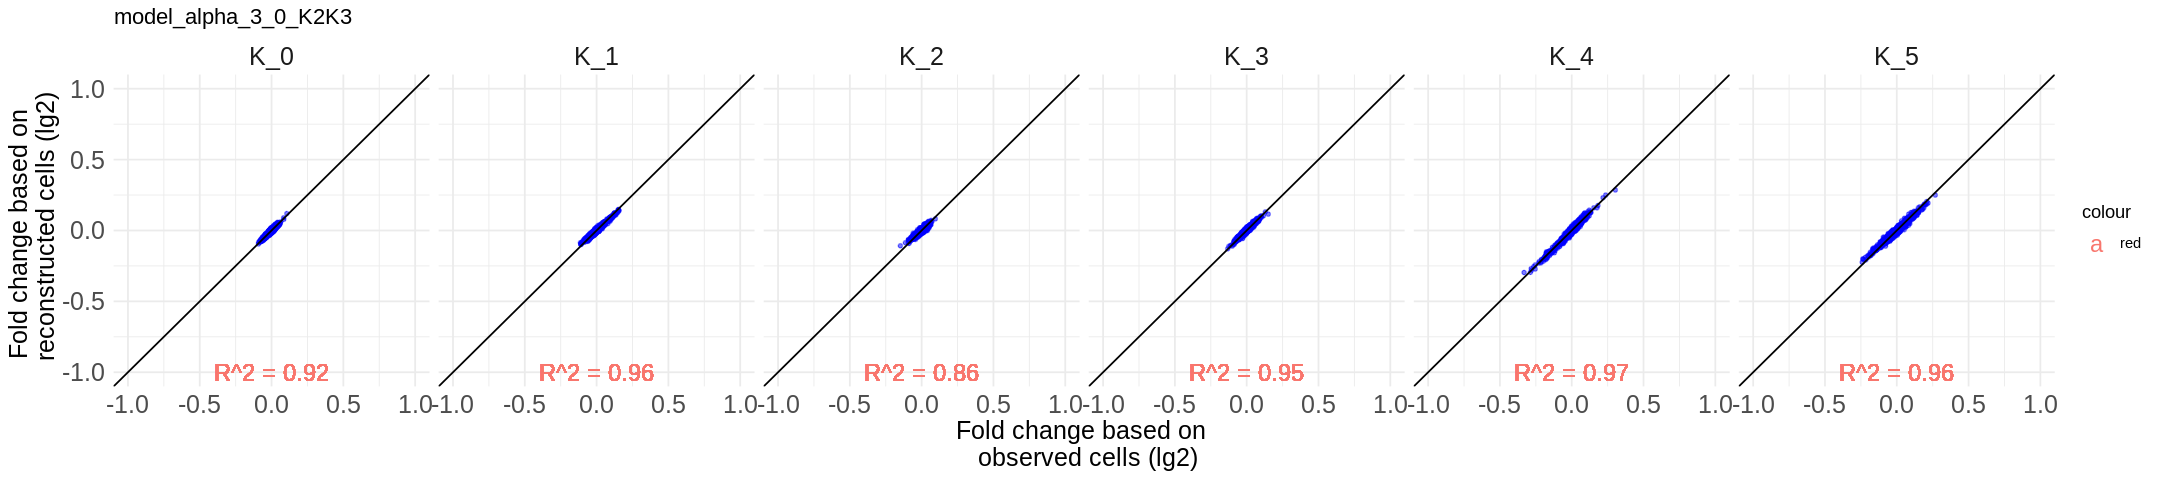

Using X as id variables



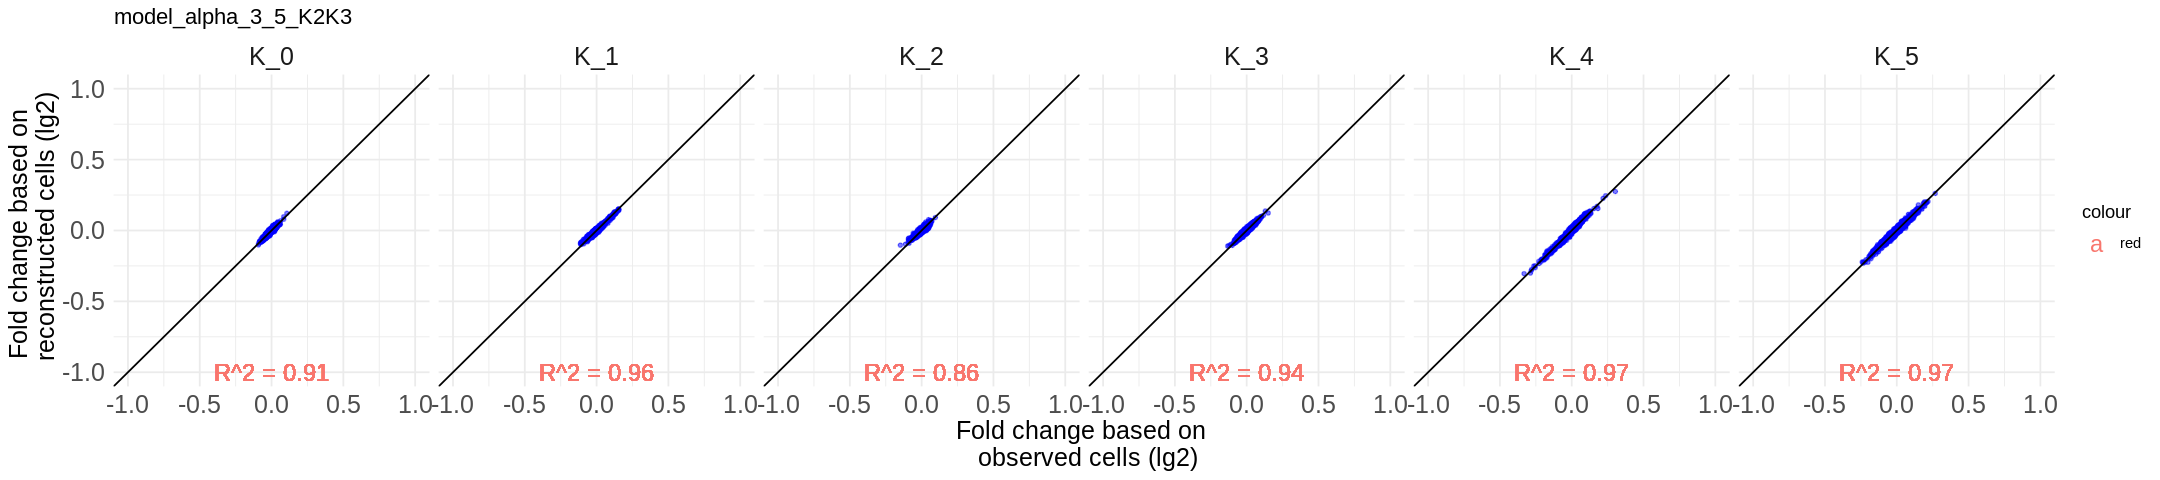

Using X as id variables



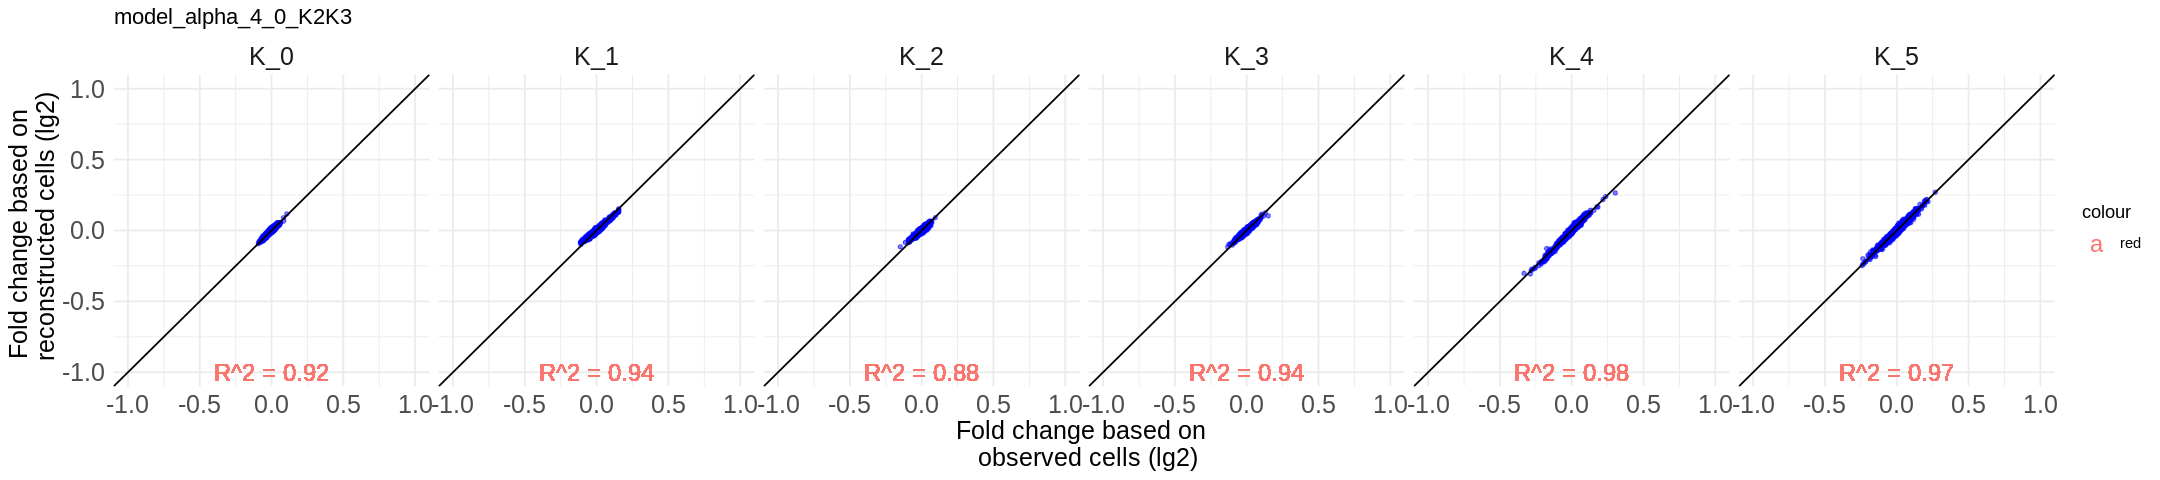

Using X as id variables



In [ ]:
options(repr.plot.width=18, repr.plot.height=4)

for(model in models){
    effectsSinglesRecons = read.csv(paste0(outDir, "/", model,"/ReconstFC_Coef.csv"))
    effectsSinglesRecons = effectsSinglesRecons[effectsSinglesRecons$X != "intercept",]
    effectsSinglesRecons = melt(effectsSinglesRecons)
    colnames(effectsSinglesRecons) = c("Group","respGene","ReconsEstimate")
    
    
    allDF = merge(effectsSingles, effectsSinglesRecons, by=c("Group", "respGene"))
    
    
    allDF = data.table(allDF)
    allDF[,R2 := computeR2(response = ObservedEstimate, prediction = ReconsEstimate),by=Group]
    
    
    print(ggplot(allDF, aes(x=ObservedEstimate, y=ReconsEstimate)) + 
        geom_point(alpha=0.5, shape=20, color="blue") + 
        facet_grid( ~ Group)+
        geom_text(aes(label= paste0("R^2 = ",R2), color="red"), x=0, y=-1, size=5)+
        geom_abline()+
        theme_minimal()+
        theme(axis.text = element_text(size = 15),
              axis.title = element_text(size = 15),
              strip.text = element_text(size = 15))+
        xlim(-1,1)+ylim(-1,1)+
        #ggtitle("Explained variance by additive effects")+
        xlab("Fold change based on \n observed cells (lg2)")+
        ylab("Fold change based on \n reconstructed cells (lg2)")+ggtitle(model))

}